In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn import inspection
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn import tree
from os import system

import scipy
from scipy import stats
from scipy.stats import randint as sp_randint
from scipy.stats import zscore

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import power_transform
# from sklearn.preprocessing import PowerTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline

import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
CCdata_raw = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
CCdata_raw.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [4]:
CCdata_raw.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [5]:
CCdata_raw.shape

(660, 7)

In [6]:
CCdata_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
CCdata_raw.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
CCdata_raw.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
CCdata = CCdata_raw.drop(['Sl_No', 'Customer Key'], axis=1)

In [10]:
CCdata.describe()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max              15.000000         10.000000

In [11]:
if CCdata.duplicated().any() == True:
    print("credit card has duplicates")
else:
    print("credit card data does not have duplicates")

credit card has duplicates


#### Check for negative values

In [12]:
CCdata.where(CCdata.any() < 0).dropna()

Empty DataFrame
Columns: [Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []

### Plotting the independent variables to find distribution and outliers

#### plots and tests for 'Avg_Credit_Limit' data

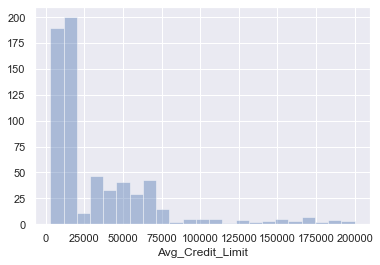

In [13]:
sns.distplot(CCdata['Avg_Credit_Limit'], kde=False);

In [14]:
CCdata['Avg_Credit_Limit'].where( CCdata['Avg_Credit_Limit'] <= 25000).count()

391

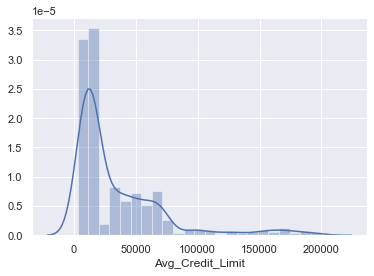

In [15]:
sns.distplot(CCdata['Avg_Credit_Limit'], kde=True);

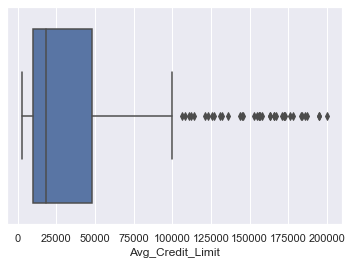

In [16]:
sns.boxplot(CCdata['Avg_Credit_Limit']);

In [17]:
scipy.stats.skew(CCdata['Avg_Credit_Limit'].to_numpy())

2.19738701547936

In [18]:
scipy.stats.skewtest(CCdata['Avg_Credit_Limit'].to_numpy())

SkewtestResult(statistic=14.971068898141695, pvalue=1.1348253781826298e-50)

In [19]:
scipy.stats.kurtosis(CCdata['Avg_Credit_Limit'].to_numpy())

5.085954841473843

#### Above tests shows that :
    1> There are many outliers for Avg_Credit_Limit data 
    2> There is skewness in data for Avg_Credit_Limit data , which is right tailed , and highly skewed 
    3> Majority of persons ( 391 out of 660) have credit limit <= 25,000.
    4> Kurtosis is also not zero , and the value indicates it is heavy tailed
    5> Skew and kurtosis results indicate that the distribution for Avg_Credit_Limit data is not normal

#### plots and tests for 'Total_Credit_Cards' data

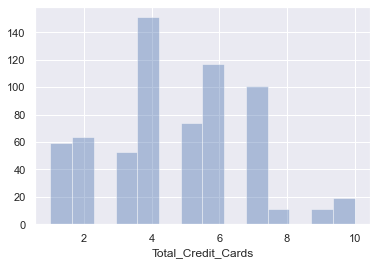

In [20]:
sns.distplot(CCdata['Total_Credit_Cards'], kde=False);

(array([ 59.,  64.,  53., 151.,  74., 117., 101.,  11.,  11.,  19.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

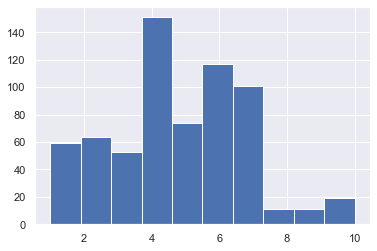

In [21]:
plt.hist( CCdata['Total_Credit_Cards'] )

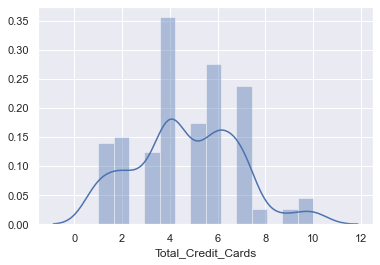

In [22]:
sns.distplot(CCdata['Total_Credit_Cards'], kde=True);

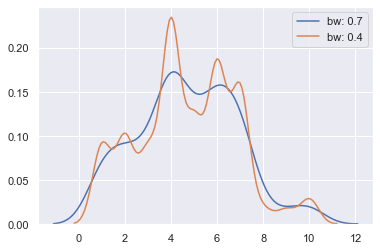

In [23]:
#sns.kdeplot( CCdata['Total_Credit_Cards'], bw= 0.3, label="bw: 0.3");
# sns.kdeplot( CCdata['Total_visits_bank'], bw= 2.0, label="bw: 2.0");
# sns.kdeplot( CCdata['Total_visits_bank'], bw= 1.0, label="bw: 1.0");
sns.kdeplot( CCdata['Total_Credit_Cards'], bw= 0.7, label="bw: 0.7");
sns.kdeplot( CCdata['Total_Credit_Cards'], bw= 0.4, label="bw: 0.4");

In [24]:
CCdata['Total_Credit_Cards'].value_counts()

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

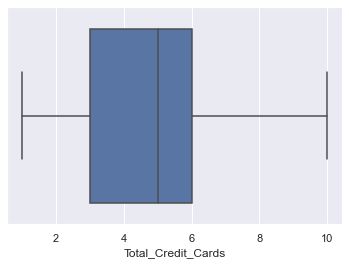

In [25]:
sns.boxplot(CCdata['Total_Credit_Cards']);

In [26]:
CCdata.groupby(CCdata['Total_Credit_Cards']).mean()

Avg_Credit_Limit  Total_visits_bank  Total_visits_online  \
Total_Credit_Cards                                                             
1                       11457.627119           0.932203             3.491525   
2                       13187.500000           0.921875             3.531250   
3                       13301.886792           0.867925             3.698113   
4                       26311.258278           2.768212             1.728477   
5                       34689.189189           3.256757             1.216216   
6                       33205.128205           3.555556             1.162393   
7                       44495.049505           3.207921             1.584158   
8                      139454.545455           0.636364             9.272727   
9                      140090.909091           0.727273            11.272727   
10                     136842.105263           0.631579            11.526316   

                    Total_calls_made  
Total_Credit_Cards                    
1                           7.220339  
2                           6.515625  
3                           6.641509  
4                           3.529801  
5                           2.135135  
6                           1.914530  
7                           2.099010  
8                           0.818182  
9                           1.272727  
10                          1.052632

In [27]:
scipy.stats.skew(CCdata['Total_Credit_Cards'].to_numpy())

0.14454951176972816

In [28]:
scipy.stats.skewtest(CCdata['Total_Credit_Cards'].to_numpy())

SkewtestResult(statistic=1.5251859052235097, pvalue=0.12721273513756282)

In [29]:
scipy.stats.kurtosis(CCdata['Total_Credit_Cards'].to_numpy())

-0.37605210297285474

#### Above tests shows that :
    1> There are no outliers for 'Total_Credit_Cards' data 
    2> After plotting with different bandwidth for KDE (0.4), we find possibly six clusters , at 1, 2, 4, 6, 7 and at 10.
    3> There is minor skewness in data for 'Total_Credit_Cards' , which is right tailed 
    4> Kurtosis is also not zero , and the value indicates that 'Total_Credit_Cards' data has less tail as compared to a 
        normal distribution
    5> Skew and kurtosis results indicate that the distribution for Total_Credit_Cards data is not normal
    6> The groupby test shows that :
        a) Total_visits_bank is lower for Total_Credit_cards at low end (1 to 3 cards) and high (8 to 10 cards) end
        b) As Total_Credit_Cards increases , Avg_Credit_Limit increases , indicating positive corelation
        c) Total_visits_online is higher for Total_Credit_cards at low end (1 to 3 cards) and high (8 to 10 cards) end
        d) Total_calls_made are generally higher for lower number of Total_Credit_cards

#### plots and tests for 'Total_visits_bank' data

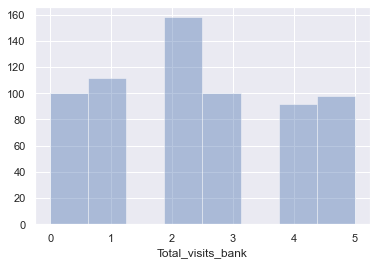

In [30]:
sns.distplot(CCdata['Total_visits_bank'], kde=False);

(array([100., 112., 158., 100.,  92.,  98.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

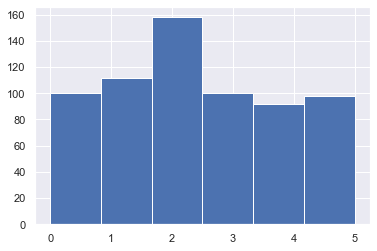

In [31]:
plt.hist( CCdata['Total_visits_bank'] ,bins=6)

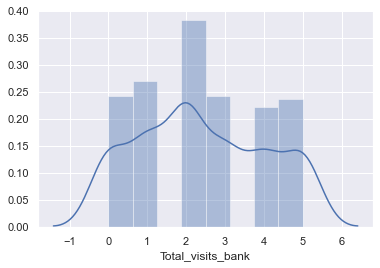

In [32]:
sns.distplot(CCdata['Total_visits_bank'], kde=True);

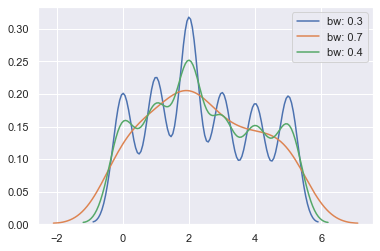

In [33]:
sns.kdeplot( CCdata['Total_visits_bank'], bw= 0.3, label="bw: 0.3");
# sns.kdeplot( CCdata['Total_visits_bank'], bw= 2.0, label="bw: 2.0");
# sns.kdeplot( CCdata['Total_visits_bank'], bw= 1.0, label="bw: 1.0");
sns.kdeplot( CCdata['Total_visits_bank'], bw= 0.7, label="bw: 0.7");
sns.kdeplot( CCdata['Total_visits_bank'], bw= 0.4, label="bw: 0.4");

In [34]:
CCdata['Total_visits_bank'].value_counts()

2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

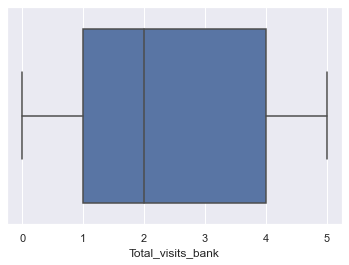

In [35]:
sns.boxplot(CCdata['Total_visits_bank']);

In [36]:
CCdata.groupby(CCdata['Total_visits_bank']).mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_online  \
Total_visits_bank                                                              
0                      39150.000000            3.540000             5.030000   
1                      47544.642857            4.303571             5.562500   
2                      26050.632911            4.246835             1.892405   
3                      35300.000000            5.580000             1.030000   
4                      33000.000000            5.467391             1.076087   
5                      29561.224490            5.489796             0.948980   

                   Total_calls_made  
Total_visits_bank                    
0                          5.820000  
1                          5.178571  
2                          4.006329  
3                          2.020000  
4                          1.826087  
5                          2.040816

In [37]:
scipy.stats.skew(CCdata['Total_visits_bank'].to_numpy())

0.14157332007264326

In [38]:
scipy.stats.skewtest(CCdata['Total_visits_bank'].to_numpy())

SkewtestResult(statistic=1.4940841744488011, pvalue=0.13515361978852009)

In [39]:
scipy.stats.kurtosis(CCdata['Total_visits_bank'].to_numpy())

-1.1050033003736643

#### Above tests shows that :
    1> There are no outliers for 'Total_visits_bank' data 
    2> After plotting with different bandwidth for KDE (0.4), we find possibly five clusters , at 0, 1, 2, 4 and at 5.
    3> There is minor skewness in data for 'Total_visits_bank' , which is right tailed 
    4> Kurtosis is negative , and the value indicates that 'Total_visits_bank' data has less tail as compared to a 
        normal distribution
    5> Skew and kurtosis results indicate that the distribution for Total_visits_bank data is not normal

#### plots and tests for 'Total_visits_online' data

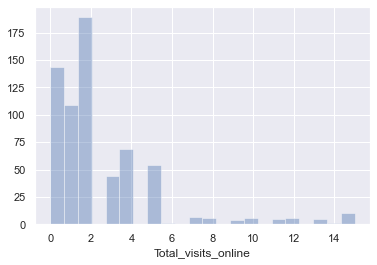

In [40]:
sns.distplot(CCdata['Total_visits_online'], kde=False);

(array([144., 109., 189.,  44.,  69.,  54.,   1.,   7.,   6.,   4.,   6.,
          5.,   6.,   5.,  11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <a list of 15 Patch objects>)

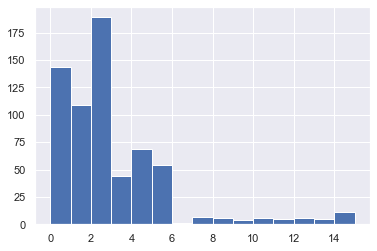

In [41]:
plt.hist( CCdata['Total_visits_online'], bins=15 )

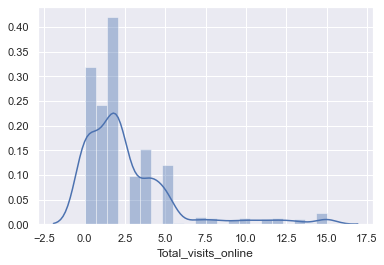

In [42]:
sns.distplot(CCdata['Total_visits_online'], kde=True);

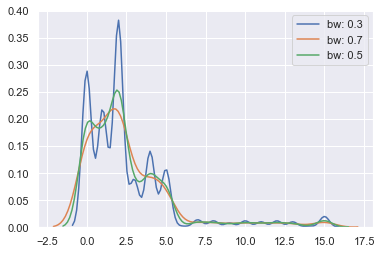

In [43]:
sns.kdeplot( CCdata['Total_visits_online'], bw= 0.3, label="bw: 0.3");
# sns.kdeplot( CCdata['Total_visits_online'], bw= 2.0, label="bw: 2.0");
# sns.kdeplot( CCdata['Total_visits_online'], bw= 1.0, label="bw: 1.0");
sns.kdeplot( CCdata['Total_visits_online'], bw= 0.7, label="bw: 0.7");
sns.kdeplot( CCdata['Total_visits_online'], bw= 0.5, label="bw: 0.5");

In [44]:
CCdata['Total_visits_online'].value_counts()

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

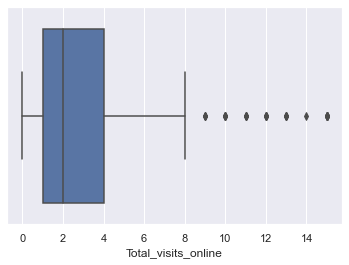

In [45]:
sns.boxplot(CCdata['Total_visits_online']);

In [46]:
CCdata.groupby(CCdata['Total_visits_online']).mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Total_visits_online                                                            
0                        35131.944444            5.534722           3.506944   
1                        34091.743119            5.422018           3.229358   
2                        25523.809524            4.582011           2.867725   
3                        13272.727273            2.590909           0.977273   
4                        12739.130435            2.536232           0.898551   
5                        12129.629630            2.277778           0.962963   
6                        91000.000000            8.000000           1.000000   
7                       149857.142857            8.428571           0.714286   
8                       130666.666667            8.666667           0.500000   
9                       149250.000000            9.250000           0.750000   
10                      123833.333333            8.000000           0.666667   
11                      128200.000000            8.000000           0.600000   
12                      151000.000000            8.833333           0.500000   
13                      139800.000000            8.400000           0.200000   
14                      157000.000000            9.000000           1.000000   
15                      143500.000000            9.200000           0.600000   

                     Total_calls_made  
Total_visits_online                    
0                            2.069444  
1                            2.009174  
2                            3.296296  
3                            6.931818  
4                            6.913043  
5                            7.037037  
6                            1.000000  
7                            0.857143  
8                            0.833333  
9                            1.500000  
10                           2.500000  
11                           0.800000  
12                           2.000000  
13                           0.800000  
14                           1.000000  
15                           0.900000

In [47]:
scipy.stats.skew(CCdata['Total_visits_online'].to_numpy())

2.2205453200984695

In [48]:
scipy.stats.skewtest(CCdata['Total_visits_online'].to_numpy())

SkewtestResult(statistic=15.057478835673821, pvalue=3.0832251491917695e-51)

In [49]:
scipy.stats.kurtosis(CCdata['Total_visits_online'].to_numpy())

5.6871049475330135

#### Above tests shows that :
    1> There are multiple outliers for 'Total_visits_online' data 
    2> After plotting with different bandwidth for KDE (0.5), we find possibly three clusters , at 0, 2 and at 4.
    3> There is skewness in data for 'Total_visits_online' , which has heavy right tail, since higher than 1
    4> Kurtosis is also not zero, and the value indicates that 'Total_visits_online' data has heavy tail as compared to a 
        normal distribution , since it is positive and much higher than 1
    5> Skew and kurtosis results indicate that the distribution for Total_visits_online data is not normal

#### plots and tests for 'Total_calls_made' data

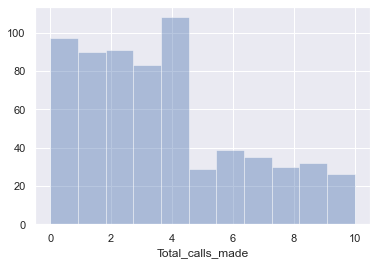

In [50]:
sns.distplot(CCdata['Total_calls_made'], kde=False);

(array([ 97.,  90.,  91.,  83., 108.,  29.,  39.,  35.,  30.,  32.,  26.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <a list of 11 Patch objects>)

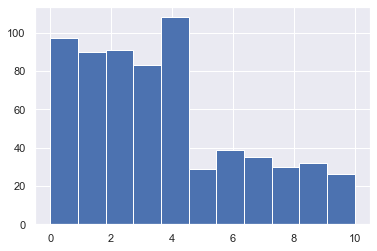

In [51]:
plt.hist( CCdata['Total_calls_made'], bins=11 )

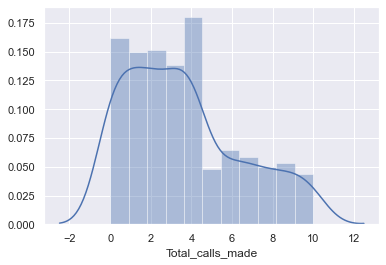

In [52]:
sns.distplot(CCdata['Total_calls_made'], kde=True);

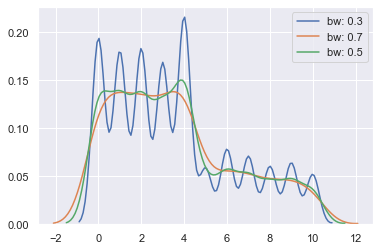

In [53]:
sns.kdeplot( CCdata['Total_calls_made'], bw= 0.3, label="bw: 0.3");
# sns.kdeplot( CCdata['Total_calls_made'], bw= 2.0, label="bw: 2.0");
# sns.kdeplot( CCdata['Total_calls_made'], bw= 1.0, label="bw: 1.0");
sns.kdeplot( CCdata['Total_calls_made'], bw= 0.7, label="bw: 0.7");
sns.kdeplot( CCdata['Total_calls_made'], bw= 0.5, label="bw: 0.5");

In [54]:
CCdata['Total_calls_made'].value_counts()

4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64

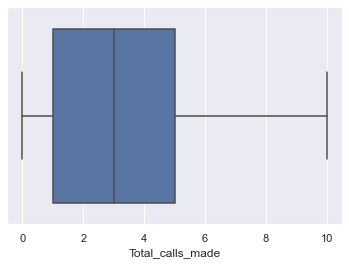

In [55]:
sns.boxplot(CCdata['Total_calls_made']);

In [56]:
CCdata.groupby(CCdata['Total_calls_made']).mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Total_calls_made                                                            
0                     54536.082474            5.979381           2.989691   
1                     46877.777778            5.966667           3.122222   
2                     55868.131868            6.087912           2.791209   
3                     35120.481928            5.614458           3.506024   
4                     27787.037037            4.712963           2.685185   
5                     11482.758621            2.413793           0.965517   
6                     11897.435897            2.564103           1.128205   
7                     11571.428571            2.342857           0.914286   
8                     12300.000000            2.366667           0.966667   
9                     13500.000000            2.406250           0.875000   
10                    11807.692308            2.307692           0.730769   

                  Total_visits_online  
Total_calls_made                       
0                            2.587629  
1                            2.611111  
2                            3.010989  
3                            1.277108  
4                            1.546296  
5                            3.517241  
6                            3.564103  
7                            3.314286  
8                            3.700000  
9                            4.187500  
10                           3.269231

In [57]:
scipy.stats.skew(CCdata['Total_calls_made'].to_numpy())

0.6574068439642561

In [58]:
scipy.stats.skewtest(CCdata['Total_calls_made'].to_numpy())

SkewtestResult(statistic=6.39424271064355, pvalue=1.6134497375935814e-10)

In [59]:
scipy.stats.kurtosis(CCdata['Total_calls_made'].to_numpy())

-0.5234236654390325

#### Above tests shows that :
    1> There are no outliers for 'Total_calls_made' data 
    2> After plotting with different bandwidth for KDE (0.5), we find possibly two clusters , at 2 and at 4.
    3> There is skewness in data for 'Total_calls_made' , which has a moderate right tail, since less than 1
    4> Kurtosis is negative, and the value indicates that 'Total_calls_made' data has less tail as compared to a 
        normal distribution
    5> Skew and kurtosis results indicate that the distribution for Total_calls_made data is not normal

### Bivariate analysis , to understand relationships between variables

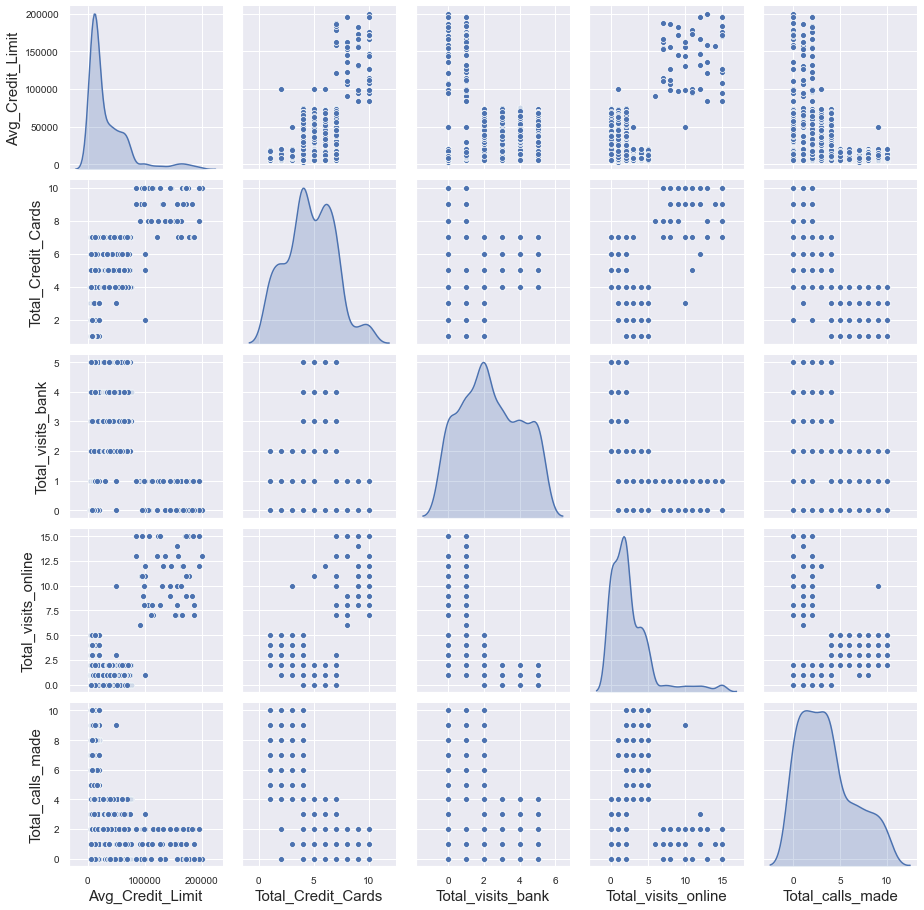

In [60]:
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
sns.pairplot(CCdata, diag_kind='kde');

#### The pair plots do not show high co-relations , though some correlations are seen, for example - positive correlation between Avg_Credit_Limit and Total_Credit_Cards , positive corelation between Total_visits_online and Total_Credit_Cards

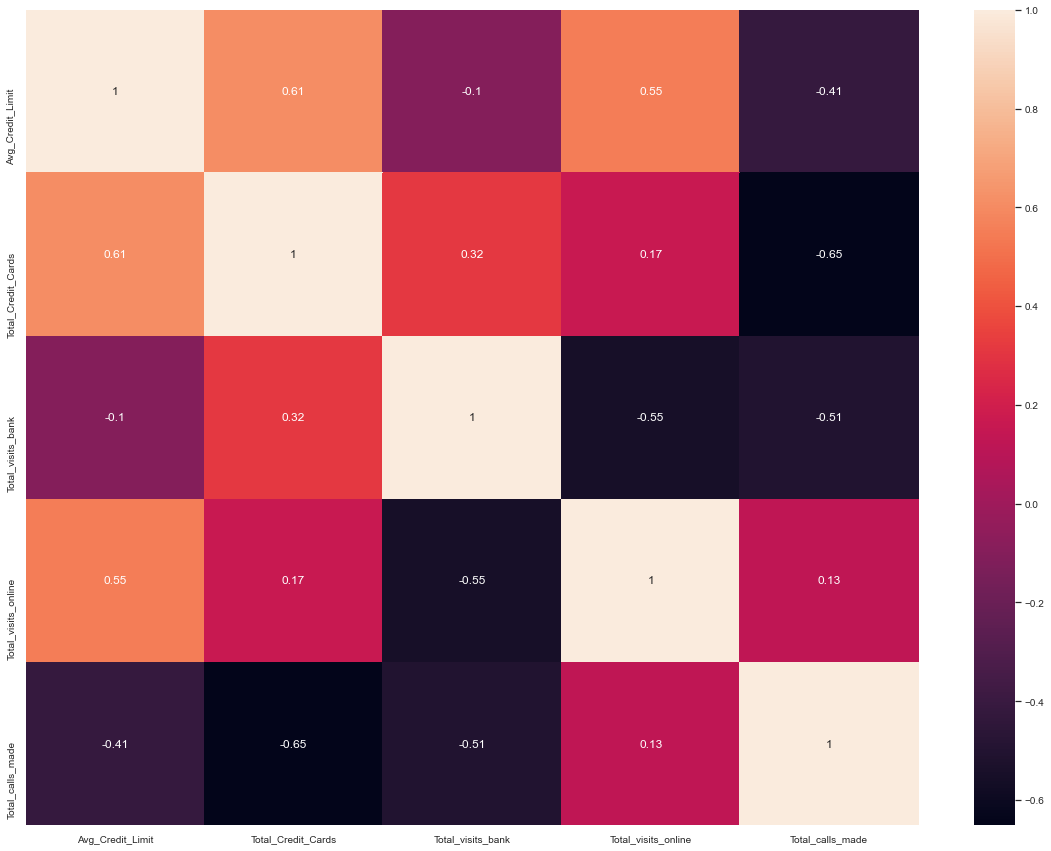

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(CCdata.corr(), annot=True);

#### The corelation plots show that :
    1> Positive Corelation of 0.61 between number of credit cards and Average credit limit 
    2> Moderate Positive Corelation of 0.55 between Total visits online and Average credit limit
    3> Negative Corelation of 0.65 between Total credit cards and Total calls made
    4> Moderate Negative Corelation of 0.55 between Total visits online and Total visits bank
    5> Moderate Negative Corelation of 0.51 between Total calls made and Total visits bank
    6> Minor Negative Corelation of 0.41 between Total calls made and Average credit limit
    7> Minor Positive correlation of 0.32 between Total credit cards and Total visits bank

#### Handling outliers for 'Avg_Credit_Limit' & 'Total_visits_online', using  transform. Compare sqrt vs log options.
    a) sqrt transform can be used , however all outliers are not eliminated.
    b) Use log transform , after adding 1 to 'Total_visits_online' since we have 0 in data . 


#### Try with srqt transform

In [62]:
CCdata1 = CCdata.copy()
CCdata1['Avg_Credit_Limit'] = np.sqrt( CCdata1['Avg_Credit_Limit'] )
CCdata1['Total_visits_online'] = np.sqrt( CCdata1['Total_visits_online'] )
CCdata1.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0        316.227766                   2                  1   
1        223.606798                   3                  0   
2        223.606798                   7                  1   
3        173.205081                   5                  1   
4        316.227766                   6                  0   

   Total_visits_online  Total_calls_made  
0             1.000000                 0  
1             3.162278                 9  
2             1.732051                 4  
3             1.000000                 4  
4             3.464102                 3

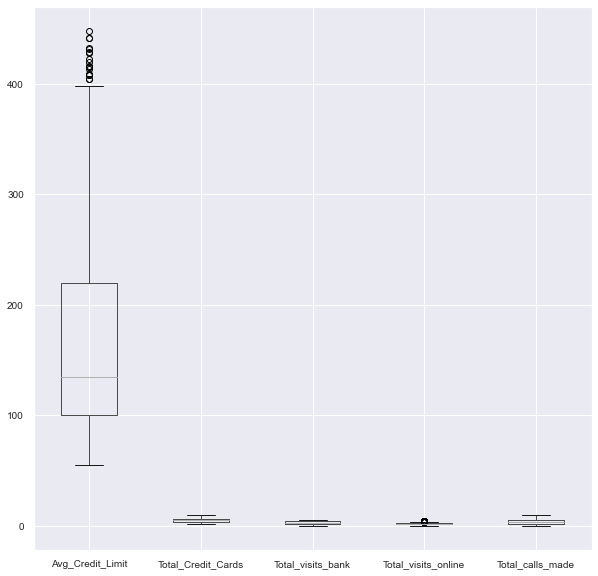

In [63]:
plt.figure(figsize=(10,10))
CCdata1.boxplot()

In [64]:
CCdata1.describe()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean         165.843756            4.706061           2.403030   
std           84.147606            2.167835           1.631813   
min           54.772256            1.000000           0.000000   
25%          100.000000            3.000000           1.000000   
50%          134.164079            5.000000           2.000000   
75%          219.089023            6.000000           4.000000   
max          447.213595           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              1.330341          3.583333  
std               0.915162          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               1.414214          3.000000  
75%               2.000000          5.000000  
max               3.872983         10.000000

In [65]:
CCdata1['Total_visits_online'].where(CCdata1['Total_visits_online'] == 0).count()

144

#### Use log transform

In [66]:
CCdata['Avg_Credit_Limit'] = np.log( CCdata['Avg_Credit_Limit'] )
CCdata['Total_visits_online'] = np.log( CCdata['Total_visits_online'] + 1 )

In [67]:
CCdata.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         11.512925                   2                  1   
1         10.819778                   3                  0   
2         10.819778                   7                  1   
3         10.308953                   5                  1   
4         11.512925                   6                  0   

   Total_visits_online  Total_calls_made  
0             0.693147                 0  
1             2.397895                 9  
2             1.386294                 4  
3             0.693147                 4  
4             2.564949                 3

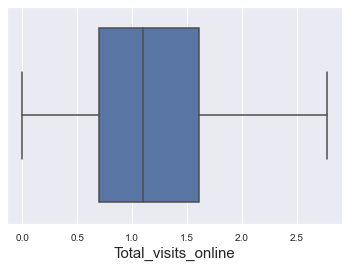

In [68]:
sns.boxplot(CCdata['Total_visits_online']);

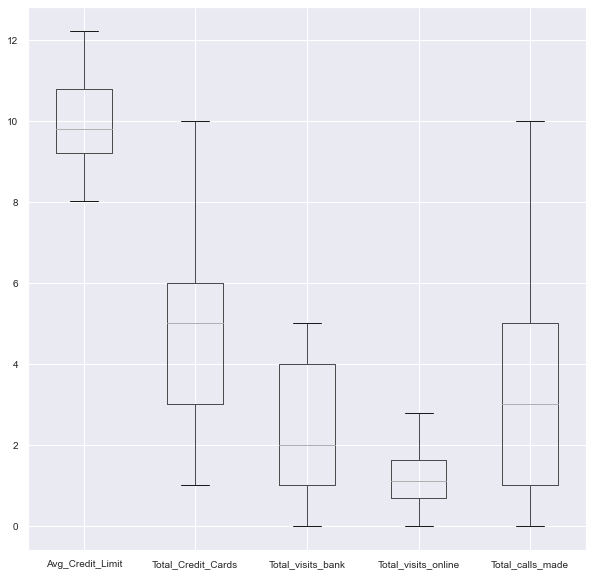

In [69]:
plt.figure(figsize=(10,10))
CCdata.boxplot()

In [70]:
CCdata.describe()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean           9.996115            4.706061           2.403030   
std            0.930992            2.167835           1.631813   
min            8.006368            1.000000           0.000000   
25%            9.210340            3.000000           1.000000   
50%            9.798127            5.000000           2.000000   
75%           10.778956            6.000000           4.000000   
max           12.206073           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              1.025334          3.583333  
std               0.709116          2.865317  
min               0.000000          0.000000  
25%               0.693147          1.000000  
50%               1.098612          3.000000  
75%               1.609438          5.000000  
max               2.772589         10.000000

#### Using log transform , the outliers have been removed

### It can be noted that all variables are now in similar range , with min = 0 and max = 12.206 , for all variables. Hence no need to do scaling 

## 3.0 K Means Cluestering section

### Create clusters using the data 

In [71]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(CCdata)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

num_clusters  cluster_errors
0              1    11164.746771
1              2     4733.237814
2              3     3585.163693
3              4     2962.463749
4              5     2364.600866
5              6     2117.781416
6              7     1926.710200
7              8     1811.396378
8              9     1692.069608
9             10     1585.933900
10            11     1493.641310
11            12     1398.644449
12            13     1314.351191
13            14     1282.145398

#### Elbow plot

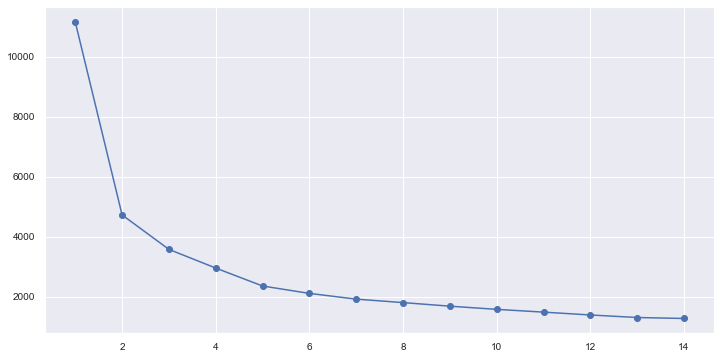

In [72]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Creating 5 clusters as after that , the reduction in cluster_erros is progressivly less

In [73]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', n_init= 10, max_iter = 500, random_state=3, n_jobs = -1)
kmeans.fit(CCdata)

C:\Users\cgunn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(max_iter=500, n_clusters=5, n_jobs=-1, random_state=3)

#### Check the number of data in each cluster

In [74]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[191 101  50 123 195]


In [75]:
labels

array([0, 3, 4, 4, 2, 3, 2, 0, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4,
       4, 0, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 4, 4,
       0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0,

#### It can be seen that groups have good distribution of data points. Any one group does not have a very low or very high number

#### Check the coordinates of centers in each cluster

In [76]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(CCdata) )
centroid_df.transpose()

0         1          2         3          4
Avg_Credit_Limit     10.127659  9.303714  11.825513  9.327481  10.178576
Total_Credit_Cards    5.230366  2.485149   8.740000  2.357724   5.789744
Total_visits_bank     3.513089  1.019802   0.600000  0.878049   3.456410
Total_visits_online   0.592849  1.453638   2.446572  1.493566   0.567341
Total_calls_made      0.759162  5.039604   1.080000  8.398374   3.200000

In [77]:
centroid_df

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         10.127659            5.230366           3.513089   
1          9.303714            2.485149           1.019802   
2         11.825513            8.740000           0.600000   
3          9.327481            2.357724           0.878049   
4         10.178576            5.789744           3.456410   

   Total_visits_online  Total_calls_made  
0             0.592849          0.759162  
1             1.453638          5.039604  
2             2.446572          1.080000  
3             1.493566          8.398374  
4             0.567341          3.200000

In [78]:
centroid_df.reset_index(inplace=True)

In [79]:
centroid_df.rename(columns={'index':'Clusters'},inplace=True)
centroid_df

Clusters  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         0         10.127659            5.230366           3.513089   
1         1          9.303714            2.485149           1.019802   
2         2         11.825513            8.740000           0.600000   
3         3          9.327481            2.357724           0.878049   
4         4         10.178576            5.789744           3.456410   

   Total_visits_online  Total_calls_made  
0             0.592849          0.759162  
1             1.453638          5.039604  
2             2.446572          1.080000  
3             1.493566          8.398374  
4             0.567341          3.200000

#### Deriving a new column 'Interactions_Count_per_Card' , that checks per card , interactions that include 'Total_visits_bank' , plus 'Total_visits_online', plus 'Total_calls_made'. This is to help to figure out interactions with bank , on a per card basis, within each Cluster

In [80]:
centroid_df['Interactions_Count_per_Card'] = ( (centroid_df['Total_visits_bank'] + centroid_df['Total_visits_online'] + centroid_df['Total_calls_made']) / centroid_df['Total_Credit_Cards'])
centroid_df.transpose()

0         1          2         3  \
Clusters                      0.000000  1.000000   2.000000  3.000000   
Avg_Credit_Limit             10.127659  9.303714  11.825513  9.327481   
Total_Credit_Cards            5.230366  2.485149   8.740000  2.357724   
Total_visits_bank             3.513089  1.019802   0.600000  0.878049   
Total_visits_online           0.592849  1.453638   2.446572  1.493566   
Total_calls_made              0.759162  5.039604   1.080000  8.398374   
Interactions_Count_per_Card   0.930164  3.023177   0.472148  4.567961   

                                     4  
Clusters                      4.000000  
Avg_Credit_Limit             10.178576  
Total_Credit_Cards            5.789744  
Total_visits_bank             3.456410  
Total_visits_online           0.567341  
Total_calls_made              3.200000  
Interactions_Count_per_Card   1.247681

In [81]:
centroid_df['Clusters'] = centroid_df['Clusters'].astype('category')
centroid_df.transpose()

0        1         2         3         4
Clusters                            0        1         2         3         4
Avg_Credit_Limit              10.1277  9.30371   11.8255   9.32748   10.1786
Total_Credit_Cards            5.23037  2.48515      8.74   2.35772   5.78974
Total_visits_bank             3.51309   1.0198       0.6  0.878049   3.45641
Total_visits_online          0.592849  1.45364   2.44657   1.49357  0.567341
Total_calls_made             0.759162   5.0396      1.08   8.39837       3.2
Interactions_Count_per_Card  0.930164  3.02318  0.472148   4.56796   1.24768

### Observations  based on Clusters:
    a) Cluster 2 has the highest Avg_Credit_Limit , the highest Total_Credit_Cards, as well as the highest 
        'Total_visits_online' , coupled with lowest 'Total_visits_bank'
    b) Clusters 1 and 3 have similar 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online' , but differ more 
        for 'Total_calls_made' , as well as differ slighlty for 'Total_visits_bank'. The calls may be higher due to 
        queries not be addressed satisfactorily resulting in repeated calls , and the online experience may not be as 
        good.The 'Avg_Credit_Limit' for cluster 1 and 3 is also the lowest among 5 clusters. May be possible to increase 
        'Avg_Credit_Limit' by improving online and oncall experience.
    c) Clusters 1 and 3 have similar 'Avg_Credit_Limit' and 'Total_Credit_Cards', but show more 'Total_calls_made' , as 
        compared to other clusters
    d) Clusters 0 and 4 have similar  'Avg_Credit_Limit',  'Total_Credit_Cards',  'Total_visits_bank'  and 
        'Total_visits_online', but differ more for 'Total_calls_made'
    e) Cluster 3 has the highest 'Total_calls_made' and the second lowest 'Total_visits_bank'
    f) Cluster 0 has the lowest 'Total_calls_made' and the second lowest 'Total_visits_online' , with the highest 
        'Total_visits_bank'. Cluster 0 has the Third lowest 'Avg_Credit_Limit' , and third lowest. May indicate that this 
        cluster of customers are forced to come to bank since their queries are not adequatly addressed online or by 
        calls.Or these customers feel more comfortable in direct interactions with the bank employees. Possible reason is 
        that the online experience or call experience is not satisfactory.
    g) Using the 'Instructions_Count_per_Card' values, it is seen that Clusters 3 and 1 users have very high interactions 
        with Bank, though Avg_Credit_Limit and Total_Credit_Cards is the lowest . The number of interactions can also be 
        taken as oppurtunities for the bank to engage these users to upsell products. 
    h) Using the 'Instructions_Count_per_Card' values, it is seen that Clusters 2 and 0 users have very low interactions 
        with Bank, though Avg_Credit_Limit and Total_Credit_Cards is the highest . The low number of interactions can 
        also be taken as areas to improve their online , on call and in bank experience , so that bank gets more 
        oppurtunities for the bank to engage these users to upsell products.


### Data prep for Box plot of Clusters

In [82]:
CCdata

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [83]:
predictions = kmeans.predict(CCdata)
predictions

array([0, 3, 4, 4, 2, 3, 2, 0, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4,
       4, 0, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 4, 4,
       0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0,

In [84]:
CCdata["Cluster"] = predictions
CCdata['Cluster'] = CCdata['Cluster'].astype('category')
CCdata

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made Cluster  
0               0.693147                 0       0  
1               2.397895                 9       3  
2               1.386294                 4       4  
3               0.693147                 4       4  
4               2.564949                 3       2  
..                   ...               ...     ...  
655             2.397895                 0       2  
656             2.639057                 2       2  
657             2.302585                 1       2  
658             2.772589                 0       2  
659             2.564949                 2       2  

[660 rows x 6 columns]

In [85]:
CCdata_Cluster1 = CCdata.groupby(['Cluster'])
CCdata_Cluster1.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0               10.127659            5.230366           3.513089   
1                9.303714            2.485149           1.019802   
2               11.825513            8.740000           0.600000   
3                9.327481            2.357724           0.878049   
4               10.178576            5.789744           3.456410   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   0.592849          0.759162  
1                   1.453638          5.039604  
2                   2.446572          1.080000  
3                   1.493566          8.398374  
4                   0.567341          3.200000

In [86]:
CCdata_Cluster1.median()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0               10.308953                   5                  4   
1                9.305651                   2                  1   
2               11.887925                   9                  1   
3                9.392662                   2                  1   
4               10.463103                   6                  3   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   0.693147                 1  
1                   1.609438                 5  
2                   2.484907                 1  
3                   1.609438                 8  
4                   0.693147                 3

In [87]:
CCdata_Cluster1.min()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0                8.517193                   2                  0   
1                8.517193                   1                  0   
2               11.338572                   5                  0   
3                8.006368                   1                  0   
4                8.517193                   4                  1   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   0.000000                 0  
1                   0.000000                 2  
2                   1.945910                 0  
3                   0.693147                 7  
4                   0.000000                 2

In [88]:
CCdata_Cluster1.max()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0               11.512925                   7                  5   
1                9.903488                   4                  2   
2               12.206073                  10                  1   
3               10.819778                   4                  2   
4               11.225243                   7                  5   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   1.098612                 2  
1                   1.791759                 6  
2                   2.772589                 3  
3                   2.397895                10  
4                   1.386294                 4

In [89]:
CCdata_Cluster1.max()-CCdata_Cluster1.min()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0                2.995732                   5                  5   
1                1.386294                   3                  2   
2                0.867501                   5                  1   
3                2.813411                   3                  2   
4                2.708050                   3                  4   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   1.098612                 2  
1                   1.791759                 4  
2                   0.826679                 3  
3                   1.704748                 3  
4                   1.386294                 2

In [90]:
pd.set_option('display.max_columns', None)
CCdata_Cluster1.describe()

Avg_Credit_Limit                                             \
                   count       mean       std        min        25%   
Cluster                                                               
0                  191.0  10.127659  0.781638   8.517193   9.509759   
1                  101.0   9.303714  0.435245   8.517193   8.987197   
2                   50.0  11.825513  0.257247  11.338572  11.596736   
3                  123.0   9.327481  0.426399   8.006368   8.987197   
4                  195.0  10.178576  0.819203   8.517193   9.472705   

                                         Total_Credit_Cards            \
               50%        75%        max              count      mean   
Cluster                                                                 
0        10.308953  10.819778  11.512925              191.0  5.230366   
1         9.305651   9.680344   9.903488              101.0  2.485149   
2        11.887925  12.043501  12.206073               50.0  8.740000   
3         9.392662   9.680344  10.819778              123.0  2.357724   
4        10.463103  10.896739  11.225243              195.0  5.789744   

                                             Total_visits_bank            \
              std  min  25%  50%   75%   max             count      mean   
Cluster                                                                    
0        1.146766  2.0  4.0  5.0   6.0   7.0             191.0  3.513089   
1        1.045121  1.0  2.0  2.0   3.0   4.0             101.0  1.019802   
2        1.274715  5.0  8.0  9.0  10.0  10.0              50.0  0.600000   
3        1.153257  1.0  1.0  2.0   3.0   4.0             123.0  0.878049   
4        1.075451  4.0  5.0  6.0   7.0   7.0             195.0  3.456410   

                                           Total_visits_online            \
              std  min  25%  50%  75%  max               count      mean   
Cluster                                                                    
0        1.155575  0.0  3.0  4.0  5.0  5.0               191.0  0.592849   
1        0.799752  0.0  0.0  1.0  2.0  2.0               101.0  1.453638   
2        0.494872  0.0  0.0  1.0  1.0  1.0                50.0  2.446572   
3        0.805568  0.0  0.0  1.0  2.0  2.0               123.0  1.493566   
4        1.140581  1.0  2.5  3.0  4.5  5.0               195.0  0.567341   

                                                                     \
              std       min       25%       50%       75%       max   
Cluster                                                               
0        0.470683  0.000000  0.000000  0.693147  1.098612  1.098612   
1        0.301760  0.000000  1.098612  1.609438  1.609438  1.791759   
2        0.250302  1.945910  2.197225  2.484907  2.639057  2.772589   
3        0.282106  0.693147  1.386294  1.609438  1.791759  2.397895   
4        0.477745  0.000000  0.000000  0.693147  1.098612  1.386294   

        Total_calls_made                                                
                   count      mean       std  min  25%  50%  75%   max  
Cluster                                                                 
0                  191.0  0.759162  0.743114  0.0  0.0  1.0  1.0   2.0  
1                  101.0  5.039604  0.893541  2.0  4.0  5.0  6.0   6.0  
2                   50.0  1.080000  0.876915  0.0  0.0  1.0  2.0   3.0  
3                  123.0  8.398374  1.114288  7.0  7.0  8.0  9.0  10.0  
4                  195.0  3.200000  0.736389  2.0  3.0  3.0  4.0   4.0

#### Box plot

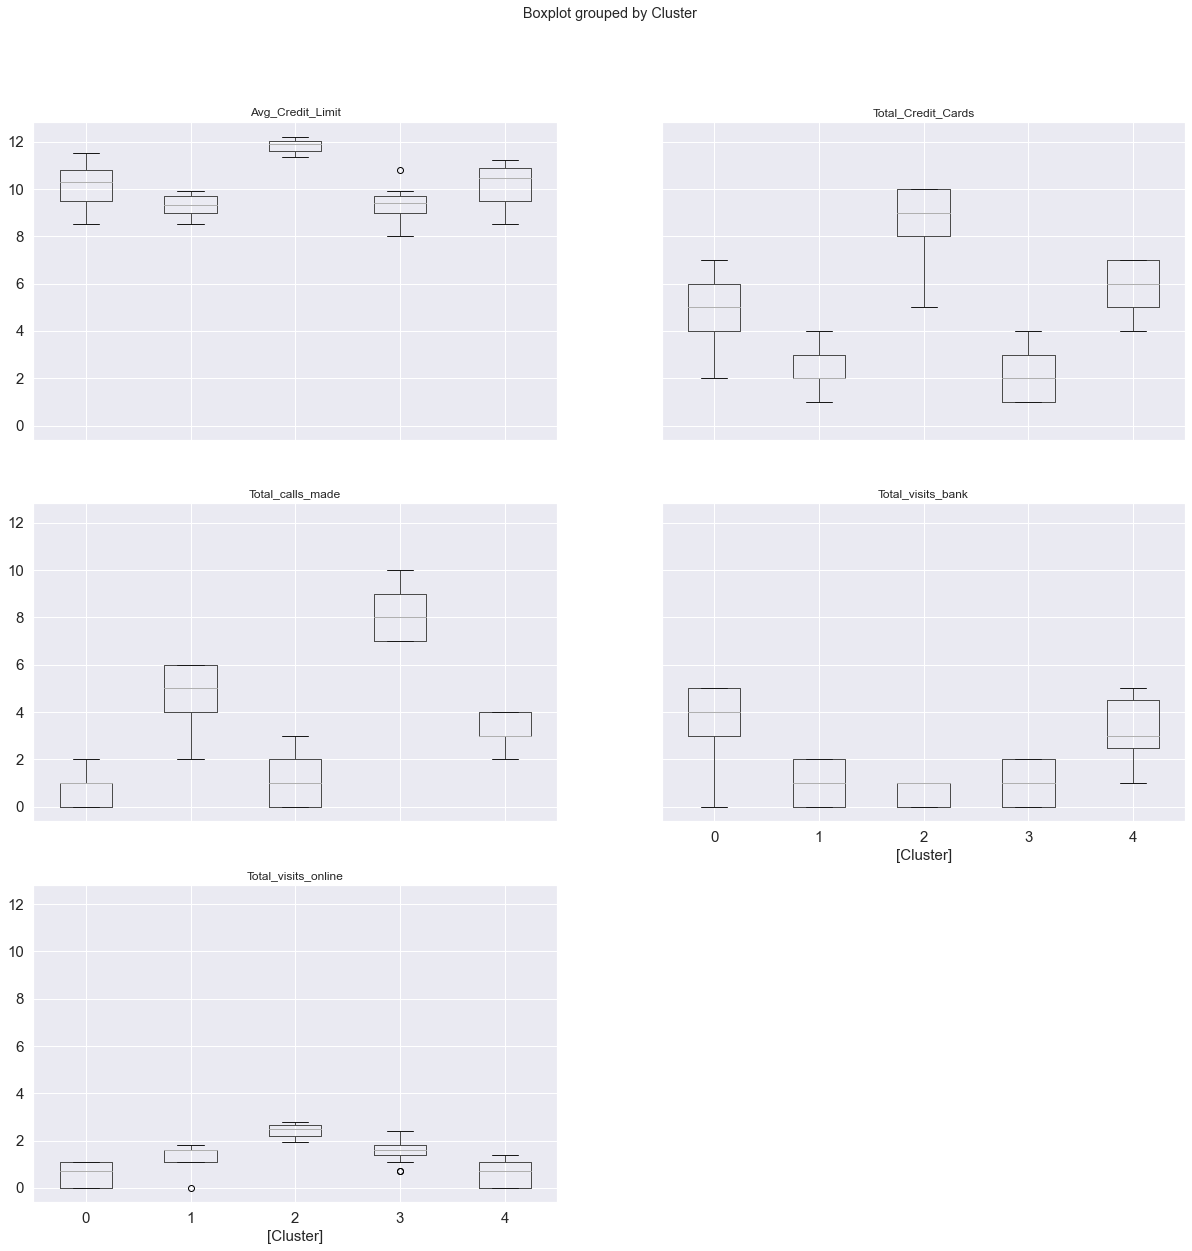

In [91]:
CCdata.boxplot(by = 'Cluster', fontsize= 15, layout=(3,2),  figsize=(20, 20))
plt.savefig('kmeans_5_Clusters_BoxP')

#### Analysis of Box plots for the 5 Clusters

#### 1> Avg_Credit_Limit :
    a) Cluster 2 (third cluster) has the max mediam value , followed by Clusters 4, 0, 3 and 1 . 
    b) Only Cluster 3 has outliers data
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 0 & 4 , as well as, 
        between Cluster 1 and 3. The dispersion is maximum for Cluster 4, followed by Clusters 0,1,3 & 2. Cluster 2 
        has the minimum dispersion .
    d) Based on the box plot whiskers , the overall range of data is highest for Cluster 0, followed by Clusters 4, 3, 1 
        and 2. 
    d) Considering X-axis starting from 0, the Clusters 0, 2, 3 and 4 show left skewness, which is lower credit limit. 
        Maximum left skewness is shown for Cluster 4 , followed by Clusters 0, 3 and 2. Cluster1 shows much less 
        skewness.
    e) All Clusters are within the normalized range of between 8 and 11.4. Hence all Clusters are in a group and not 
        spread out in a large range .
        
#### 2> Total_Credit_Cards :
    a) Cluster 2 (third cluster) has the max mediam value , followed by Clusters 4, 0, 3 and 1. This resembles the median 
        values for Avg_Credit_Limit
    b) No outliers data in any Custers
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 0,2,3 & 4. Cluster 1 
        has the minimum dispersion . 
    d) For Cluster 1, 25% and 50% are same . For Cluster 2 and 4, 75% and max are the same values. For Cluster 3 , 
        min and 25% values are the same.
    e) Based on the box plot whiskers , the overall range of data is highest for Cluster 2, followed by Clusters 0, 1, 3 
        and 4. 
    d) Considering X-axis starting from 0, all the Clusters , except Cluster 1 , shows much less skewness. Cluster 1 
        shows high right side skewness, since 25% and median 50% values coincide. 
    e) All the Clusters are not in a group and are fairly equally distributed across the data range.
    
#### 3> Total_Calls_made :
    a) Cluster 3 (fourth cluster) has the max mediam value , followed by Clusters 1, 5, 2 and 0. 
    b) No outliers data in any Custers
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 1,2 & 3. Also 
        Cluster 0 & 5 show similar , but have the minimum dispersion . 
    d)For all clusters , it is seen that the whiskers is extending to only one side. This implies that eith 25% & 
        min values are same , or 75% and max values are same.
    e) Based on the box plot whiskers , the overall range of data is highest for Cluster 1.Other Clusters 0, 2, 3,  
        and 4 have similar overall range. 
    d) Considering X-axis starting from 0, the Clusters 1,2 & 3 , shows much less skewness. Cluster 0 shows high 
        left side skewness, since 75% and median 50% values coincide. Cluster 4 shows high right side skewness, 
        since 25% and median 50% values coincide. 
    e) All the Clusters are not in a group and are fairly equally distributed across the data range.
    
#### 4> Total_visits_bank :
    a) Cluster 0 (first cluster) has the max mediam value , followed by Clusters 4, 3, 1 and 2. 
    b) No outliers data in any Custers
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 0,1,3 & 4. Also 
        Cluster 2 has the minimum dispersion . 
    d) No wiskers seen for clusters 1,2 & 3. This implies that no data in the between min & 25% quartile , as well 
        as no data in the max and 75% quartile range.
    e) For clusters 0, max and 75% data coincide. 
    f) Based on the box plot whiskers , the overall range of data is highest for Cluster 0.
    g) Considering X-axis starting from 0, Cluster 0 shows right side skewness.
    e) Cluster 2 , min & 25% values are same , as well as median 50% , 75% and max are same.
    
#### 5> Total_visits_online :
    a) Cluster 2 (third cluster) has the max mediam value .Clusters 1 & 3 , as well as clusters 0 and 4 , have same 
        median values. 
    b) Outliers data is present in Clusters 1 and 3.
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 0 & 4. Also 
        Cluster 1,2 & 3 show similar dispersion, but have lower dispersion than clusters 0 & 4.
    d) No whiskers seen for clusters 0.
    e) For cluster 4, it is seen that the whiskers is extending to only one side. This implies, 25% & min values
        are same .
    f) Cluster 1 has median 50% and 75% values as same.
    g) Based on the box plot whiskers , the overall range of data is highest for Cluster 3.
    h) Considering X-axis starting from 0, the Clusters 0,1, 2,3 & 4  , shows left sided skewness. 


### Silhouette score 

In [92]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil = CCdata.drop(['Cluster'], axis=1)
CCdata_sil

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [93]:
silhouette_avg = silhouette_score(CCdata_sil , predictions, metric = 'euclidean')
silhouette_avg

0.3151209045141567

In [94]:
silhouette_avg1 = silhouette_score(CCdata_sil , labels, metric = 'euclidean')
silhouette_avg1

0.3151209045141567

#### Silhouette scores for each sample

In [95]:
sample_silhouette_values = silhouette_samples(CCdata_sil, predictions, metric = 'euclidean')
sample_silhouette_values

array([ 0.18092842,  0.41063915,  0.12753792,  0.03130693,  0.18374088,
        0.35676377,  0.12305458, -0.00562462,  0.32716275,  0.04215988,
        0.42611803,  0.09227817,  0.44837054,  0.26380914,  0.30755977,
        0.1096385 ,  0.57478459,  0.54120772,  0.0697879 ,  0.32835467,
        0.48071777,  0.11209351,  0.28426826,  0.51494931,  0.51974079,
        0.49637369,  0.50173175,  0.49645421,  0.27058618,  0.06510832,
        0.54140817,  0.35777212,  0.47883079,  0.22793462,  0.47351309,
        0.53547434,  0.53132567,  0.29000505,  0.47807039,  0.49182332,
        0.40642956,  0.10788263,  0.18365262,  0.53310153,  0.36750007,
        0.45901761,  0.40759297,  0.24737146,  0.30588312,  0.33033559,
        0.47478167,  0.52317356,  0.426912  ,  0.50356607,  0.52312065,
        0.47246838,  0.40967393,  0.5108428 ,  0.1090045 ,  0.45163293,
        0.04908497,  0.43747228,  0.46114604,  0.30003049,  0.4753779 ,
        0.51151384,  0.28568788,  0.28151525,  0.46328706,  0.07

In [96]:
row_index = 0
Algo = 'Algo'
Method = 'N/A'
scores = pd.DataFrame([[ Algo,0,Method,0]], columns = ['Algorithm','No of Clusters','Method', 'Silhoutte Score'])
scores

Algorithm  No of Clusters Method  Silhoutte Score
0      Algo               0    N/A                0

In [97]:
row_index = row_index + 1
Algo = 'K Means '
clusters = 5
Method = 'N/A'
sil_score = silhouette_avg

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters Method  Silhoutte Score
1  K Means                5    N/A         0.315121

### Creating 4 clusters for testing , instead of 5 clusters selected earlier

In [98]:
CCdata2 = CCdata.copy()
CCdata2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made Cluster  
0               0.693147                 0       0  
1               2.397895                 9       3  
2               1.386294                 4       4  
3               0.693147                 4       4  
4               2.564949                 3       2  
..                   ...               ...     ...  
655             2.397895                 0       2  
656             2.639057                 2       2  
657             2.302585                 1       2  
658             2.772589                 0       2  
659             2.564949                 2       2  

[660 rows x 6 columns]

In [99]:
# Drop the 'Cluster' column since it was added to DF from earlier iteration of Clustering , with Cluster = 5
CCdata3= CCdata2.drop(['Cluster'], axis =1)
CCdata3

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [100]:
kmeans1 = KMeans(n_clusters=4, init = 'k-means++', n_init= 10, max_iter = 500, random_state=3, n_jobs = -1)
kmeans1.fit(CCdata3)

C:\Users\cgunn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(max_iter=500, n_clusters=4, n_jobs=-1, random_state=3)

#### Check the number of data in each cluster

In [101]:
labels1 = kmeans1.labels_
counts1 = np.bincount(labels1[labels1>=0])
print(counts1)

[379 107  51 123]


In [102]:
labels1

array([0, 3, 2, 1, 2, 3, 2, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### It can be seen that groups have good distribution of data points. Any one group does not have a very low or very high number

#### Check the coordinates of centers in each cluster

In [103]:
centroids1 = kmeans1.cluster_centers_
centroid_df1 = pd.DataFrame(centroids1, columns = list(CCdata3) )
centroid_df1.transpose()

0         1          2         3
Avg_Credit_Limit     10.154105  9.342566  11.805793  9.327481
Total_Credit_Cards    5.530343  2.579439   8.705882  2.357724
Total_visits_bank     3.519789  1.056075   0.607843  0.878049
Total_visits_online   0.575733  1.412095   2.425783  1.493566
Total_calls_made      1.963061  4.953271   1.137255  8.398374

In [104]:
centroid_df1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         10.154105            5.530343           3.519789   
1          9.342566            2.579439           1.056075   
2         11.805793            8.705882           0.607843   
3          9.327481            2.357724           0.878049   

   Total_visits_online  Total_calls_made  
0             0.575733          1.963061  
1             1.412095          4.953271  
2             2.425783          1.137255  
3             1.493566          8.398374

In [105]:
centroid_df1.reset_index(inplace=True)

In [106]:
centroid_df1.rename(columns={'index':'Clusters'},inplace=True)
centroid_df1

Clusters  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         0         10.154105            5.530343           3.519789   
1         1          9.342566            2.579439           1.056075   
2         2         11.805793            8.705882           0.607843   
3         3          9.327481            2.357724           0.878049   

   Total_visits_online  Total_calls_made  
0             0.575733          1.963061  
1             1.412095          4.953271  
2             2.425783          1.137255  
3             1.493566          8.398374

#### Deriving a new column 'Interactions_Count_per_Card' , that checks per card , interactions that include 'Total_visits_bank' , plus 'Total_visits_online', plus 'Total_calls_made'. This is to help to figure out interactions with bank , on a per card basis, within each Cluster

In [107]:
centroid_df1['Interactions_Count_per_Card'] = ( (centroid_df1['Total_visits_bank'] + centroid_df1['Total_visits_online'] + centroid_df1['Total_calls_made']) / centroid_df1['Total_Credit_Cards'])
centroid_df1.transpose()

0         1          2         3
Clusters                      0.000000  1.000000   2.000000  3.000000
Avg_Credit_Limit             10.154105  9.342566  11.805793  9.327481
Total_Credit_Cards            5.530343  2.579439   8.705882  2.357724
Total_visits_bank             3.519789  1.056075   0.607843  0.878049
Total_visits_online           0.575733  1.412095   2.425783  1.493566
Total_calls_made              1.963061  4.953271   1.137255  8.398374
Interactions_Count_per_Card   1.095517  2.877153   0.479088  4.567961

In [108]:
centroid_df1['Clusters'] = centroid_df1['Clusters'].astype('category')
centroid_df1.transpose()

0        1         2         3
Clusters                            0        1         2         3
Avg_Credit_Limit              10.1541  9.34257   11.8058   9.32748
Total_Credit_Cards            5.53034  2.57944   8.70588   2.35772
Total_visits_bank             3.51979  1.05607  0.607843  0.878049
Total_visits_online          0.575733  1.41209   2.42578   1.49357
Total_calls_made              1.96306  4.95327   1.13725   8.39837
Interactions_Count_per_Card   1.09552  2.87715  0.479088   4.56796

### Observations  based on Clusters, with 4 clusters:
    a) Cluster 2 has the highest Avg_Credit_Limit , the highest Total_Credit_Cards, as well as the highest 
        'Total_visits_online' , coupled with lowest 'Total_visits_bank'
    b) Clusters 1 and 3 have similar 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online' , but differ more 
        for 'Total_calls_made' , as well as higher difference for 'Total_visits_bank'. The calls may be higher due to 
        queries not be addressed satisfactorily resulting in repeated calls , and the online experience may not be as 
        good.The 'Avg_Credit_Limit' for cluster 1 and 3 is also the lowest among 4 clusters. May be possible to increase 
        'Avg_Credit_Limit' by improving online and oncall experience.
    c) Clusters 1 and 3 have similar 'Avg_Credit_Limit' and 'Total_Credit_Cards', but show more 'Total_calls_made' , as 
        compared to other clusters
    d) Cluster 3 has the highest 'Total_calls_made' and the second lowest 'Total_visits_bank'
    f) Cluster 0 has the lowest 'Total_visits_online' and the second lowest 'Total_calls_made' , with the highest 
        'Total_visits_bank'. Cluster 0 has the second highest 'Avg_Credit_Limit'. May indicate that this 
        cluster of customers are forced to come to bank since their queries are not adequatly addressed online or by 
        calls.Or these customers feel more comfortable in direct interactions with the bank employees. Possible reason is 
        that the online experience or call experience is not satisfactory.
    g) Using the 'Instructions_Count_per_Card' values, it is seen that Clusters 3 and 1 users have very high interactions 
        with Bank, though Avg_Credit_Limit and Total_Credit_Cards is the lowest . The number of interactions can also be 
        taken as oppurtunities for the bank to engage these users to upsell products. 
    h) Using the 'Instructions_Count_per_Card' values, it is seen that Clusters 2 and 0 users have very low interactions 
        with Bank among bank visit / online or calls made, though Avg_Credit_Limit and Total_Credit_Cards is the 
        highest . The low number of interactions can also be taken as areas to improve their online , on call and 
        in bank experience , so that bank gets more oppurtunities for the bank to engage these users to upsell products.


### Data prep for Box plot of Clusters

In [109]:
CCdata3

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [110]:
predictions2 = kmeans1.predict(CCdata3)
predictions2

array([0, 3, 2, 1, 2, 3, 2, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
CCdata3["Cluster"] = predictions2
CCdata3['Cluster'] = CCdata3['Cluster'].astype('category')
CCdata3

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made Cluster  
0               0.693147                 0       0  
1               2.397895                 9       3  
2               1.386294                 4       2  
3               0.693147                 4       1  
4               2.564949                 3       2  
..                   ...               ...     ...  
655             2.397895                 0       2  
656             2.639057                 2       2  
657             2.302585                 1       2  
658             2.772589                 0       2  
659             2.564949                 2       2  

[660 rows x 6 columns]

#### Box Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B34C91C8>,
      dtype=object)

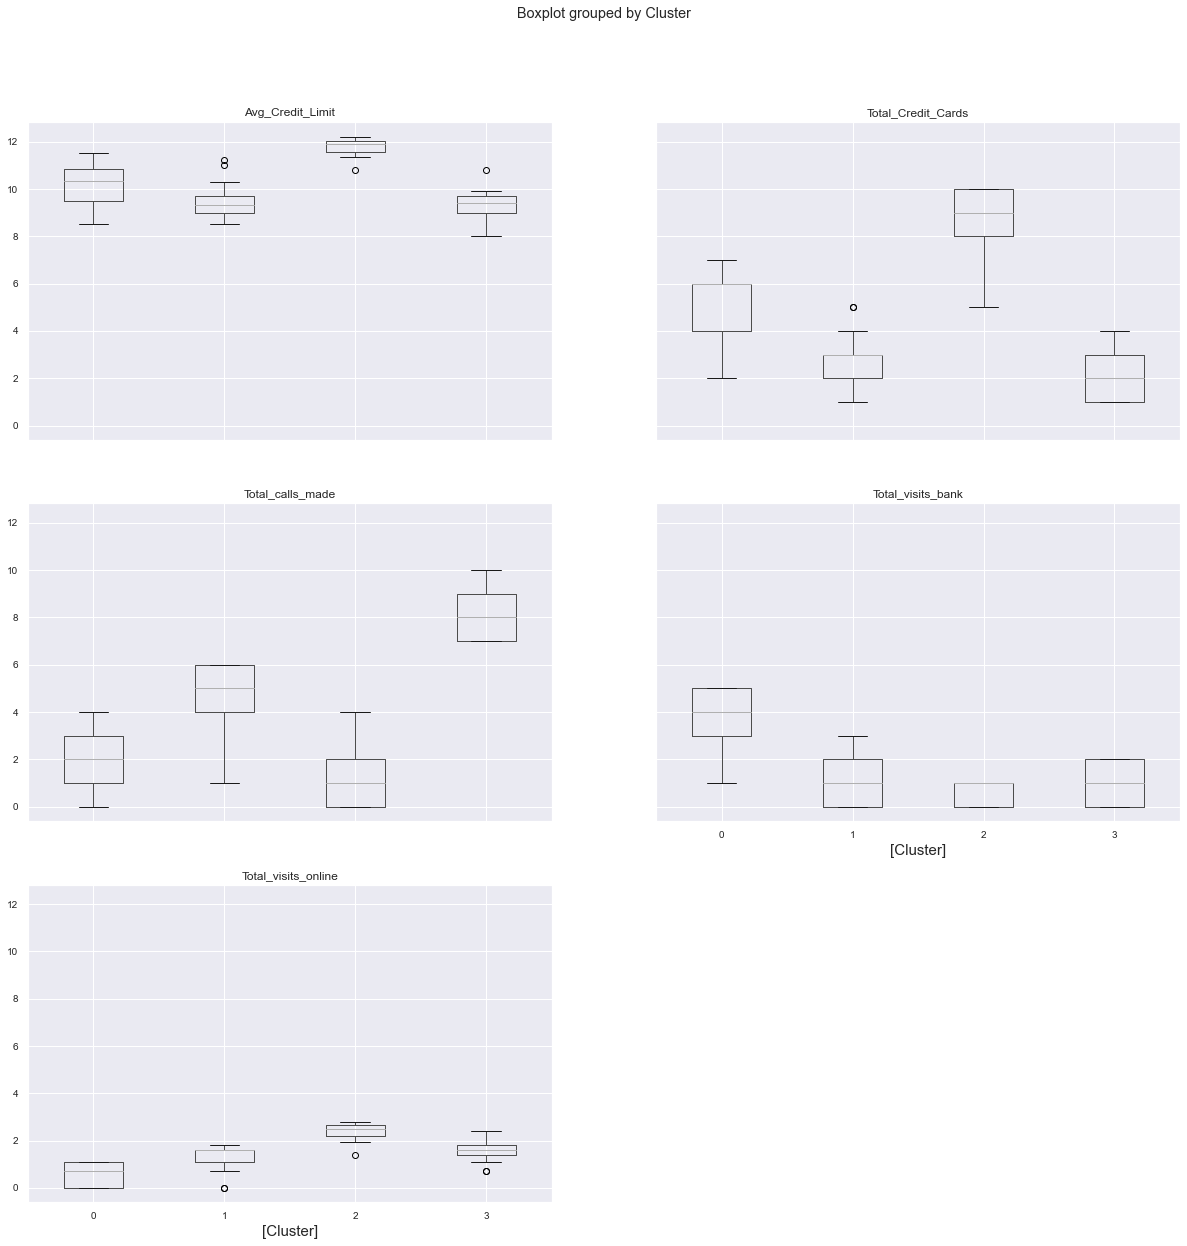

In [112]:
CCdata3.boxplot(by = 'Cluster',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [113]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil1 = CCdata3.drop(['Cluster'], axis=1)
CCdata_sil1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [114]:
silhouette_avg1 = silhouette_score(CCdata_sil1 , predictions2, metric = 'euclidean')
silhouette_avg1

0.3827506154644814

In [115]:
silhouette_avg1 = silhouette_score(CCdata_sil1 , labels1, metric = 'euclidean')
silhouette_avg1

0.3827506154644814

### The Silhouette score is higher with 4 Clusters. Hence the better clustering solution is to have four clusters

#### Silhouette scores for each sample

In [116]:
sample_silhouette_values1 = silhouette_samples(CCdata_sil1, predictions2, metric = 'euclidean')
sample_silhouette_values1

array([ 0.06078246,  0.42203796,  0.05357488,  0.15432818,  0.24723556,
        0.37225998,  0.13156999,  0.08827062,  0.34948842,  0.06177742,
        0.41576257,  0.12319235,  0.46232169,  0.22192855,  0.27420632,
        0.1492479 ,  0.56227634,  0.52479476,  0.10378845,  0.34121502,
        0.4662457 ,  0.14917506,  0.2667075 ,  0.49647063,  0.52982314,
        0.50729546,  0.51299186,  0.50600578,  0.23131973,  0.08833228,
        0.56781711,  0.3262657 ,  0.49074721,  0.1885456 ,  0.48134037,
        0.5206743 ,  0.54005887,  0.25200948,  0.48557899,  0.50399827,
        0.41498079,  0.14608532,  0.31976613,  0.51851639,  0.44666396,
        0.46817653,  0.38411292,  0.21449116,  0.32018077,  0.31025095,
        0.48917166,  0.49548132,  0.44586107,  0.5152324 ,  0.53555967,
        0.45779896,  0.38118809,  0.52116553,  0.14757891,  0.4605682 ,
        0.06876158,  0.45067452,  0.44255236,  0.2696293 ,  0.48981374,
        0.49384396,  0.24926679,  0.27222444,  0.47453871,  0.11

In [117]:
row_index = row_index + 1
Algo = 'K Means '
clusters = 4
Method = 'N/A'
sil_score = silhouette_avg1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters Method  Silhoutte Score
1  K Means                5    N/A         0.315121
2  K Means                4    N/A         0.382751

### Creating 3 clusters for testing , instead of 5 & 4 clusters selected earlier

In [118]:
CCdata4 = CCdata.copy()
CCdata4

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made Cluster  
0               0.693147                 0       0  
1               2.397895                 9       3  
2               1.386294                 4       4  
3               0.693147                 4       4  
4               2.564949                 3       2  
..                   ...               ...     ...  
655             2.397895                 0       2  
656             2.639057                 2       2  
657             2.302585                 1       2  
658             2.772589                 0       2  
659             2.564949                 2       2  

[660 rows x 6 columns]

In [119]:
# Drop the 'Cluster' column since it was added to DF from earlier iteration of Clustering , with Cluster = 5
CCdata5= CCdata4.drop(['Cluster'], axis =1)
CCdata5

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [120]:
kmeans2 = KMeans(n_clusters=3, init = 'k-means++', n_init= 10, max_iter = 500, random_state=3, n_jobs = -1)
kmeans2.fit(CCdata5)

C:\Users\cgunn\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(max_iter=500, n_clusters=3, n_jobs=-1, random_state=3)

#### Check the number of data in each cluster

In [121]:
labels2 = kmeans2.labels_
counts2 = np.bincount(labels2[labels2>=0])
print(counts2)

[390 220  50]


In [122]:
labels2

array([0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### It can be seen that distribution of data points data among groups is not balanced ,with one group having 50 observations and group with max observations having 390 observations

#### Check the coordinates of centers in each cluster

In [123]:
centroids2 = kmeans2.cluster_centers_
centroid_df2 = pd.DataFrame(centroids2, columns = list(CCdata5) )
centroid_df2.transpose()

0         1          2
Avg_Credit_Limit     10.145889  9.314834  11.825513
Total_Credit_Cards    5.497436  2.386364   8.740000
Total_visits_bank     3.469231  0.922727   0.600000
Total_visits_online   0.584513  1.483781   2.446572
Total_calls_made      2.012821  6.936364   1.080000

In [124]:
centroid_df2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         10.145889            5.497436           3.469231   
1          9.314834            2.386364           0.922727   
2         11.825513            8.740000           0.600000   

   Total_visits_online  Total_calls_made  
0             0.584513          2.012821  
1             1.483781          6.936364  
2             2.446572          1.080000

In [125]:
centroid_df2.reset_index(inplace=True)

In [126]:
centroid_df2.rename(columns={'index':'Clusters'},inplace=True)
centroid_df2

Clusters  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         0         10.145889            5.497436           3.469231   
1         1          9.314834            2.386364           0.922727   
2         2         11.825513            8.740000           0.600000   

   Total_visits_online  Total_calls_made  
0             0.584513          2.012821  
1             1.483781          6.936364  
2             2.446572          1.080000

#### Deriving a new column 'Interactions_Count_per_Card' , that checks per card , interactions that include 'Total_visits_bank' , plus 'Total_visits_online', plus 'Total_calls_made'. This is to help to figure out interactions with bank , on a per card basis, within each Cluster

In [127]:
centroid_df2['Interactions_Count_per_Card'] = ( (centroid_df2['Total_visits_bank'] + centroid_df2['Total_visits_online'] + centroid_df2['Total_calls_made']) / centroid_df2['Total_Credit_Cards'])
centroid_df2.transpose()

0         1          2
Clusters                      0.000000  1.000000   2.000000
Avg_Credit_Limit             10.145889  9.314834  11.825513
Total_Credit_Cards            5.497436  2.386364   8.740000
Total_visits_bank             3.469231  0.922727   0.600000
Total_visits_online           0.584513  1.483781   2.446572
Total_calls_made              2.012821  6.936364   1.080000
Interactions_Count_per_Card   1.103526  3.915108   0.472148

In [128]:
centroid_df2['Clusters'] = centroid_df2['Clusters'].astype('category')
centroid_df2.transpose()

0         1         2
Clusters                            0         1         2
Avg_Credit_Limit              10.1459   9.31483   11.8255
Total_Credit_Cards            5.49744   2.38636      8.74
Total_visits_bank             3.46923  0.922727       0.6
Total_visits_online          0.584513   1.48378   2.44657
Total_calls_made              2.01282   6.93636      1.08
Interactions_Count_per_Card   1.10353   3.91511  0.472148

### Observations  based on Clusters, with 3 clusters:
    a) Cluster 2 has the highest Avg_Credit_Limit , the highest Total_Credit_Cards, as well as the highest 
        'Total_visits_online' , coupled with lowest 'Total_visits_bank'
    b) Cluster 1 has the highest 'Total_calls_made' and the second lowest 'Total_visits_bank'
    c) Cluster 0 has the lowest 'Total_visits_online' and the second lowest 'Total_calls_made' , with the highest 
        'Total_visits_bank'. Cluster 0 has the second highest 'Avg_Credit_Limit'. May indicate that this 
        cluster of customers are forced to come to bank since their queries are not adequatly addressed online or by 
        calls.Or these customers feel more comfortable in direct interactions with the bank employees. Possible reason is 
        that the online experience or call experience is not satisfactory.
    d) Using the 'Instructions_Count_per_Card' values, it is seen that Cluster 1 users have very high interactions 
        with Bank, though Avg_Credit_Limit and Total_Credit_Cards is the lowest . The number of interactions can also be 
        taken as oppurtunities for the bank to engage these users to upsell products. 
    e) Using the 'Instructions_Count_per_Card' values, it is seen that Clusters 2 and 0 users have very low interactions 
        with Bank among bank visit / online or calls made, though Avg_Credit_Limit and Total_Credit_Cards is the 
        highest . The low number of interactions can also be taken as areas to improve their online , on call and 
        in bank experience , so that bank gets more oppurtunities for the bank to engage these users to upsell products.


### Data prep for Box plot of Clusters

In [129]:
CCdata5

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [130]:
predictions3 = kmeans2.predict(CCdata5)
predictions3

array([0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
CCdata5["Cluster"] = predictions3
CCdata5['Cluster'] = CCdata5['Cluster'].astype('category')
CCdata5

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made Cluster  
0               0.693147                 0       0  
1               2.397895                 9       1  
2               1.386294                 4       0  
3               0.693147                 4       0  
4               2.564949                 3       2  
..                   ...               ...     ...  
655             2.397895                 0       2  
656             2.639057                 2       2  
657             2.302585                 1       2  
658             2.772589                 0       2  
659             2.564949                 2       2  

[660 rows x 6 columns]

In [132]:
CCdata_Cluster3 = CCdata5.groupby(['Cluster'])
pd.set_option('display.max_columns', None)
CCdata_Cluster3.describe()

Avg_Credit_Limit                                             \
                   count       mean       std        min        25%   
Cluster                                                               
0                  390.0  10.145889  0.800426   8.517193   9.472705   
1                  220.0   9.314834  0.430155   8.006368   8.987197   
2                   50.0  11.825513  0.257247  11.338572  11.596736   

                                         Total_Credit_Cards            \
               50%        75%        max              count      mean   
Cluster                                                                 
0        10.341742  10.854144  11.512925              390.0  5.497436   
1         9.349156   9.680344  10.819778              220.0  2.386364   
2        11.887925  12.043501  12.206073               50.0  8.740000   

                                             Total_visits_bank            \
              std  min  25%  50%   75%   max             count      mean   
Cluster                                                                    
0        1.148932  2.0  4.0  6.0   6.0   7.0             390.0  3.469231   
1        1.094109  1.0  1.0  2.0   3.0   4.0             220.0  0.922727   
2        1.274715  5.0  8.0  9.0  10.0  10.0              50.0  0.600000   

                                            Total_visits_online            \
              std  min  25%  50%   75%  max               count      mean   
Cluster                                                                     
0        1.150758  0.0  2.0  3.0  4.75  5.0               390.0  0.584513   
1        0.798647  0.0  0.0  1.0  2.00  2.0               220.0  1.483781   
2        0.494872  0.0  0.0  1.0  1.00  1.0                50.0  2.446572   

                                                                     \
              std       min       25%       50%       75%       max   
Cluster                                                               
0        0.477628  0.000000  0.000000  0.693147  1.098612  1.609438   
1        0.274847  0.693147  1.314374  1.609438  1.655018  2.397895   
2        0.250302  1.945910  2.197225  2.484907  2.639057  2.772589   

        Total_calls_made                                                
                   count      mean       std  min  25%  50%  75%   max  
Cluster                                                                 
0                  390.0  2.012821  1.434908  0.0  1.0  2.0  3.0   4.0  
1                  220.0  6.936364  1.938682  2.0  5.0  7.0  9.0  10.0  
2                   50.0  1.080000  0.876915  0.0  0.0  1.0  2.0   3.0

### Box plots

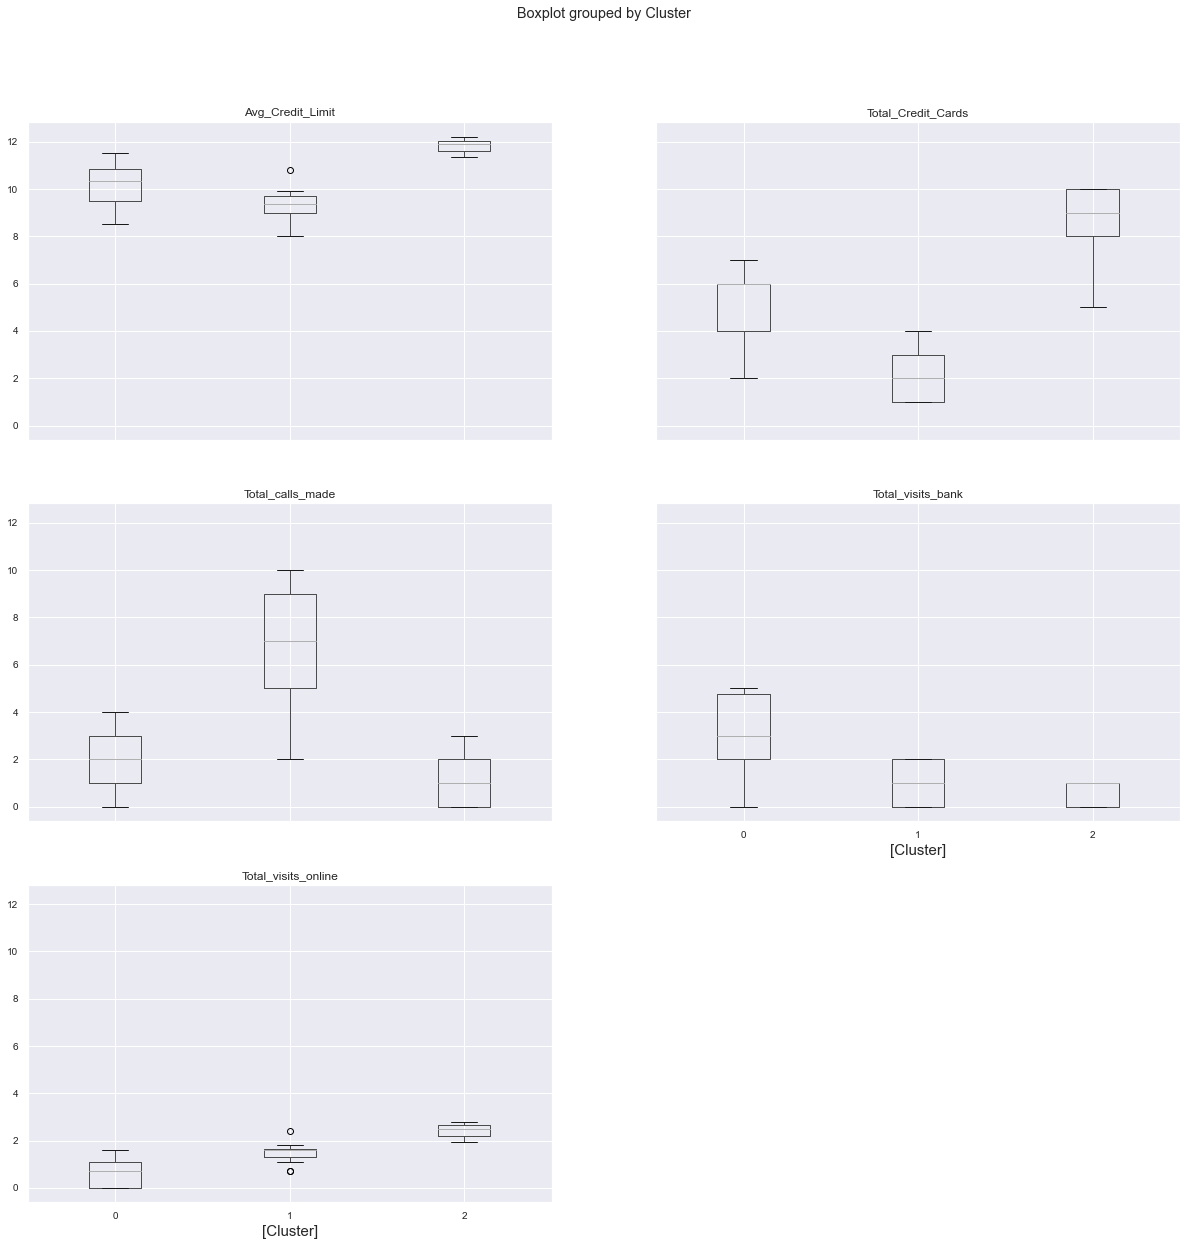

In [133]:
CCdata5.boxplot(by = 'Cluster',  layout=(3,2),  figsize=(20, 20))
plt.savefig('kmeans_3_Clusters_BoxP')

#### Analysis of Box plots for K Means Clustering , with K=3

#### 1> Avg_Credit_Limit :
    a) Cluster 2 (third cluster) has the max mediam value , followed by Clusters 0 and 1 . 
    b) Only Cluster 1 has outliers data
    c) As shown by length of the boxes , the interquartile ranges show different dispersions in all Clusters. The 
        dispersion is maximum for Cluster 0, followed by Clusters 1 & 2. Cluster 2 has the minimum dispersion .
    d) Based on the box plot whiskers , the overall range of data is highest for Cluster 0, followed by Clusters 1 
        and 2. 
    d) Considering X-axis starting from 0, all the Clusters show left skewness, which is lower credit limit. 
        Maximum left skewness is shown for Cluster 0 , followed by Clusters 2. Cluster 1 shows much less skewness.
    e) All Clusters are within the normalized range of between 8 and 12.21. Hence all Clusters are in a group and not 
        spread out in a large range .
        
#### 2> Total_Credit_Cards :
    a) Cluster 2 (third cluster) has the max median value , followed by Clusters 0 and 1. This resembles the median 
        values for Avg_Credit_Limit
    b) No outliers data in any Custers
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 0,1 & 2. Cluster 1 
        has the minimum dispersion . 
    d) For Cluster 1, 25% and min are same . For Cluster 2, 75% and max are the same values. 
    e) Based on the box plot whiskers , the overall range of data is similar for Cluster 2 and Cluster 0.Cluster 1 has 
        the min overall range.
    d) Considering X-axis starting from 0, Clusters 1 & 2 show much less skewness. Cluster 0 shows high left side 
        skewness, since 50% and 75% values coincide. 
    e) All the Clusters are not in a group and are fairly equally distributed across the data range.
     
#### 3> Total_Calls_made :
    a) Cluster 1 has the max median value , followed by Clusters 0 and 2. 
    b) No outliers data in any Custers
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 0 & 2. Cluster 1 
        has maximum disperion of data. . 
    d) For Cluster 2 , it is seen that the whiskers is extending to only one side. The 25% & min values are same.
    e) Based on the box plot whiskers , the overall range of data is highest for Cluster 1 , followed by 
        Clusters 0 and 2.
    d) Considering X-axis starting from 0, all Clusters shows much less skewness. 
    
#### 4> Total_visits_bank :
    a) Cluster 0 has the max median value. Clusters  1 and 2 have same median values. 
    b) No outliers data in any Clusters
    c) As shown by length of the boxes , the interquartile ranges show max dispersion in Cluster 0 , followed by 
        Clusters  1 and 2.
    d) No whiskers seen for clusters 1 & 2. This implies that no data in the between min & 25% quartile (both same) , 
        as well as no data in the max and 75% quartile range (both same values).
    e) For cluster 1 and 2, max and 75% data values coincide. 
    f) Based on the box plot whiskers , the overall range of data is highest for Cluster 0.
    g) Considering X-axis starting from 0, Cluster 2 shows high left skeweness . Cluster 0 shows right side skewness.
    
#### 5> Total_visits_online :
    a) Cluster 2 has the max mediam value, followed by Clusters 1 & 0.
    b) Outliers data is present in Clusters 1.
    c) As shown by length of the boxes , the interquartile ranges show max dispersion in Cluster 0 , followed by Clusters
        2 and 1. 
    d) For cluster 0, it is seen that the whiskers is extending to only one side.The 25% & min values are same .
    e) Based on the box plot whiskers , the overall range of data is highest for Cluster 0.
    h) Considering X-axis starting from 0, the Clusters 0 & 2  , shows left sided skewness. Cluster 1 shows higher 
        left sided skewness , given median and 75% values almost coincide.


### Silhouette score for K Means Clustering with 3 Clusters

In [134]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil2 = CCdata5.drop(['Cluster'], axis=1)
CCdata_sil2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [135]:
silhouette_avg2 = silhouette_score(CCdata_sil2 , predictions3, metric = 'euclidean')
silhouette_avg2

0.46602072689353935

In [136]:
silhouette_avg2 = silhouette_score(CCdata_sil2 , labels2, metric = 'euclidean')
silhouette_avg2

0.46602072689353935

### The Silhouette score is highest with 3 Clusters. Hence the best clustering solution is to have three clusters, using K Means Clustering

#### Silhouette scores for each sample

In [137]:
sample_silhouette_values2 = silhouette_samples(CCdata_sil2, predictions3, metric = 'euclidean')
sample_silhouette_values2

array([ 0.25333622,  0.58106109, -0.0496419 ,  0.16194193,  0.23625387,
        0.62088883,  0.12298116,  0.22031934,  0.04365458,  0.51897533,
        0.37666292,  0.62724183,  0.61198791,  0.60182011,  0.55529926,
        0.65963623,  0.32683902,  0.38353306,  0.612422  ,  0.57600283,
        0.36907066,  0.65556116,  0.47506266,  0.37965099,  0.61251753,
        0.60283338,  0.63091908,  0.5829306 ,  0.60266208,  0.56494989,
        0.25073442,  0.57545447,  0.60564   ,  0.59708588,  0.55236262,
        0.37098322,  0.59858502,  0.60661827,  0.55186488,  0.62213124,
        0.53459419,  0.64383319,  0.07607132,  0.36901623,  0.22171958,
        0.57971735,  0.44452364,  0.54727857,  0.57878035,  0.49286292,
        0.64070789,  0.5057407 ,  0.67013662,  0.6346366 ,  0.65293815,
        0.3085824 ,  0.51298062,  0.60949966,  0.64598133,  0.5737978 ,
        0.54256422,  0.60133488,  0.39650541,  0.57648609,  0.64129565,
        0.37315642,  0.60123339,  0.38896636,  0.58058677,  0.59

In [138]:
row_index = row_index + 1
Algo = 'K Means '
clusters = 3
Method = 'N/A'
sil_score = silhouette_avg2

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters Method  Silhoutte Score
1  K Means                5    N/A         0.315121
2  K Means                4    N/A         0.382751
3  K Means                3    N/A         0.466021

## 4.0 Heirarchical clustering 

#### 4.1 Using method = Average

In [139]:
CCdata_hc_avg= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_avg # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [140]:
Z_avg = linkage(CCdata_hc_avg, metric='euclidean', method='average')
c_avg, coph_dists = cophenet(Z_avg , pdist(CCdata_hc_avg))

c_avg

0.797950013887167

In [141]:
# Print just the cophenetic coorelation distances
coph_dists1 = cophenet(Z_avg )
coph_dists1

array([7.28717692, 5.3121021 , 5.3121021 , ..., 2.50691281, 2.50691281,
       1.87099309])

In [142]:
# Print the cophenetic correlation coefficient , plus the distances 
c_avg1 =  cophenet(Z_avg, pdist(CCdata_hc_avg))
c_avg1

(0.797950013887167,
 array([7.28717692, 5.3121021 , 5.3121021 , ..., 2.50691281, 2.50691281,
        1.87099309]))

#### The cophenetic corrleation coefficient is 0.79795 , which is good score 

#### Drawing Dendrogram

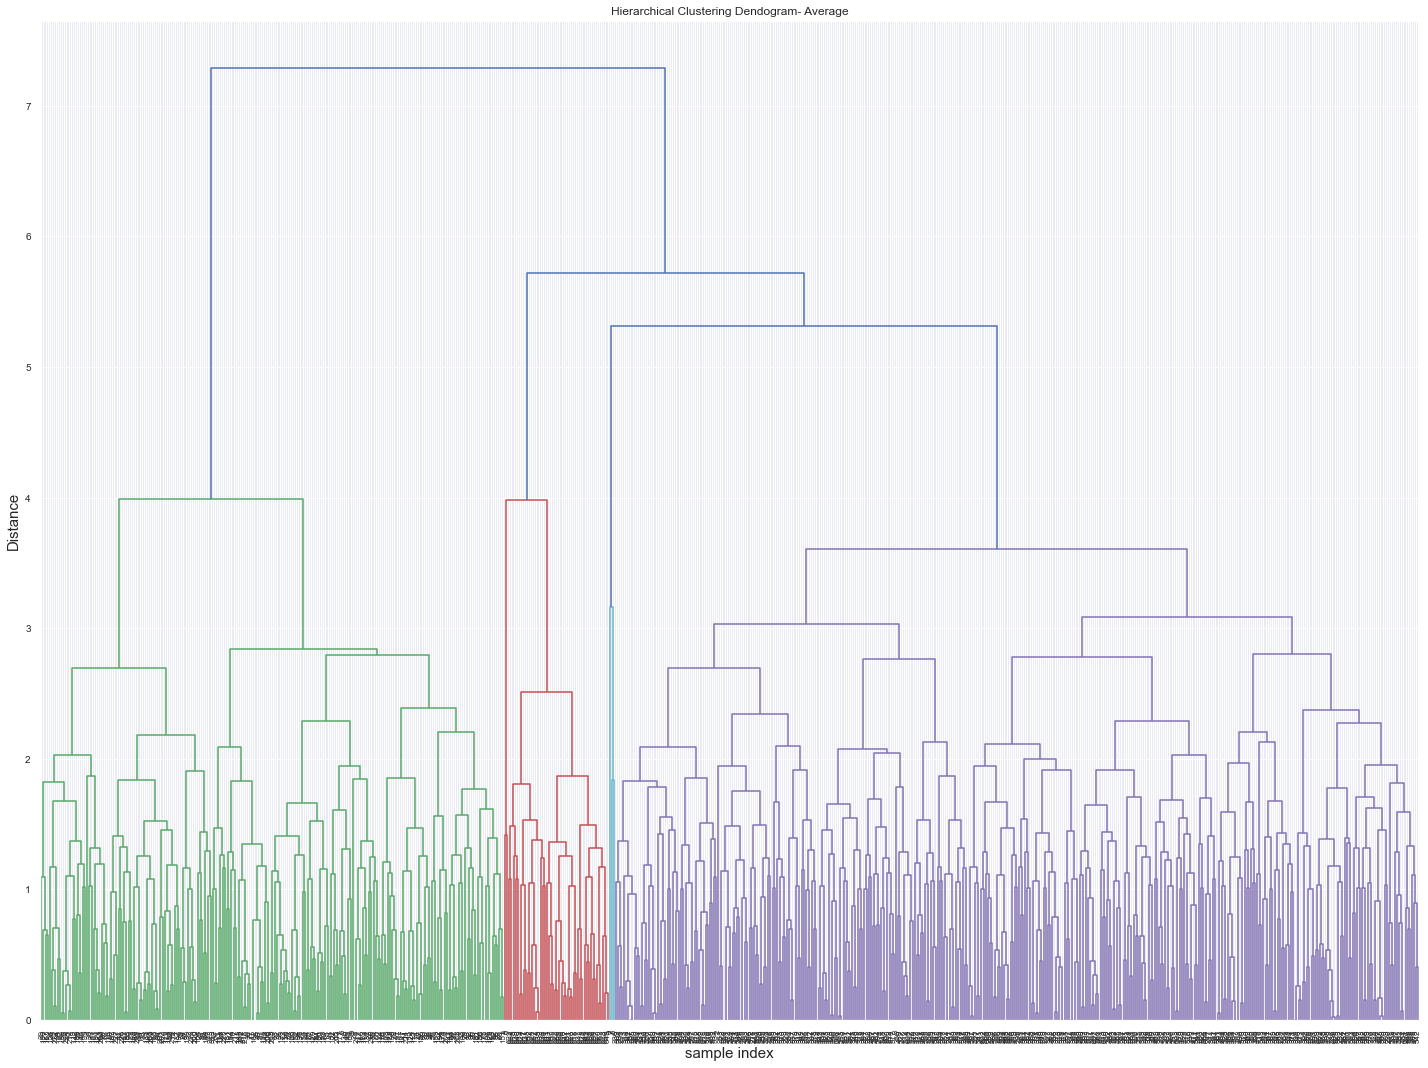

In [143]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- Average')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_avg, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [45.0, 45.0, 76.25, 76.25],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [121.25, 121.25, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [182.5, 182.5, 210.0, 210.0],
  [140.625, 140.625, 196.25, 196.25],
  [60.625, 60.625, 168.4375, 168.4375],
  [13.75, 13.75, 114.53125, 114.53125],
  [235.0, 235.0, 245.0, 245.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [263.75, 263.75, 303.75, 303.75],
  [240.0, 240.0, 283.75, 283.75],
  [225.0, 225.0, 261.875, 261.87

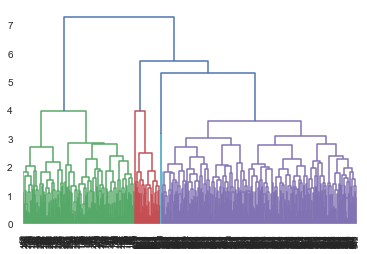

In [144]:
dgram_avg = dendrogram(Z_avg, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_avg

In [145]:
labels_dgram_avg = dgram_avg['ivl']
labels_dgram_avg

['39',
 '150',
 '127',
 '158',
 '154',
 '38',
 '112',
 '222',
 '34',
 '102',
 '59',
 '126',
 '224',
 '45',
 '214',
 '19',
 '142',
 '109',
 '89',
 '144',
 '40',
 '199',
 '1',
 '36',
 '133',
 '181',
 '190',
 '121',
 '163',
 '200',
 '26',
 '53',
 '119',
 '80',
 '187',
 '193',
 '227',
 '12',
 '61',
 '226',
 '157',
 '183',
 '88',
 '123',
 '105',
 '146',
 '208',
 '54',
 '111',
 '98',
 '138',
 '101',
 '168',
 '209',
 '165',
 '50',
 '64',
 '201',
 '202',
 '170',
 '173',
 '195',
 '52',
 '219',
 '74',
 '137',
 '196',
 '78',
 '24',
 '57',
 '139',
 '32',
 '213',
 '160',
 '220',
 '104',
 '25',
 '91',
 '68',
 '148',
 '27',
 '223',
 '313',
 '42',
 '207',
 '113',
 '128',
 '87',
 '225',
 '131',
 '192',
 '184',
 '10',
 '217',
 '145',
 '185',
 '212',
 '211',
 '216',
 '30',
 '77',
 '17',
 '162',
 '35',
 '43',
 '97',
 '194',
 '143',
 '16',
 '206',
 '169',
 '218',
 '63',
 '72',
 '31',
 '129',
 '73',
 '130',
 '75',
 '83',
 '108',
 '49',
 '152',
 '96',
 '135',
 '71',
 '156',
 '44',
 '110',
 '67',
 '120',
 '16

In [146]:
colors_dgram_average = dgram_avg['color_list']
colors_dgram_average
# print unique colors
x_average = np.array(colors_dgram_average)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_average), '\033[0m')

Cluster colors are : ['b' 'c' 'g' 'm' 'r'] 


#### Color code indicates Five suggessted clusters formed when using 'Average' linkage method

#### Using Distance measure to truncate the clusters into managable numbers

In [147]:
max_d_avg = 5

In [148]:
from scipy.cluster.hierarchy import fcluster
clusters_avg_maxd = fcluster(Z_avg, max_d_avg, criterion='distance')
clusters_avg_maxd

array([3, 1, 4, 4, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

#### We get 4 clusters using the maxd distance threshold criteria

In [149]:
len(clusters_avg_maxd)

660

#### Can also use number of clusters as criterion

In [150]:
k_avg = 5
clusters_avg_num_k = fcluster(Z_avg, k_avg, criterion='maxclust')
clusters_avg_num_k

array([4, 1, 5, 5, 3, 2, 3, 4, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [151]:
len(clusters_avg_num_k)

660

In [152]:
CCdata_hc_avg1 = CCdata_hc_avg # copying DF to create one DF for analysing with 4 clusters as suggessted by Distance threshold
CCdata_hc_avg1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [153]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on maxd , the distance threshold . Adding the 4 cluster labels to the CCdata_hc_avg1  DF

In [154]:
CCdata_hc_avg1['Cluster_avg'] = clusters_avg_maxd.tolist()
CCdata_hc_avg1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_avg  
0               0.693147                 0            3  
1               2.397895                 9            1  
2               1.386294                 4            4  
3               0.693147                 4            4  
4               2.564949                 3            2  
..                   ...               ...          ...  
655             2.397895                 0            2  
656             2.639057                 2            2  
657             2.302585                 1            2  
658             2.772589                 0            2  
659             2.564949                 2            2  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method = average and choosing maxd distance threshod = 50 , giving 5 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B4FD6DC8>,
      dtype=object)

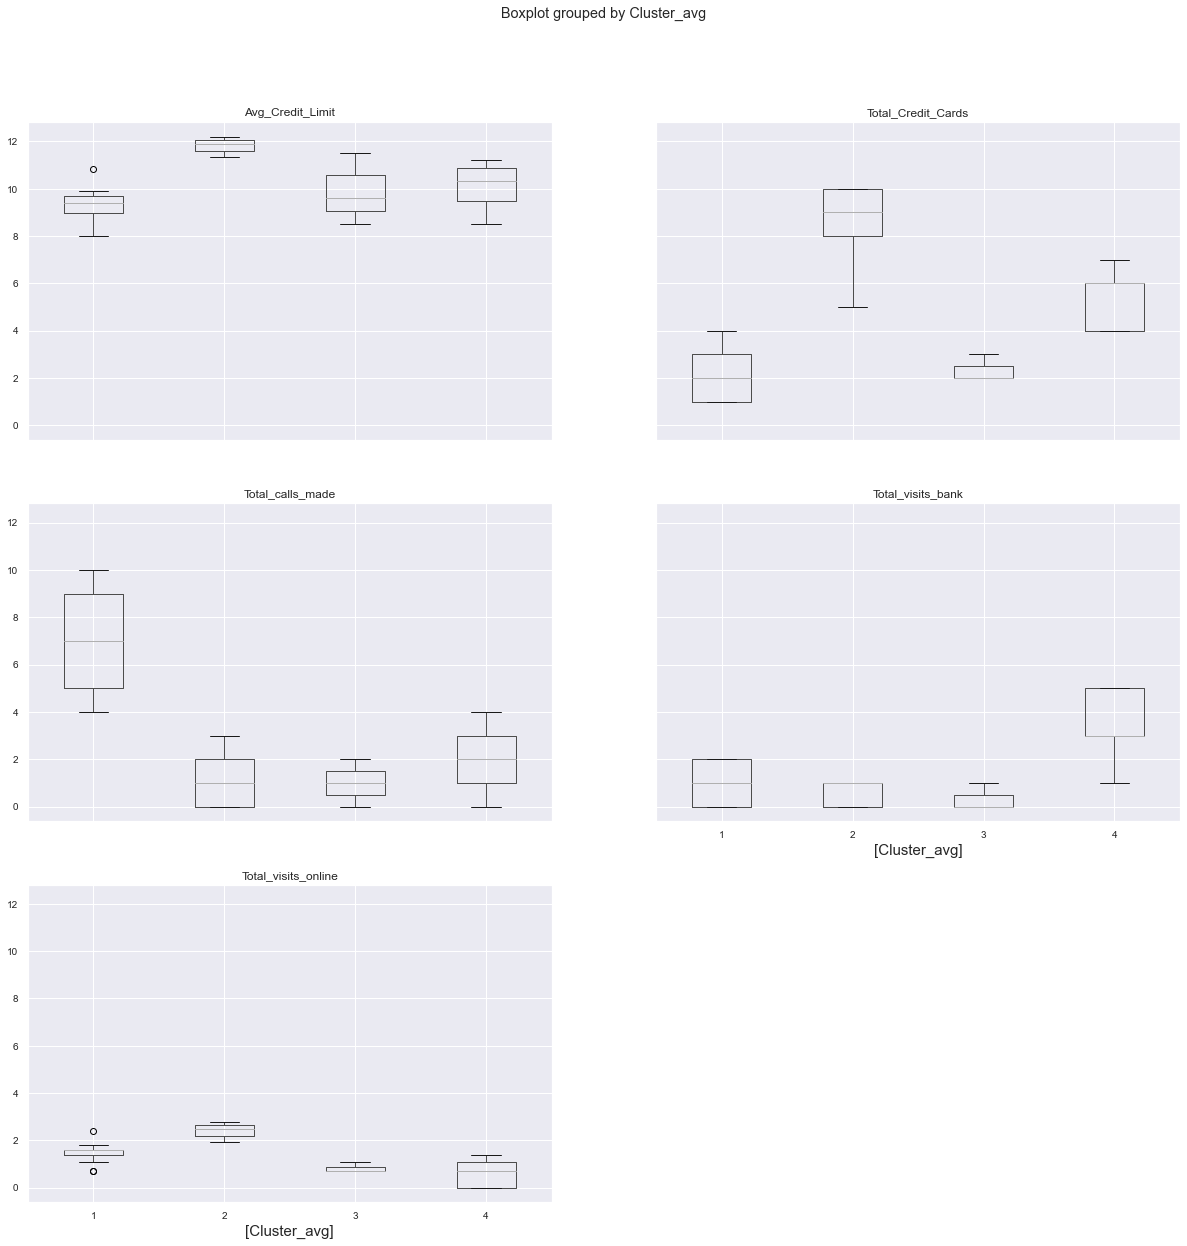

In [155]:
CCdata_hc_avg1.boxplot(by = 'Cluster_avg',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [156]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_avg1 = CCdata_hc_avg1.drop(['Cluster_avg'], axis=1)
CCdata_sil_hc_avg1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [157]:
silhouette_hc_avg1 = silhouette_score(CCdata_sil_hc_avg1 , clusters_avg_maxd, metric = 'euclidean')
silhouette_hc_avg1

0.39724615929033147

#### The Silhouette score with Heirarchical clustering , using method as 'average' , with 4 clusters selected using the distance parameter maxd = 5 , is 0.39724615 

In [158]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 4
Method = 'Average'
sil_score = silhouette_hc_avg1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters   Method  Silhoutte Score
1                 K Means                5      N/A         0.315121
2                 K Means                4      N/A         0.382751
3                 K Means                3      N/A         0.466021
4  Heirarchical Clustering               4  Average         0.397246

#### 4.2 Using method = Average again but trying with 3 clusters

#### Use number of clusters as criterion

In [159]:
from scipy.cluster.hierarchy import fcluster
k_avg = 3
clusters_avg_num_k1 = fcluster(Z_avg, k_avg, criterion='maxclust')
clusters_avg_num_k1

array([3, 1, 3, 3, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [160]:
len(clusters_avg_num_k1)

660

In [161]:
CCdata_hc_avg2 = CCdata_hc_avg # copying DF to create one DF for analysing with 4 clusters as suggessted by Distance threshold
CCdata_hc_avg2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_avg  
0               0.693147                 0            3  
1               2.397895                 9            1  
2               1.386294                 4            4  
3               0.693147                 4            4  
4               2.564949                 3            2  
..                   ...               ...          ...  
655             2.397895                 0            2  
656             2.639057                 2            2  
657             2.302585                 1            2  
658             2.772589                 0            2  
659             2.564949                 2            2  

[660 rows x 6 columns]

In [162]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on maxd , the distance threshold . Adding the 3 cluster labels to the CCdata_hc_avg2  DF

In [163]:
CCdata_hc_avg2['Cluster_avg'] = clusters_avg_num_k1.tolist()
CCdata_hc_avg2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_avg  
0               0.693147                 0            3  
1               2.397895                 9            1  
2               1.386294                 4            3  
3               0.693147                 4            3  
4               2.564949                 3            2  
..                   ...               ...          ...  
655             2.397895                 0            2  
656             2.639057                 2            2  
657             2.302585                 1            2  
658             2.772589                 0            2  
659             2.564949                 2            2  

[660 rows x 6 columns]

In [368]:
CCdata_hc_avg2_d = CCdata_hc_avg2.groupby(['Cluster_avg'])
CCdata_hc_avg2_d.describe()

Avg_Credit_Limit                                             \
                       count       mean       std        min        25%   
Cluster_avg                                                               
1                      222.0   9.320416  0.428162   8.006368   8.987197   
2                       50.0  11.825513  0.257247  11.338572  11.596736   
3                      388.0  10.146979  0.803584   8.517193   9.472705   

                                             Total_Credit_Cards           \
                   50%        75%        max              count     mean   
Cluster_avg                                                                
1             9.392662   9.680344  10.819778              222.0  2.40991   
2            11.887925  12.043501  12.206073               50.0  8.74000   
3            10.341742  10.858999  11.512925              388.0  5.50000   

                                                 Total_visits_bank            \
                  std  min  25%  50%   75%   max             count      mean   
Cluster_avg                                                                    
1            1.104696  1.0  1.0  2.0   3.0   4.0             222.0  0.941441   
2            1.274715  5.0  8.0  9.0  10.0  10.0              50.0  0.600000   
3            1.158052  2.0  4.0  6.0   6.0   7.0             388.0  3.471649   

                                               Total_visits_online            \
                  std  min  25%  50%  75%  max               count      mean   
Cluster_avg                                                                    
1            0.802256  0.0  0.0  1.0  2.0  2.0               222.0  1.483908   
2            0.494872  0.0  0.0  1.0  1.0  1.0                50.0  2.446572   
3            1.159934  0.0  2.0  3.0  5.0  5.0               388.0  0.579805   

                                                                         \
                  std       min       25%       50%       75%       max   
Cluster_avg                                                               
1            0.273809  0.693147  1.386294  1.609438  1.609438  2.397895   
2            0.250302  1.945910  2.197225  2.484907  2.639057  2.772589   
3            0.474246  0.000000  0.000000  0.693147  1.098612  1.386294   

            Total_calls_made                                                
                       count      mean       std  min  25%  50%  75%   max  
Cluster_avg                                                                 
1                      222.0  6.918919  1.931567  4.0  5.0  7.0  9.0  10.0  
2                       50.0  1.080000  0.876915  0.0  0.0  1.0  2.0   3.0  
3                      388.0  1.997423  1.427849  0.0  1.0  2.0  3.0   4.0

#### Box plot of clusters for Hierarchical clustering with method = average and choosing maxd distance threshold = 50 , giving 3 clusters

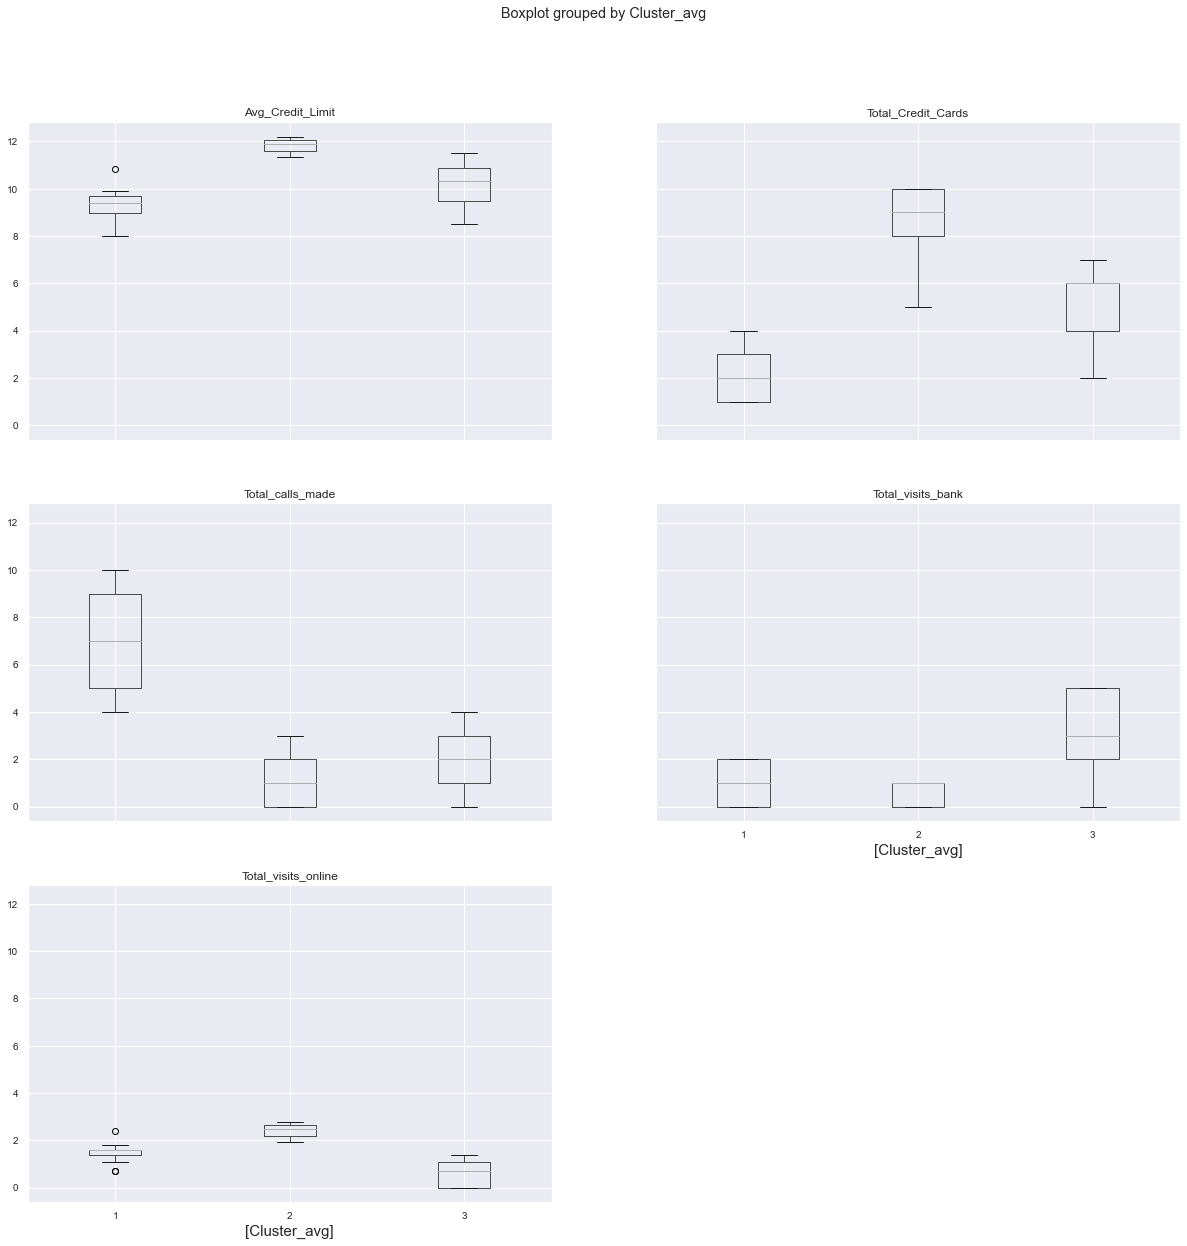

In [367]:
CCdata_hc_avg2.boxplot(by = 'Cluster_avg',  layout=(3,2),  figsize=(20, 20))
plt.savefig('H_clustering_Avg_3_Clusters_BoxP')

###  Analysis of Box plots , with Hierarchical clustering , with Average method and 3 clusters , based on maxd threshold

#### 1> Avg_Credit_Limit :
    a) Cluster 2 (second cluster) has the max median value , followed by Clusters 3 and 1 . 
    b) Outliers data in cluster 1 , beyond the higher 1.5 IQR whisker limit.
    c) As shown by length of the boxes , the interquartile ranges show different dispersion in Clusters. The dispersion 
        is maximum for Cluster 3, followed by Clusters 1 & 2. Cluster 2 has the minimum dispersion .
    d) Based on the box plot whiskers , the overall range of data is highest for Cluster 3, followed by Clusters 1 
        and 2. 
    d) Considering X-axis starting from 0, all the Clusters  show left skewness. 
    e) All Clusters are within the normalized range of between 8 and 12.5. Hence all Clusters are in a group and not 
        spread out in a large range .
        
#### 2> Total_Credit_Cards :
    a) Cluster 2 has the max median value , followed by Clusters 3 and 1. This resembles the behaviour for median 
        values, for Avg_Credit_Limit
    b) No outliers data in any Clusters
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Clusters 1 , 2 & 3. 
    d) For Cluster 1, 25% and min are same . For Cluster 2 , 75% and max are the same values. For Cluster 3 , 
        median and 75% values are same.
    e) Based on the box plot whiskers , the overall range of data is similar for Cluster 2 & 3 .
    d) Considering X-axis starting from 0,  Cluster 1 & 2 , shows much less skewness. Cluster 3 shows high left side 
        skewness, since 75% and median 50% values coincide. 
    
#### 3> Total_Calls_made :
    a) Cluster 1 has the max mediam value , followed by Clusters 2 and 1. 
    b) No outliers data in any Custers
    c) As shown by length of the boxes , the interquartile ranges show similar dispersion in Cluster 2 & 3. Cluster 1 
        has maximum disperion of data. . 
    d) For Cluster 2 , it is seen that the whiskers is extending to only one side. The 25% & min values are same.
    e) Based on the box plot whiskers , the overall range of data is highest for Cluster 1 , followed by 
        Clusters 2 and 1.
    d) Considering X-axis starting from 0, all Clusters shows much less skewness. 
    
#### 4> Total_visits_bank :
    a) Cluster 2 has the max mediam value , followed by Clusters  1 and 2. 
    b) No outliers data in any Custers
    c) As shown by length of the boxes , the interquartile ranges show max dispersion in Cluster 2 , followed by 
        Clusters  1 and 2.
    d) No wiskers seen for clusters 1 & 2. This implies that no data in the between min & 25% quartile (both same) , as well 
        as no data in the max and 75% quartile range (both same values).
    e) For cluster 3, max and 75% data coincide. 
    f) Based on the box plot whiskers , the overall range of data is highest for Cluster 3.
    g) Considering X-axis starting from 0, Cluster 2 shows high left skeweness , and Cluster 3 shows right side skewness.
    
#### 5> Total_visits_online :
    a) Cluster 2 has the max mediam value, followed by Clusters 1 & 3.
    b) Outliers data is present in Clusters 1.
    c) As shown by length of the boxes , the interquartile ranges show max dispersion in Cluster 3 , followed by Clusters
        2 and 1. 
    d) For cluster 3, it is seen that the whiskers is extending to only one side.The 25% & min values are same .
    e) Based on the box plot whiskers , the overall range of data is highest for Cluster 3.
    h) Considering X-axis starting from 0, the Clusters 2 & 3  , shows left sided skewness. Cluster 1 shows higher 
        left sided skewness , given median and 75% values coincide.


### Silhouette score 

In [165]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_avg2 = CCdata_hc_avg2.drop(['Cluster_avg'], axis=1)
CCdata_sil_hc_avg2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [166]:
silhouette_hc_avg2 = silhouette_score(CCdata_sil_hc_avg2 , clusters_avg_num_k1, metric = 'euclidean')
silhouette_hc_avg2

0.4651714862234125

#### The Silhouette score with Heirarchical clustering , using method as 'average' , with 3 clusters selected using the k = 3 , is 0.46517149

In [167]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 3
Method = 'Average'
sil_score = silhouette_hc_avg2

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters   Method  Silhoutte Score
1                 K Means                5      N/A         0.315121
2                 K Means                4      N/A         0.382751
3                 K Means                3      N/A         0.466021
4  Heirarchical Clustering               4  Average         0.397246
5  Heirarchical Clustering               3  Average         0.465171

#### 4.2 Using method = single

In [168]:
CCdata_hc_single1= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_single1 # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [169]:
Z_single1 = linkage(CCdata_hc_single1, metric='euclidean', method='single')
c_single1, coph_dists_single1 = cophenet(Z_single1 , pdist(CCdata_hc_single1))

c_single1

0.37803218390150495

In [170]:
# Print just the cophenetic coorelation distances
coph_dists_single1 = cophenet(Z_single1 )
coph_dists_single1

array([2.38034177, 2.38034177, 2.38034177, ..., 1.01287945, 1.01172379,
       1.01287945])

In [171]:
# Print the cophenetic correlation coefficient , plus the distances 
c_single1 =  cophenet(Z_single1, pdist(CCdata_hc_single1))
c_single1

(0.37803218390150495,
 array([2.38034177, 2.38034177, 2.38034177, ..., 1.01287945, 1.01172379,
        1.01287945]))

#### The cophenetic corrleation coefficient is 0.378032 , which is low score 

#### Drawing Dendrogram

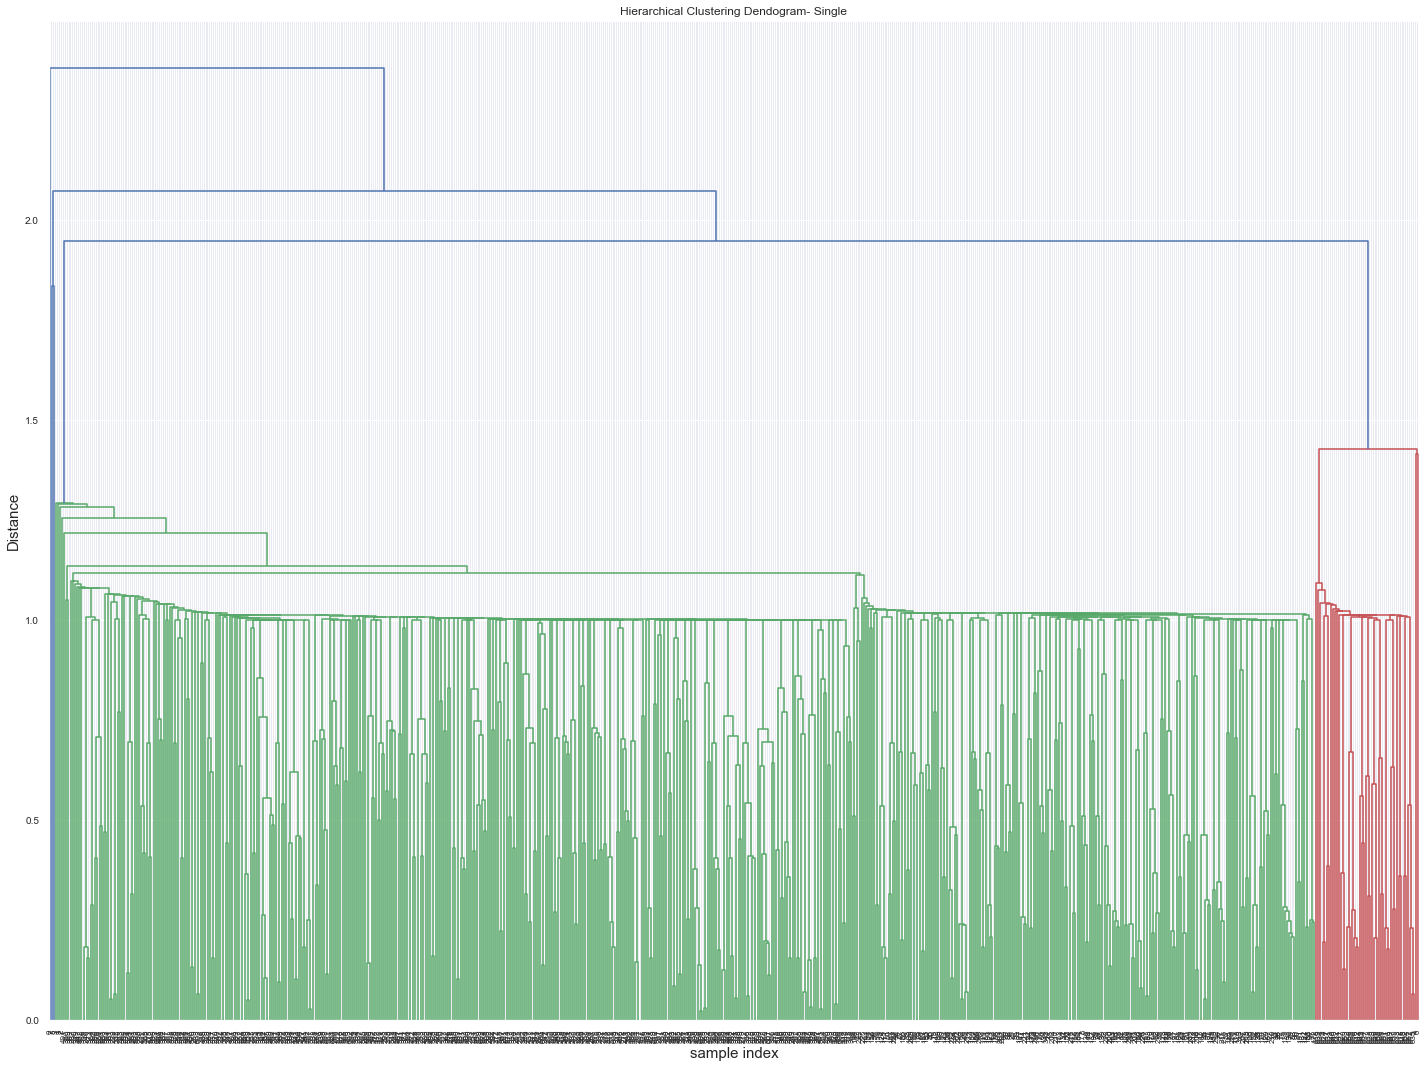

In [172]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- Single')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_single1, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [85.0, 85.0, 95.0, 95.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [210.0, 210.0, 240.0, 240.0],
  [180.0, 180.0, 225.0, 225.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [300.0, 300.0, 330.0, 330.0],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.0],
  [380.0, 380.0, 400.0, 400.0],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [452.5, 452.5, 482.5, 482.5],
  [435.0, 435.0, 467.5, 467.5],
  [535.0, 535.0, 545.0, 545.0],
  [525.0, 525.0, 540.0, 540.0],
  [565.0, 565.0, 575.0, 575.0],
  [605.0, 605.0, 615.0, 615.0],
  [635.0, 635.0, 645.0, 645.0],
  [625

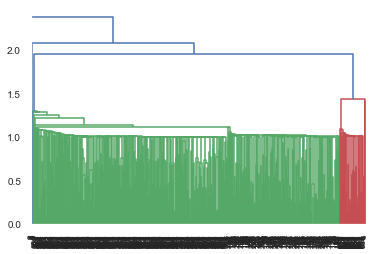

In [173]:
# Print the result Dict values
dgram_single1 = dendrogram(Z_single1, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_single1

In [174]:
# Print the list of labels 
labels_dgram_single1 = dgram_single1['ivl']
labels_dgram_single1

['0',
 '7',
 '8',
 '3',
 '1',
 '9',
 '2',
 '491',
 '350',
 '359',
 '363',
 '237',
 '390',
 '349',
 '447',
 '462',
 '310',
 '395',
 '246',
 '373',
 '384',
 '392',
 '260',
 '276',
 '286',
 '391',
 '580',
 '593',
 '354',
 '381',
 '393',
 '239',
 '352',
 '245',
 '263',
 '382',
 '259',
 '234',
 '374',
 '305',
 '581',
 '499',
 '533',
 '558',
 '230',
 '411',
 '589',
 '465',
 '475',
 '542',
 '599',
 '323',
 '601',
 '446',
 '598',
 '387',
 '307',
 '367',
 '303',
 '535',
 '278',
 '329',
 '256',
 '244',
 '312',
 '298',
 '365',
 '561',
 '436',
 '570',
 '269',
 '433',
 '603',
 '316',
 '488',
 '379',
 '229',
 '380',
 '271',
 '337',
 '270',
 '240',
 '397',
 '334',
 '385',
 '265',
 '345',
 '477',
 '301',
 '236',
 '353',
 '277',
 '252',
 '324',
 '550',
 '549',
 '559',
 '317',
 '285',
 '355',
 '534',
 '318',
 '364',
 '342',
 '257',
 '295',
 '369',
 '460',
 '584',
 '241',
 '308',
 '389',
 '255',
 '274',
 '289',
 '309',
 '294',
 '299',
 '431',
 '443',
 '456',
 '506',
 '427',
 '541',
 '489',
 '487',
 '597'

In [175]:
colors_dgram_single1 = dgram_single1['color_list']
colors_dgram_single1
# print unique colors
x_single1 = np.array(colors_dgram_single1)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_single1), '\033[0m')

Cluster colors are : ['b' 'g' 'r'] 


#### Color code indicates 3 suggessted clusters formed when using 'Single' linkage method

#### Using Distance measure to truncate the clusters into managable numbers

In [176]:
max_d_single1 = 2

In [177]:
from scipy.cluster.hierarchy import fcluster
clusters_single_maxd1 = fcluster(Z_single1, max_d_single1, criterion='distance')
clusters_single_maxd1

array([3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

#### We get 3 clusters using the maxd distance threshold criteria

In [178]:
len(clusters_single_maxd1)

660

#### Can also use number of clusters as criterion, with K = 3 clusters

In [179]:
k_single1 = 3
clusters_single_num_k1 = fcluster(Z_single1, k_single1, criterion='maxclust')
clusters_single_num_k1

array([3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [180]:
len(clusters_single_num_k1)

660

In [181]:
CCdata_hc_single1_1 = CCdata_hc_single1 # copying DF to create one DF for analysing 
CCdata_hc_single1_1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [182]:
# single1.drop(['Cluster_single'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k=3 . Adding the 3 cluster labels to the CCdata_hc_single1  DF

In [183]:
CCdata_hc_single1_1['Cluster_single'] = clusters_single_num_k1.tolist()
CCdata_hc_single1_1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_single  
0               0.693147                 0               3  
1               2.397895                 9               2  
2               1.386294                 4               2  
3               0.693147                 4               2  
4               2.564949                 3               2  
..                   ...               ...             ...  
655             2.397895                 0               2  
656             2.639057                 2               2  
657             2.302585                 1               2  
658             2.772589                 0               2  
659             2.564949                 2               2  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method = single and choosingk=3 , giving 3 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B4D20188>,
      dtype=object)

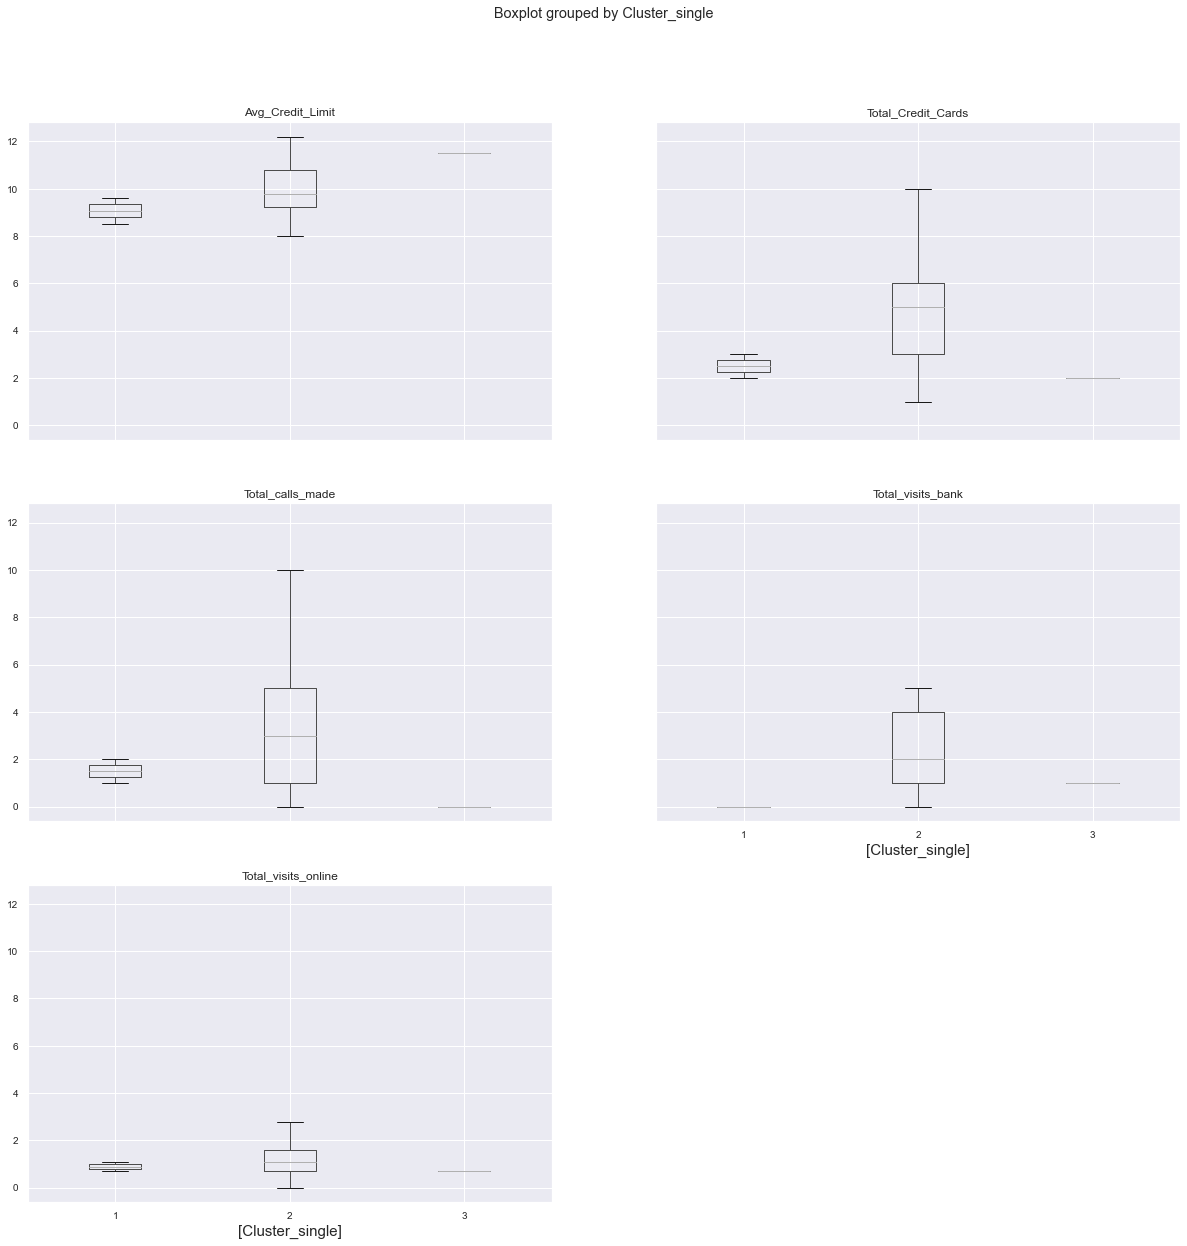

In [184]:
CCdata_hc_single1_1.boxplot(by = 'Cluster_single',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [185]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_single1_1 = CCdata_hc_single1_1.drop(['Cluster_single'], axis=1)
CCdata_sil_hc_single1_1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [186]:
silhouette_hc_single1_1 = silhouette_score(CCdata_sil_hc_single1_1 , clusters_single_num_k1, metric = 'euclidean')
silhouette_hc_single1_1

0.029621919658715978

#### The Silhouette score with Heirarchical clustering , using method as 'single' , with 3 clusters selected using the k= 3 , is 0.02962191966 . This is very low score , indicating poor Clustering 

In [187]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 3
Method = 'Single'
sil_score = silhouette_hc_single1_1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters   Method  Silhoutte Score
1                 K Means                5      N/A         0.315121
2                 K Means                4      N/A         0.382751
3                 K Means                3      N/A         0.466021
4  Heirarchical Clustering               4  Average         0.397246
5  Heirarchical Clustering               3  Average         0.465171
6  Heirarchical Clustering               3   Single         0.029622

#### 4.4 Using method = single again

In [188]:
CCdata_hc_single= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_single # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [189]:
Z_single = linkage(CCdata_hc_single, metric='euclidean', method='single')
c_single, coph_dists_single = cophenet(Z_single , pdist(CCdata_hc_single))

c_single

0.37803218390150495

In [190]:
# Print just the cophenetic coorelation distances
coph_dists_single = cophenet(Z_single )
coph_dists_single

array([2.38034177, 2.38034177, 2.38034177, ..., 1.01287945, 1.01172379,
       1.01287945])

In [191]:
# Print the cophenetic correlation coefficient , plus the distances 
c_single1 =  cophenet(Z_single, pdist(CCdata_hc_single))
c_single1

(0.37803218390150495,
 array([2.38034177, 2.38034177, 2.38034177, ..., 1.01287945, 1.01172379,
        1.01287945]))

#### The cophenetic corrleation coefficient is 0.378032 , which is low score 

#### Drawing Dendrogram

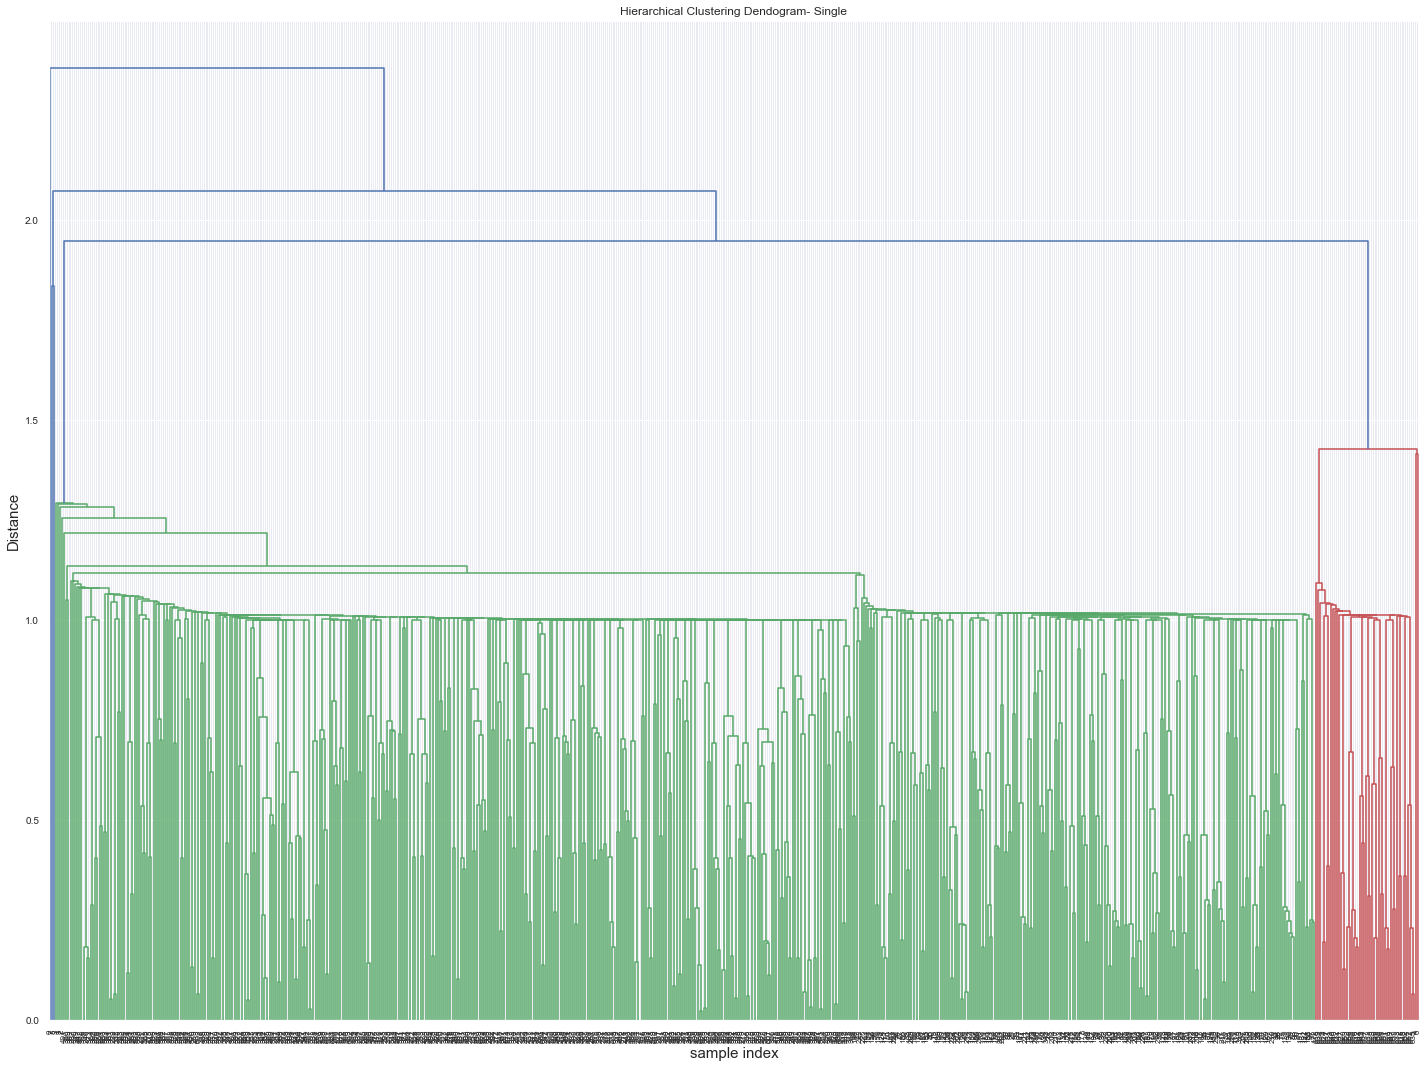

In [192]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- Single')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_single, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [85.0, 85.0, 95.0, 95.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [210.0, 210.0, 240.0, 240.0],
  [180.0, 180.0, 225.0, 225.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [300.0, 300.0, 330.0, 330.0],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.0],
  [380.0, 380.0, 400.0, 400.0],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [452.5, 452.5, 482.5, 482.5],
  [435.0, 435.0, 467.5, 467.5],
  [535.0, 535.0, 545.0, 545.0],
  [525.0, 525.0, 540.0, 540.0],
  [565.0, 565.0, 575.0, 575.0],
  [605.0, 605.0, 615.0, 615.0],
  [635.0, 635.0, 645.0, 645.0],
  [625

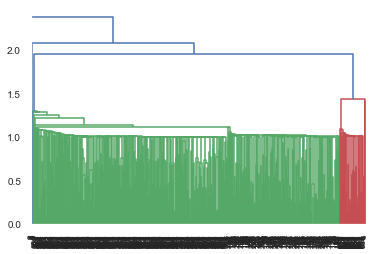

In [193]:
# Print the result Dict values
dgram_single = dendrogram(Z_single, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_single

In [194]:
# Print the list of labels 
labels_dgram_single = dgram_single['ivl']
labels_dgram_single

['0',
 '7',
 '8',
 '3',
 '1',
 '9',
 '2',
 '491',
 '350',
 '359',
 '363',
 '237',
 '390',
 '349',
 '447',
 '462',
 '310',
 '395',
 '246',
 '373',
 '384',
 '392',
 '260',
 '276',
 '286',
 '391',
 '580',
 '593',
 '354',
 '381',
 '393',
 '239',
 '352',
 '245',
 '263',
 '382',
 '259',
 '234',
 '374',
 '305',
 '581',
 '499',
 '533',
 '558',
 '230',
 '411',
 '589',
 '465',
 '475',
 '542',
 '599',
 '323',
 '601',
 '446',
 '598',
 '387',
 '307',
 '367',
 '303',
 '535',
 '278',
 '329',
 '256',
 '244',
 '312',
 '298',
 '365',
 '561',
 '436',
 '570',
 '269',
 '433',
 '603',
 '316',
 '488',
 '379',
 '229',
 '380',
 '271',
 '337',
 '270',
 '240',
 '397',
 '334',
 '385',
 '265',
 '345',
 '477',
 '301',
 '236',
 '353',
 '277',
 '252',
 '324',
 '550',
 '549',
 '559',
 '317',
 '285',
 '355',
 '534',
 '318',
 '364',
 '342',
 '257',
 '295',
 '369',
 '460',
 '584',
 '241',
 '308',
 '389',
 '255',
 '274',
 '289',
 '309',
 '294',
 '299',
 '431',
 '443',
 '456',
 '506',
 '427',
 '541',
 '489',
 '487',
 '597'

In [195]:
colors_dgram_single = dgram_single['color_list']
colors_dgram_single
# print unique colors
x_single = np.array(colors_dgram_single)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_single), '\033[0m')

Cluster colors are : ['b' 'g' 'r'] 


#### Color code indicates 3 suggessted clusters formed when using 'Single' linkage method

#### Using Distance measure to truncate the clusters into managable numbers

In [196]:
max_d_single = 2

In [197]:
from scipy.cluster.hierarchy import fcluster
clusters_single_maxd = fcluster(Z_single, max_d_single, criterion='distance')
clusters_single_maxd

array([3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

#### We get 3 clusters using the maxd distance threshold criteria

In [198]:
len(clusters_single_maxd)

660

#### Can also use number of clusters as criterion, with K = 4 clusters

In [199]:
k_single = 4
clusters_single_num_k = fcluster(Z_single, k_single, criterion='maxclust')
clusters_single_num_k

array([4, 2, 2, 2, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [200]:
len(clusters_single_num_k)

660

In [201]:
CCdata_hc_single1 = CCdata_hc_single # copying DF to create one DF for analysing 
CCdata_hc_single1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [202]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k=4 . Adding the 4 cluster labels to the CCdata_hc_single1  DF

In [203]:
CCdata_hc_single1['Cluster_single'] = clusters_single_num_k.tolist()
CCdata_hc_single1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_single  
0               0.693147                 0               4  
1               2.397895                 9               2  
2               1.386294                 4               2  
3               0.693147                 4               2  
4               2.564949                 3               3  
..                   ...               ...             ...  
655             2.397895                 0               3  
656             2.639057                 2               3  
657             2.302585                 1               3  
658             2.772589                 0               3  
659             2.564949                 2               3  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method = single and choosingk=3 , giving 3 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B463E1C8>,
      dtype=object)

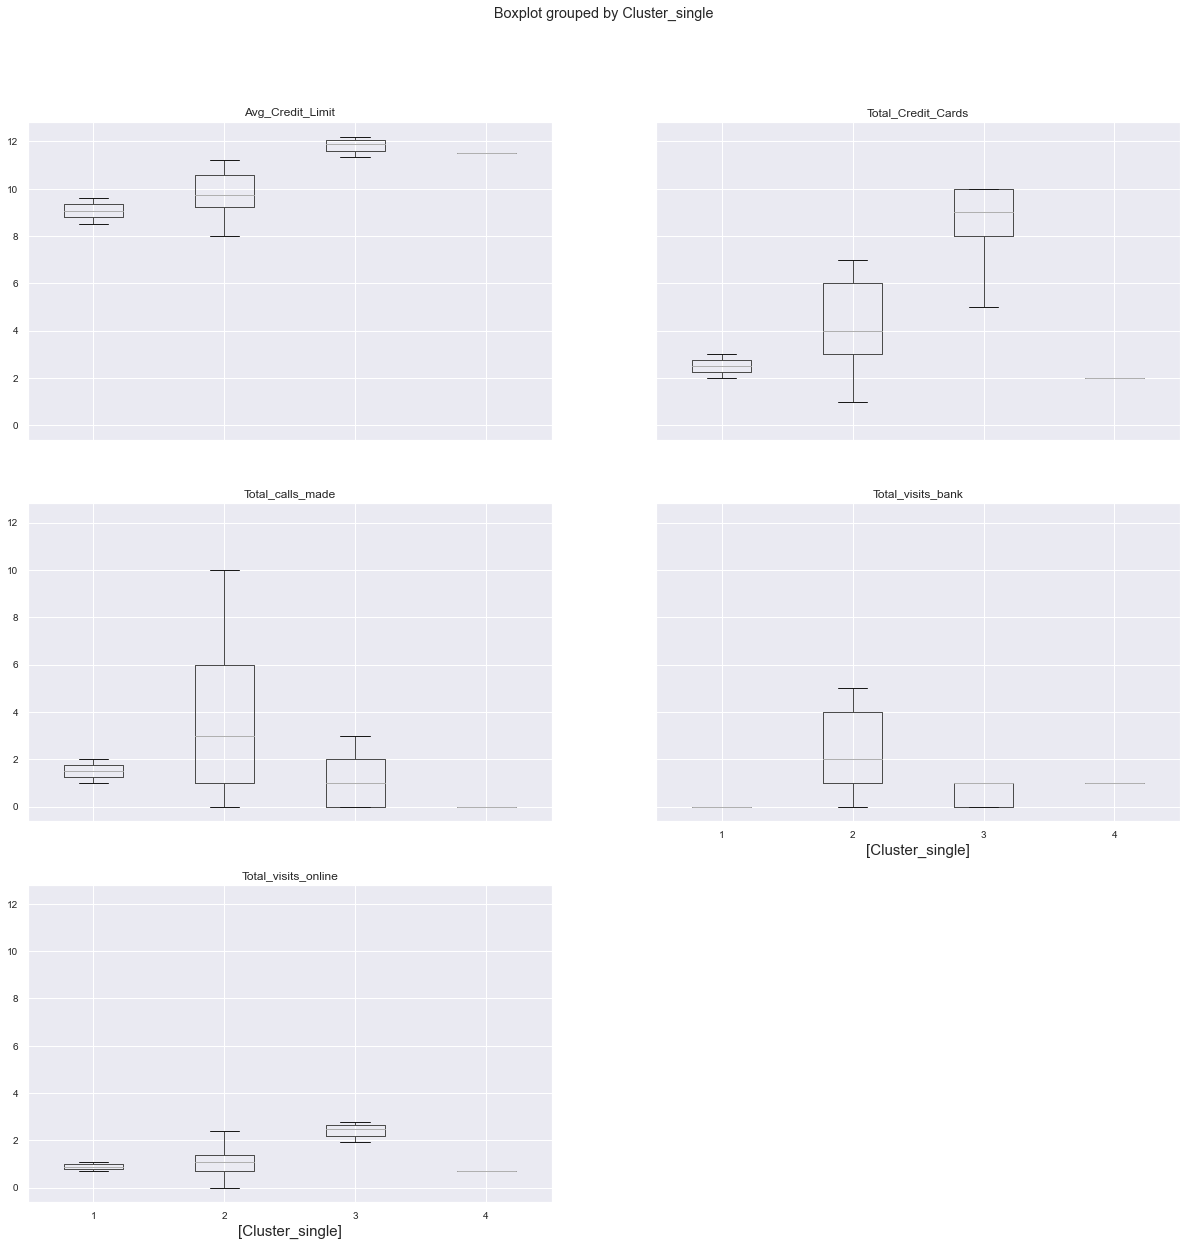

In [204]:
CCdata_hc_single1.boxplot(by = 'Cluster_single',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [205]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_single1 = CCdata_hc_single1.drop(['Cluster_single'], axis=1)
CCdata_sil_hc_single1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [206]:
silhouette_hc_single1 = silhouette_score(CCdata_sil_hc_single1 , clusters_single_num_k, metric = 'euclidean')
silhouette_hc_single1

0.0712270642881997

#### The Silhouette score with Heirarchical clustering , using method as 'single' , with 4 clusters selected using the k= 4 , is 0.0712271 . This is very low score , indicating poor Clustering 

In [207]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 4
Method = 'Single'
sil_score = silhouette_hc_single1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters   Method  Silhoutte Score
1                 K Means                5      N/A         0.315121
2                 K Means                4      N/A         0.382751
3                 K Means                3      N/A         0.466021
4  Heirarchical Clustering               4  Average         0.397246
5  Heirarchical Clustering               3  Average         0.465171
6  Heirarchical Clustering               3   Single         0.029622
7  Heirarchical Clustering               4   Single         0.071227

#### 4.3 Using method =  complete

In [208]:
CCdata_hc_complete= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_complete # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [209]:
Z_complete = linkage(CCdata_hc_complete, metric='euclidean', method='complete')
c_complete, coph_dists_complete = cophenet(Z_complete , pdist(CCdata_hc_complete))

c_complete

0.7701731219847429

In [210]:
# Print just the cophenetic coorelation distances
coph_dists_complete = cophenet(Z_complete )
coph_dists_complete

array([14.09296296,  7.87524052, 14.09296296, ...,  5.51152217,
        5.51152217,  2.57827084])

In [211]:
# Print the cophenetic correlation coefficient , plus the distances 
c_complete1 =  cophenet(Z_complete, pdist(CCdata_hc_complete))
c_complete1

(0.7701731219847429,
 array([14.09296296,  7.87524052, 14.09296296, ...,  5.51152217,
         5.51152217,  2.57827084]))

#### The cophenetic corrleation coefficient is 0.77017312 , which is an OK score 

#### Drawing Dendrogram

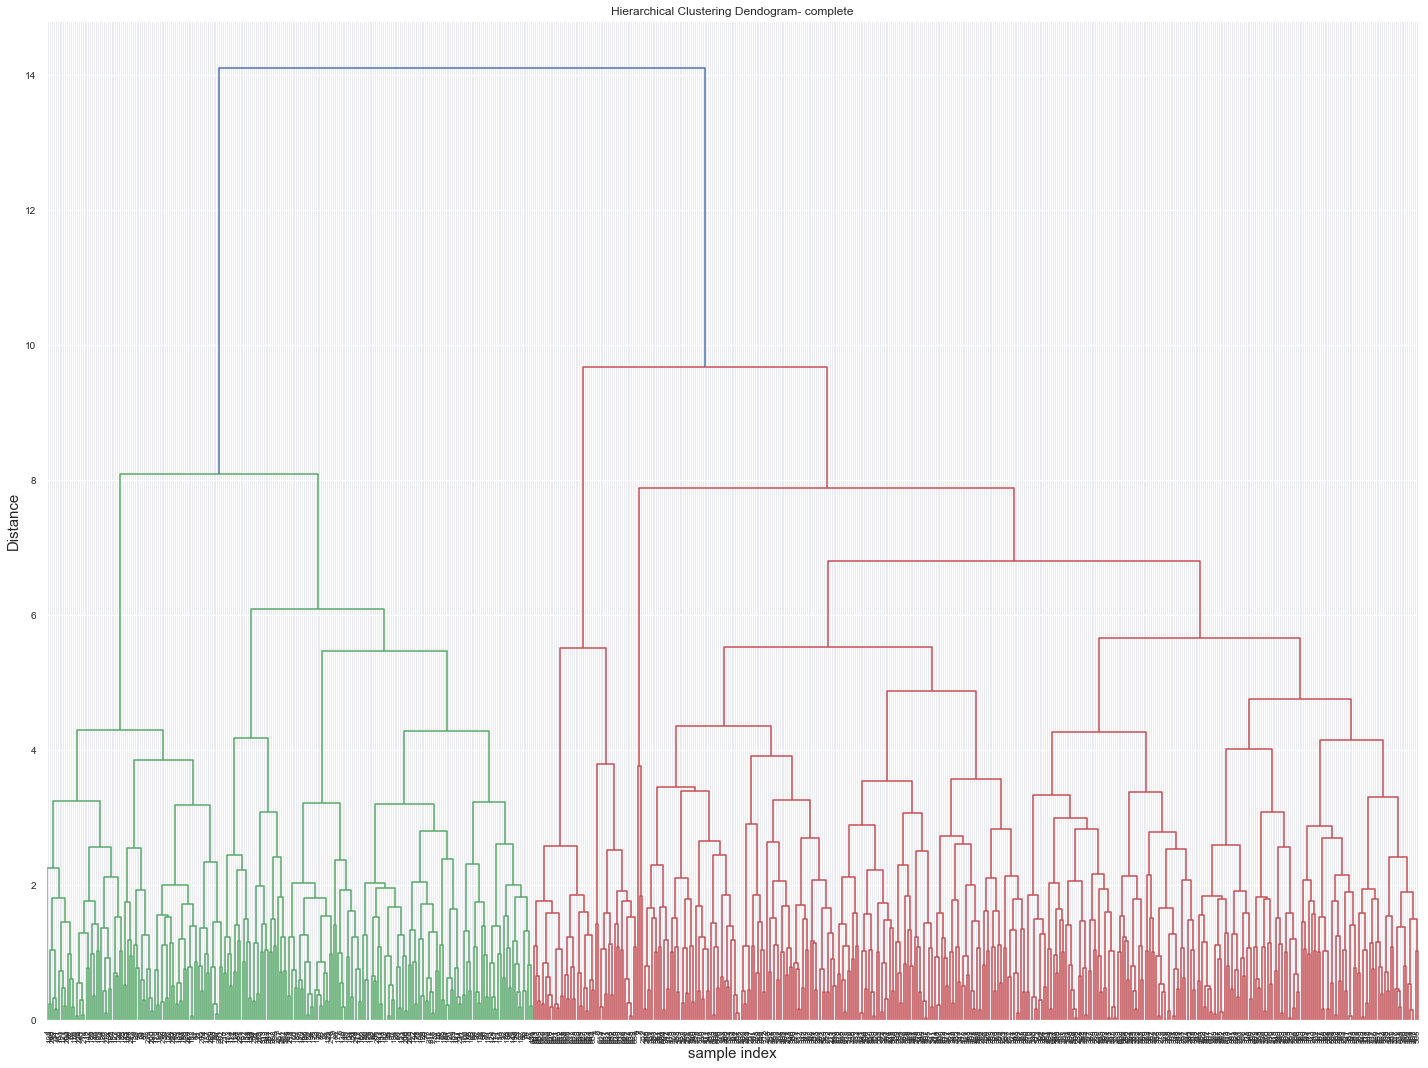

In [212]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- complete')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_complete, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [73.75, 73.75, 113.75, 113.75],
  [31.25, 31.25, 93.75, 93.75],
  [5.0, 5.0, 62.5, 62.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [195.0, 195.0, 205.0, 205.0],
  [161.25, 161.25, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [180.625, 180.625, 236.25, 236.25],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [282.5, 282.5, 310.0, 310.0],
  [265.0, 265.0, 296.25, 296.25],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365

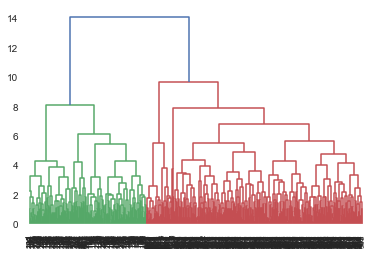

In [213]:
# Print the result Dict values
dgram_complete = dendrogram(Z_complete, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_complete

In [214]:
# Print the list of labels 
labels_dgram_complete = dgram_complete['ivl']
labels_dgram_complete

['1',
 '105',
 '146',
 '208',
 '54',
 '111',
 '181',
 '190',
 '121',
 '163',
 '200',
 '26',
 '53',
 '119',
 '59',
 '126',
 '224',
 '45',
 '214',
 '19',
 '142',
 '109',
 '89',
 '144',
 '40',
 '199',
 '154',
 '38',
 '112',
 '222',
 '34',
 '102',
 '150',
 '127',
 '158',
 '36',
 '133',
 '68',
 '148',
 '104',
 '27',
 '223',
 '139',
 '25',
 '91',
 '78',
 '24',
 '57',
 '32',
 '213',
 '160',
 '220',
 '170',
 '173',
 '195',
 '52',
 '219',
 '80',
 '187',
 '39',
 '193',
 '227',
 '98',
 '138',
 '101',
 '168',
 '88',
 '123',
 '226',
 '157',
 '183',
 '12',
 '61',
 '21',
 '15',
 '203',
 '74',
 '137',
 '196',
 '209',
 '165',
 '50',
 '64',
 '201',
 '202',
 '10',
 '217',
 '153',
 '114',
 '132',
 '113',
 '128',
 '87',
 '225',
 '131',
 '192',
 '184',
 '145',
 '185',
 '42',
 '207',
 '44',
 '110',
 '288',
 '313',
 '242',
 '343',
 '261',
 '377',
 '292',
 '390',
 '3',
 '457',
 '591',
 '482',
 '594',
 '169',
 '218',
 '174',
 '60',
 '134',
 '67',
 '120',
 '167',
 '108',
 '49',
 '152',
 '96',
 '135',
 '73',
 '13

In [215]:
colors_dgram_complete = dgram_complete['color_list']
colors_dgram_complete
# print unique colors
x_complete = np.array(colors_dgram_complete)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_complete), '\033[0m')

Cluster colors are : ['b' 'g' 'r'] 


#### Color code indicates 3 suggested clusters formed when using 'complete' linkage method

#### Using Distance measure to truncate the clusters into managable numbers

In [216]:
max_d_complete = 9

In [217]:
from scipy.cluster.hierarchy import fcluster
clusters_complete_maxd = fcluster(Z_complete, max_d_complete, criterion='distance')
clusters_complete_maxd

array([3, 1, 3, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,

#### We get 3 clusters using the maxd distance threshold criteria

In [218]:
len(clusters_complete_maxd)

660

#### Can also use number of clusters as criterion, with K = 3 clusters

In [219]:
k_complete = 3
clusters_complete_num_k = fcluster(Z_complete, k_complete, criterion='maxclust')
clusters_complete_num_k

array([3, 1, 3, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,

In [220]:
len(clusters_complete_num_k)

660

In [221]:
CCdata_hc_complete1 = CCdata_hc_complete # copying DF to create one DF for analysing 
CCdata_hc_complete1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [222]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on maxd = 9 . Adding the 3 cluster labels to the CCdata_hc_complete1  DF

In [223]:
#CCdata_hc_complete1.drop(['Cluster_complete'], axis=1, inplace=True)

In [224]:
CCdata_hc_complete1['Cluster_complete'] = clusters_complete_maxd.tolist()
CCdata_hc_complete1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_complete  
0               0.693147                 0                 3  
1               2.397895                 9                 1  
2               1.386294                 4                 3  
3               0.693147                 4                 1  
4               2.564949                 3                 2  
..                   ...               ...               ...  
655             2.397895                 0                 2  
656             2.639057                 2                 2  
657             2.302585                 1                 2  
658             2.772589                 0                 2  
659             2.564949                 2                 2  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =complete and choosing maxd=9 , giving 3 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B34A4508>,
      dtype=object)

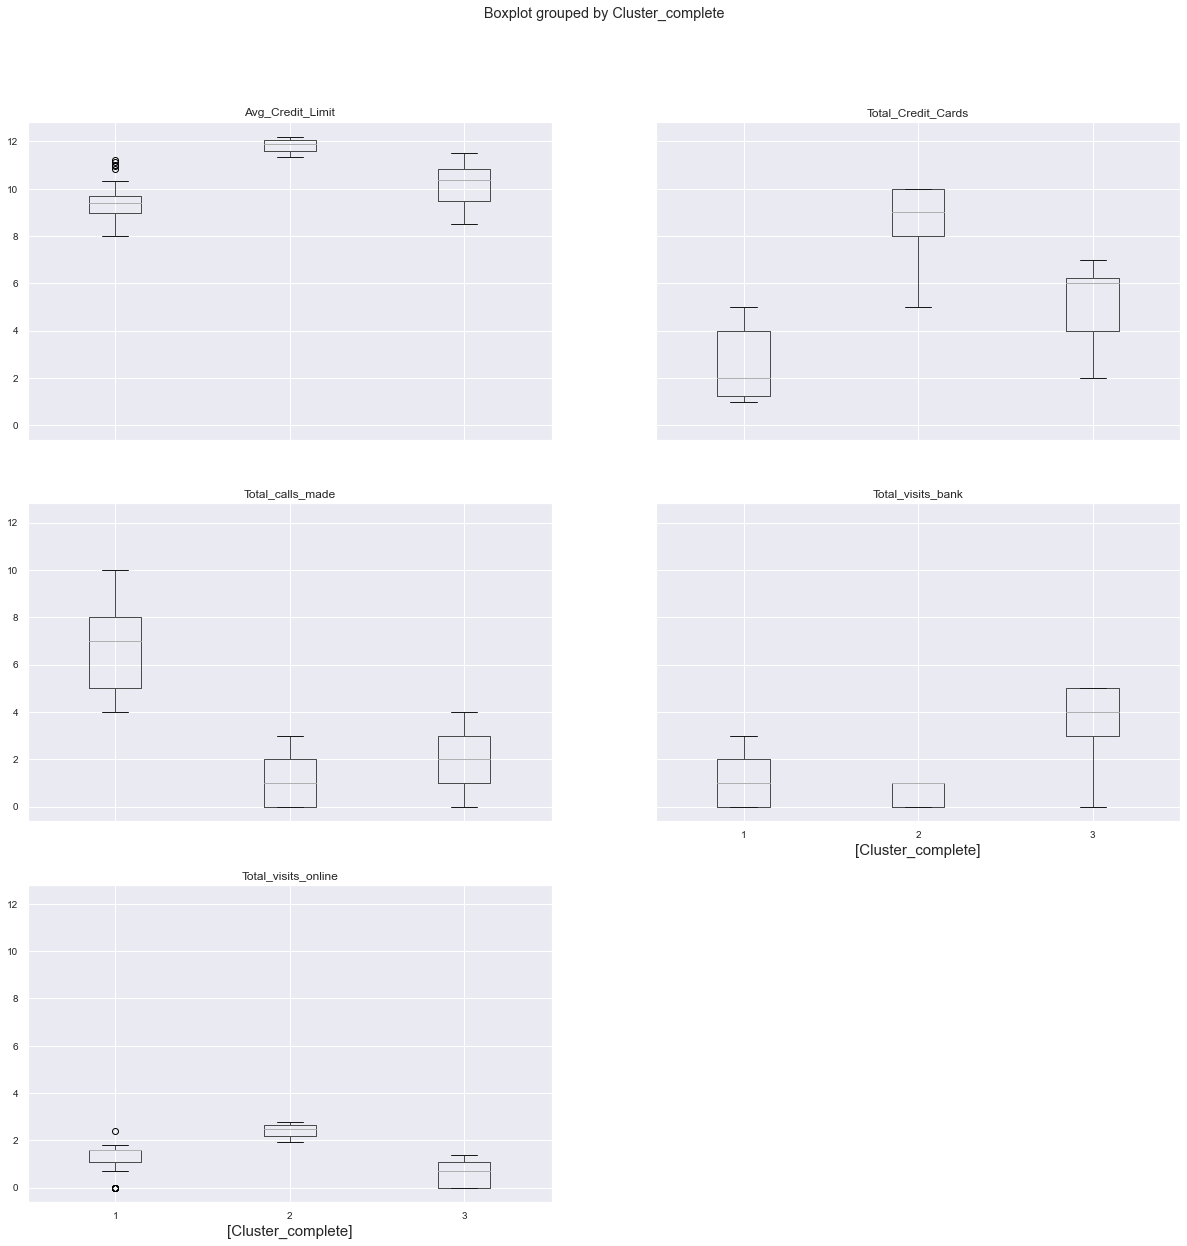

In [225]:
CCdata_hc_complete1.boxplot(by = 'Cluster_complete',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [226]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_complete1 = CCdata_hc_complete1.drop(['Cluster_complete'], axis=1)
CCdata_sil_hc_complete1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [227]:
silhouette_hc_complete1 = silhouette_score(CCdata_sil_hc_complete1 , clusters_complete_maxd, metric = 'euclidean')
silhouette_hc_complete1

0.4552292916810705

#### The Silhouette score with Heirarchical clustering , using method as 'complete' , with 3 clusters selected using the maxd=9 , is 0.4552293 . This is also a  low score , indicating poor Clustering 

In [228]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 3
Method = 'Complete'
sil_score = silhouette_hc_complete1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                 K Means                5       N/A         0.315121
2                 K Means                4       N/A         0.382751
3                 K Means                3       N/A         0.466021
4  Heirarchical Clustering               4   Average         0.397246
5  Heirarchical Clustering               3   Average         0.465171
6  Heirarchical Clustering               3    Single         0.029622
7  Heirarchical Clustering               4    Single         0.071227
8  Heirarchical Clustering               3  Complete         0.455229

#### 4.5 Trying with 'Complete' method , with 4 clusters

In [229]:
k_complete1 = 4
clusters_complete_num_k1 = fcluster(Z_complete, k_complete1, criterion='maxclust')
clusters_complete_num_k1

array([4, 1, 4, 2, 3, 2, 3, 4, 4, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,

In [230]:
len(clusters_complete_num_k1)

660

In [231]:
CCdata_hc_complete2 = CCdata_hc_complete # copying DF to create one DF for analysing 
CCdata_hc_complete2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_complete  
0               0.693147                 0                 3  
1               2.397895                 9                 1  
2               1.386294                 4                 3  
3               0.693147                 4                 1  
4               2.564949                 3                 2  
..                   ...               ...               ...  
655             2.397895                 0                 2  
656             2.639057                 2                 2  
657             2.302585                 1                 2  
658             2.772589                 0                 2  
659             2.564949                 2                 2  

[660 rows x 6 columns]

In [232]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k = 4 . Adding the 4 cluster labels to the CCdata_hc_complete2  DF

In [233]:
#CCdata_hc_complete1.drop(['Cluster_complete'], axis=1, inplace=True)

In [234]:
CCdata_hc_complete2['Cluster_complete'] = clusters_complete_num_k1.tolist()
CCdata_hc_complete2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_complete  
0               0.693147                 0                 4  
1               2.397895                 9                 1  
2               1.386294                 4                 4  
3               0.693147                 4                 2  
4               2.564949                 3                 3  
..                   ...               ...               ...  
655             2.397895                 0                 3  
656             2.639057                 2                 3  
657             2.302585                 1                 3  
658             2.772589                 0                 3  
659             2.564949                 2                 3  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =complete and choosing k=4 , giving 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B5F2DE08>,
      dtype=object)

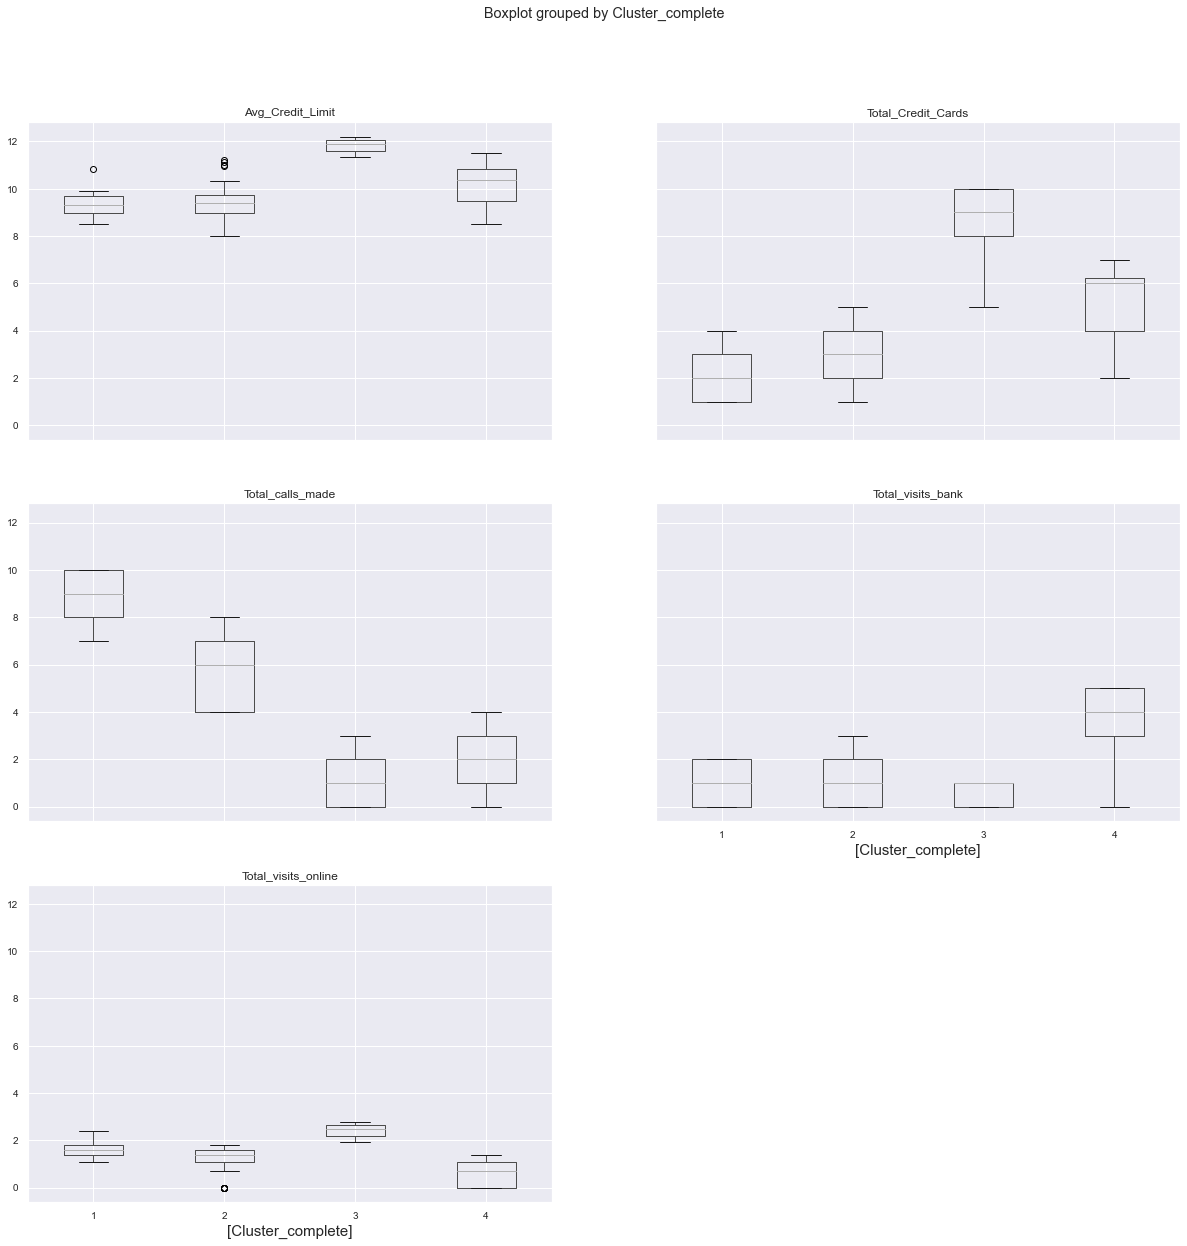

In [235]:
CCdata_hc_complete2.boxplot(by = 'Cluster_complete',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [236]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_complete2 = CCdata_hc_complete2.drop(['Cluster_complete'], axis=1)
CCdata_sil_hc_complete2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [237]:
silhouette_hc_complete2 = silhouette_score(CCdata_sil_hc_complete2 , clusters_complete_num_k1, metric = 'euclidean')
silhouette_hc_complete2

0.3789962564578357

#### The Silhouette score with Heirarchical clustering , using method as 'complete' , with 4 clusters selected using the k=4 , is 0.3789963 . This is also a  low score , indicating poor Clustering 

In [238]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 4
Method = 'Complete'
sil_score = silhouette_hc_complete2

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                 K Means                5       N/A         0.315121
2                 K Means                4       N/A         0.382751
3                 K Means                3       N/A         0.466021
4  Heirarchical Clustering               4   Average         0.397246
5  Heirarchical Clustering               3   Average         0.465171
6  Heirarchical Clustering               3    Single         0.029622
7  Heirarchical Clustering               4    Single         0.071227
8  Heirarchical Clustering               3  Complete         0.455229
9  Heirarchical Clustering               4  Complete         0.378996

#### 4.6 Using method =  weighted

In [239]:
CCdata_hc_weighted= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_weighted # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [240]:
Z_weighted = linkage(CCdata_hc_weighted, metric='euclidean', method='weighted')
c_weighted, coph_dists_weighted = cophenet(Z_weighted , pdist(CCdata_hc_weighted))

c_weighted

0.7223475788819472

In [241]:
# Print just the cophenetic coorelation distances
coph_dists_weighted = cophenet(Z_weighted )
coph_dists_weighted

array([6.70676155, 5.60417481, 6.70676155, ..., 2.6142996 , 2.6142996 ,
       1.98819768])

In [242]:
# Print the cophenetic correlation coefficient , plus the distances 
c_weighted1 =  cophenet(Z_weighted, pdist(CCdata_hc_weighted))
c_weighted1

(0.7223475788819472,
 array([6.70676155, 5.60417481, 6.70676155, ..., 2.6142996 , 2.6142996 ,
        1.98819768]))

#### The cophenetic corrleation coefficient is 0.7223475 , which is an OK score 

#### Drawing Dendrogram

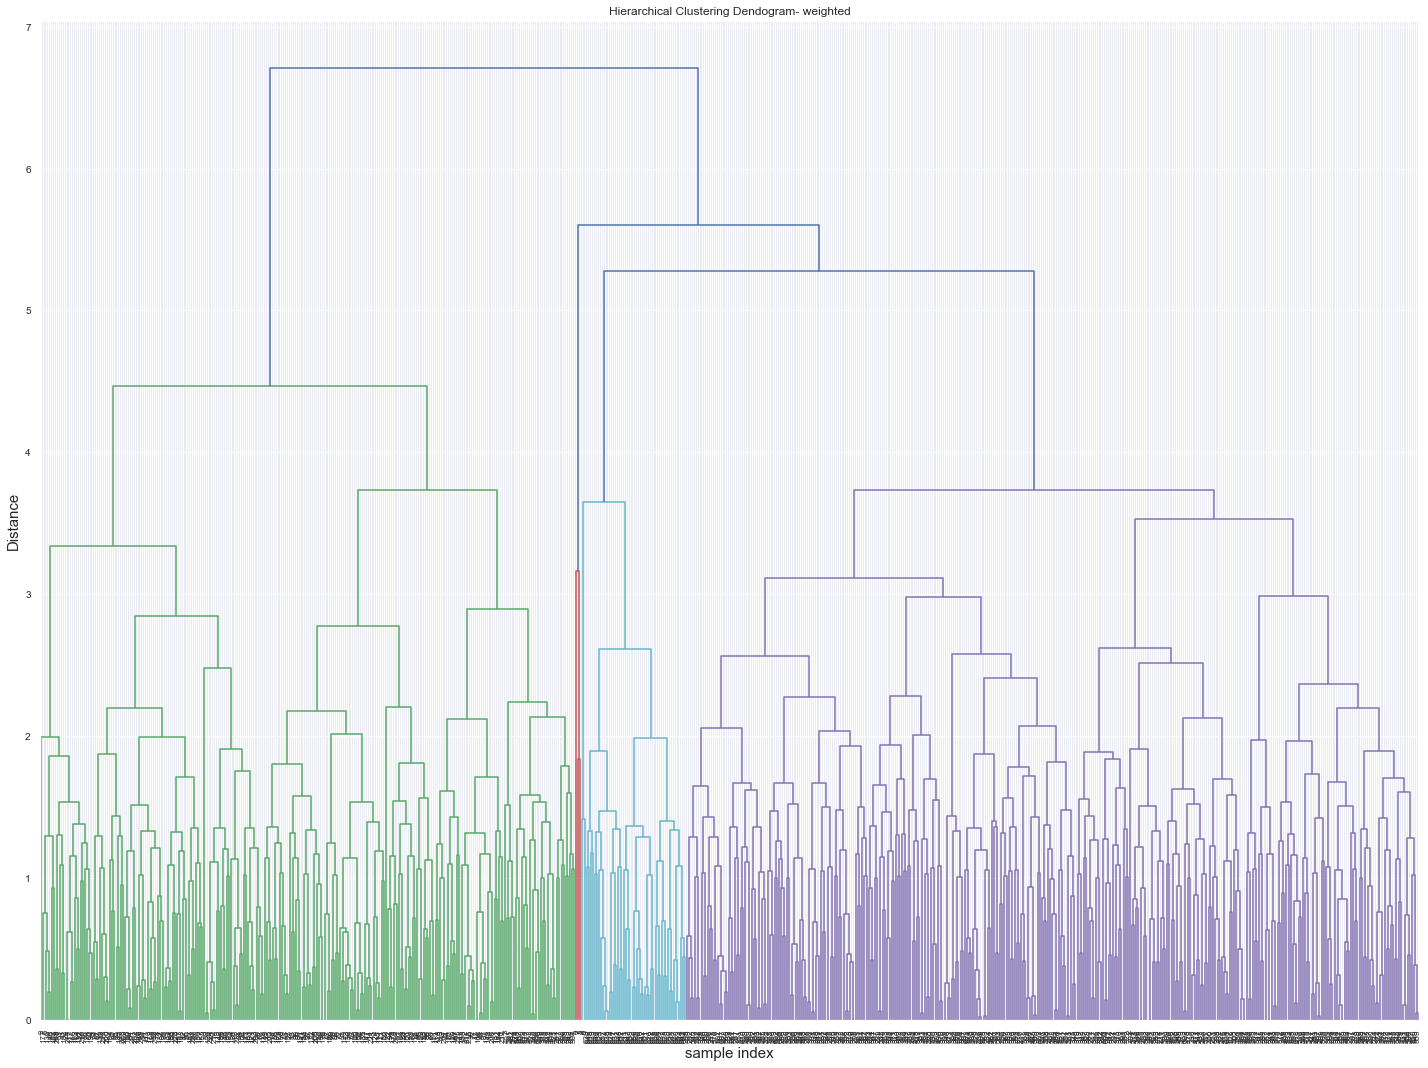

In [243]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- weighted')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_weighted, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [23.75, 23.75, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [140.0, 140.0, 172.5, 172.5],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [200.0, 200.0, 223.75, 223.75],
  [156.25, 156.25, 211.875, 211.875],
  [91.25, 91.25, 184.0625, 184.0625],
  [41.875, 41.875, 137.65625, 137.65625],
  [5.0, 5.0, 89.765625, 89.765625],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [262.5, 262.5, 294.375, 

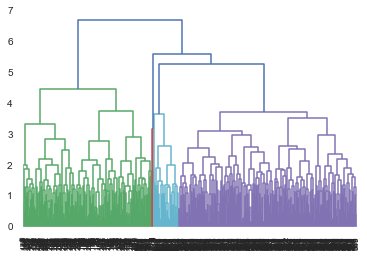

In [244]:
# Print the result Dict values
dgram_weighted = dendrogram(Z_weighted, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_weighted

In [245]:
# Print the list of labels 
labels_dgram_weighted = dgram_weighted['ivl']
labels_dgram_weighted

['9',
 '177',
 '5',
 '136',
 '140',
 '48',
 '164',
 '169',
 '218',
 '63',
 '11',
 '182',
 '29',
 '215',
 '117',
 '166',
 '153',
 '114',
 '132',
 '22',
 '210',
 '86',
 '174',
 '60',
 '134',
 '78',
 '24',
 '57',
 '139',
 '32',
 '213',
 '160',
 '220',
 '104',
 '25',
 '91',
 '68',
 '148',
 '27',
 '223',
 '209',
 '165',
 '50',
 '64',
 '201',
 '202',
 '105',
 '146',
 '208',
 '54',
 '111',
 '170',
 '173',
 '195',
 '52',
 '219',
 '74',
 '137',
 '196',
 '98',
 '138',
 '101',
 '168',
 '88',
 '123',
 '226',
 '157',
 '183',
 '12',
 '61',
 '80',
 '187',
 '193',
 '227',
 '39',
 '150',
 '127',
 '158',
 '1',
 '59',
 '126',
 '224',
 '45',
 '214',
 '19',
 '142',
 '109',
 '89',
 '144',
 '40',
 '199',
 '154',
 '38',
 '112',
 '222',
 '34',
 '102',
 '36',
 '133',
 '181',
 '190',
 '121',
 '163',
 '200',
 '26',
 '53',
 '119',
 '149',
 '21',
 '15',
 '203',
 '116',
 '58',
 '103',
 '178',
 '198',
 '79',
 '41',
 '197',
 '28',
 '13',
 '92',
 '99',
 '90',
 '191',
 '141',
 '188',
 '66',
 '37',
 '172',
 '33',
 '100',

In [246]:
colors_dgram_weighted = dgram_weighted['color_list']
colors_dgram_weighted
# print unique colors
x_weighted = np.array(colors_dgram_weighted)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_weighted), '\033[0m')

Cluster colors are : ['b' 'c' 'g' 'm' 'r'] 


#### Color code indicates 5 suggested clusters formed when using 'weighted' linkage method

#### Using Distance measure to truncate the clusters into managable numbers

In [247]:
max_d_weighted = 5.5

In [248]:
from scipy.cluster.hierarchy import fcluster
clusters_weighted_maxd = fcluster(Z_weighted, max_d_weighted, criterion='distance')
clusters_weighted_maxd

array([2, 1, 3, 1, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,

#### We get 3 clusters using the maxd distance threshold criteria

In [249]:
len(clusters_weighted_maxd)

660

#### Can also use number of clusters as criterion, with K = 4 clusters

In [250]:
k_weighted = 4
clusters_weighted_num_k = fcluster(Z_weighted, k_weighted, criterion='maxclust')
clusters_weighted_num_k

array([2, 1, 4, 1, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,

In [251]:
len(clusters_weighted_num_k)

660

In [252]:
CCdata_hc_weighted1 = CCdata_hc_weighted # copying DF to create one DF for analysing 
CCdata_hc_weighted1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [253]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k = 4 . Adding the 4 cluster labels to the CCdata_hc_weighted1  DF

In [254]:
#CCdata_hc_weighted1.drop(['Cluster_weighted'], axis=1, inplace=True)

In [255]:
CCdata_hc_weighted1['Cluster_weighted'] = clusters_weighted_num_k.tolist()
CCdata_hc_weighted1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_weighted  
0               0.693147                 0                 2  
1               2.397895                 9                 1  
2               1.386294                 4                 4  
3               0.693147                 4                 1  
4               2.564949                 3                 3  
..                   ...               ...               ...  
655             2.397895                 0                 3  
656             2.639057                 2                 3  
657             2.302585                 1                 3  
658             2.772589                 0                 3  
659             2.564949                 2                 3  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =weighted and choosing k=4 , giving 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B7EABCC8>,
      dtype=object)

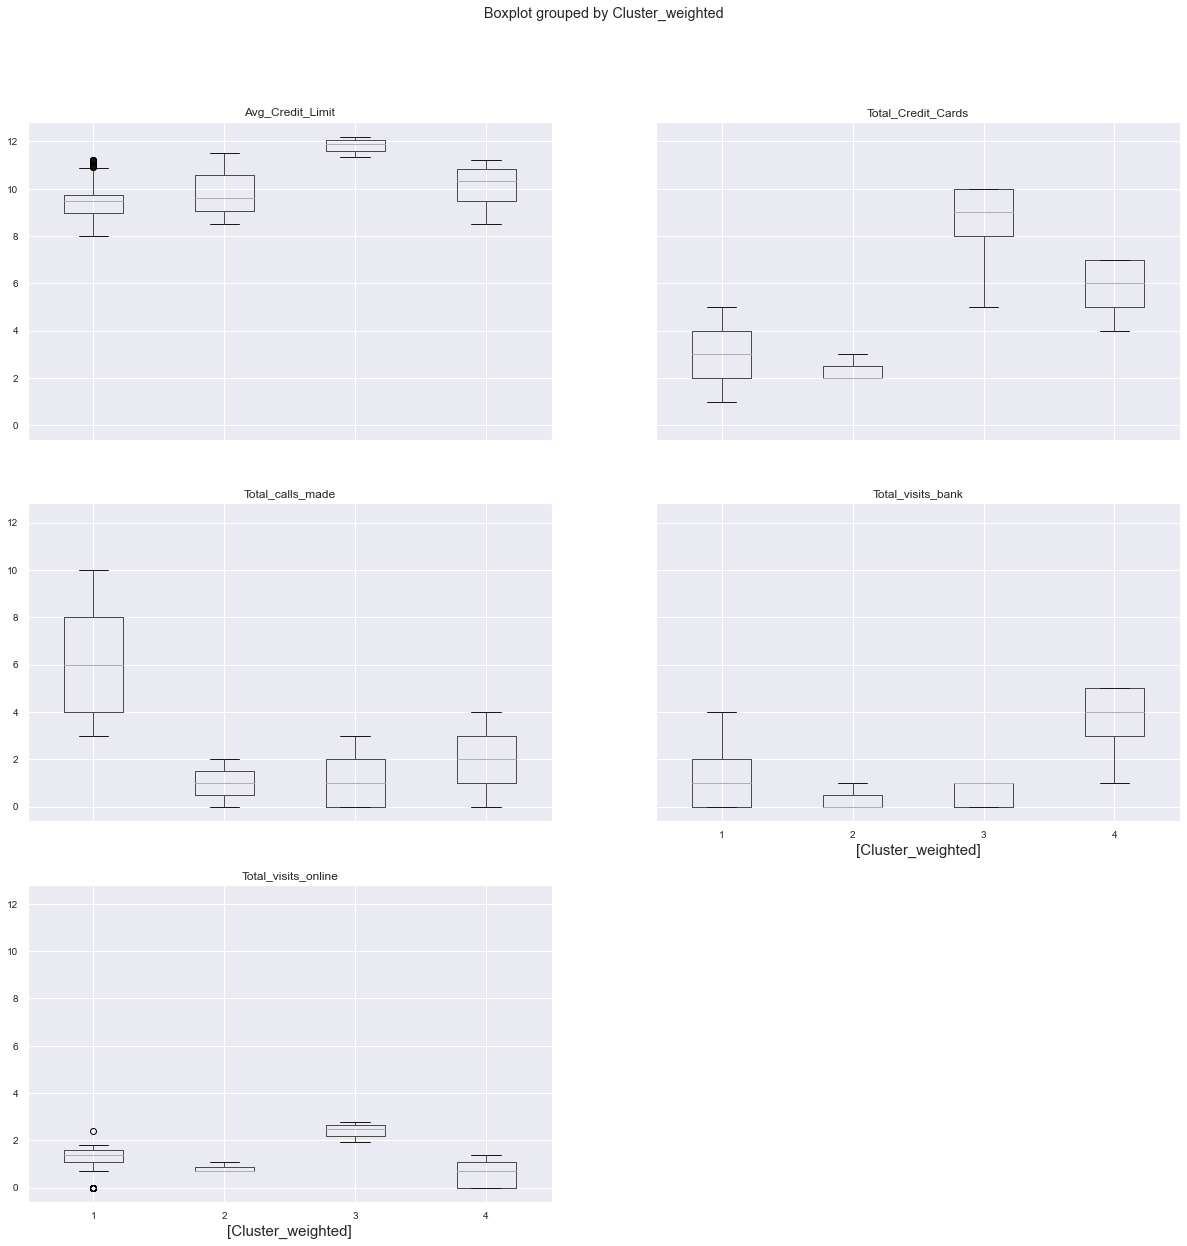

In [256]:
CCdata_hc_weighted1.boxplot(by = 'Cluster_weighted',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [257]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_weighted1 = CCdata_hc_weighted1.drop(['Cluster_weighted'], axis=1)
CCdata_sil_hc_weighted1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [258]:
silhouette_hc_weighted1 = silhouette_score(CCdata_sil_hc_weighted1 , clusters_weighted_num_k, metric = 'euclidean')
silhouette_hc_weighted1

0.354661055083606

#### The Silhouette score with Heirarchical clustering , using method as 'weighted' , with 4 clusters selected using the k=4 , is 0.3546611 . This is also a  low score , indicating poor Clustering 

In [259]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 4
Method = 'Weighted'
sil_score = silhouette_hc_weighted1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661

###  4.7 Try with 'weighted' method , with k=3, for 3 clusters

In [260]:
k_weighted1 = 3
clusters_weighted_num_k1 = fcluster(Z_weighted, k_weighted1, criterion='maxclust')
clusters_weighted_num_k1

array([2, 1, 3, 1, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,

In [261]:
len(clusters_weighted_num_k1)

660

In [262]:
CCdata_hc_weighted2 = CCdata_hc_weighted # copying DF to create one DF for analysing 
CCdata_hc_weighted2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_weighted  
0               0.693147                 0                 2  
1               2.397895                 9                 1  
2               1.386294                 4                 4  
3               0.693147                 4                 1  
4               2.564949                 3                 3  
..                   ...               ...               ...  
655             2.397895                 0                 3  
656             2.639057                 2                 3  
657             2.302585                 1                 3  
658             2.772589                 0                 3  
659             2.564949                 2                 3  

[660 rows x 6 columns]

In [263]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k = 3 . Adding the 4 cluster labels to the CCdata_hc_weighted2  DF

In [264]:
#CCdata_hc_weighted1.drop(['Cluster_weighted'], axis=1, inplace=True)

In [265]:
CCdata_hc_weighted2['Cluster_weighted'] = clusters_weighted_num_k1.tolist()
CCdata_hc_weighted2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_weighted  
0               0.693147                 0                 2  
1               2.397895                 9                 1  
2               1.386294                 4                 3  
3               0.693147                 4                 1  
4               2.564949                 3                 3  
..                   ...               ...               ...  
655             2.397895                 0                 3  
656             2.639057                 2                 3  
657             2.302585                 1                 3  
658             2.772589                 0                 3  
659             2.564949                 2                 3  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =weighted and choosing k=4 , giving 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B8F5C848>,
      dtype=object)

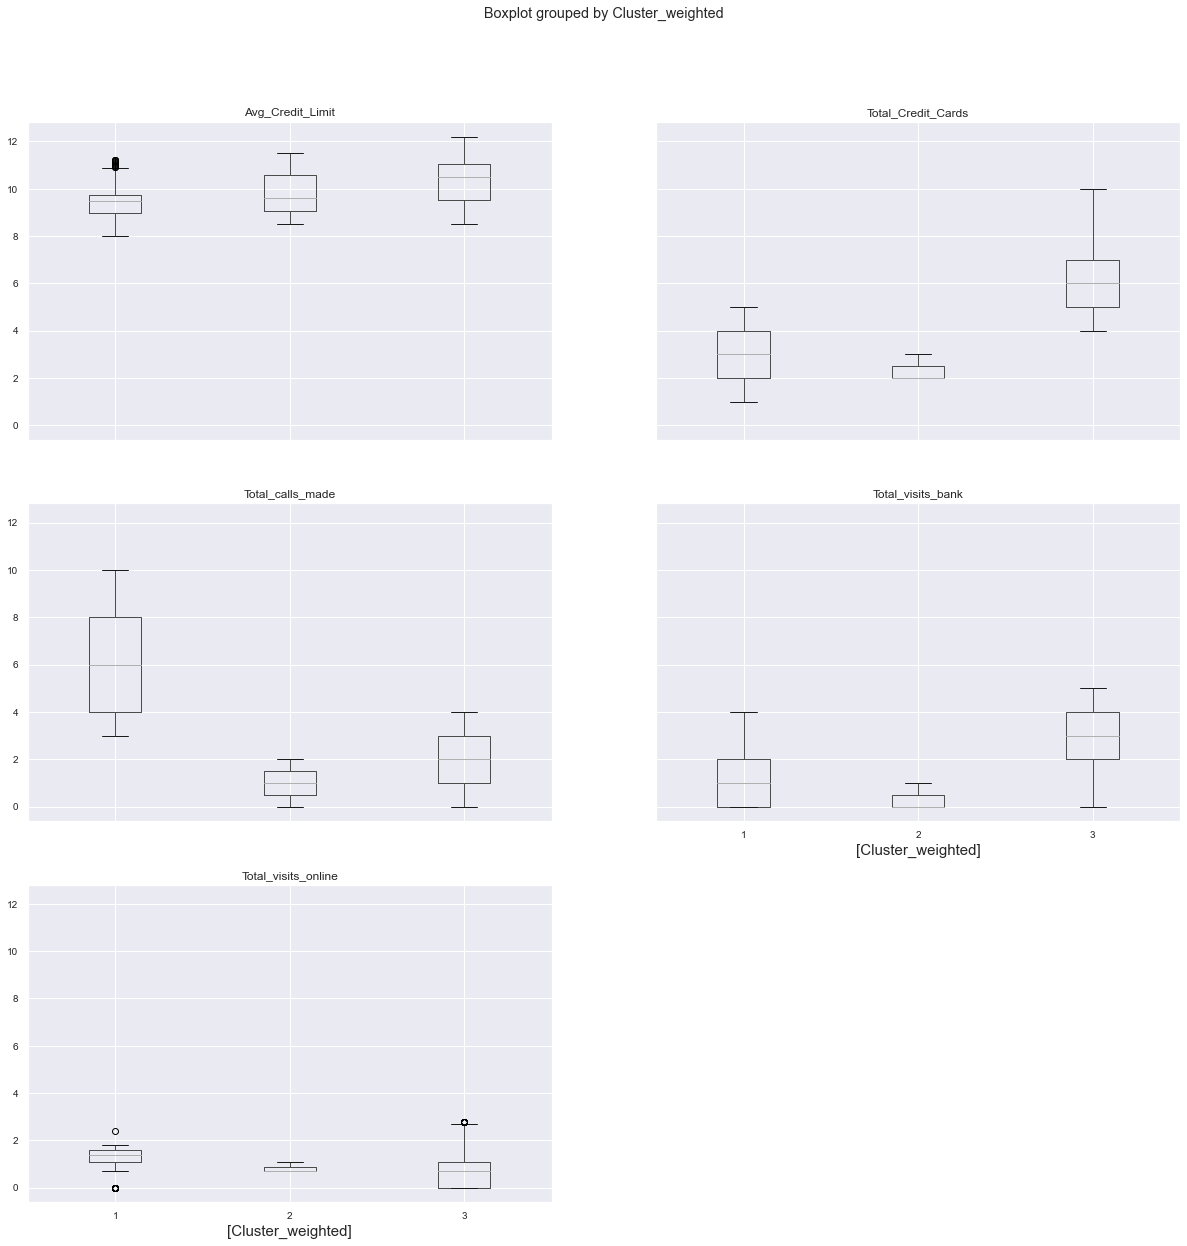

In [266]:
CCdata_hc_weighted2.boxplot(by = 'Cluster_weighted',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [267]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_weighted2 = CCdata_hc_weighted2.drop(['Cluster_weighted'], axis=1)
CCdata_sil_hc_weighted2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [268]:
silhouette_hc_weighted2 = silhouette_score(CCdata_sil_hc_weighted2 , clusters_weighted_num_k1, metric = 'euclidean')
silhouette_hc_weighted2

0.32415736826033575

#### The Silhouette score with Heirarchical clustering , using method as 'weighted' , with 3 clusters selected using the k=3 , is 0.3241574 . This is also a  low score , indicating poor Clustering 

In [269]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 3
Method = 'Weighted'
sil_score = silhouette_hc_weighted2

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157

#### 4.5 Using method =  centroid

In [270]:
CCdata_hc_centroid= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_centroid # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [271]:
Z_centroid = linkage(CCdata_hc_centroid, metric='euclidean', method='centroid')
c_centroid, coph_dists_centroid = cophenet(Z_centroid , pdist(CCdata_hc_centroid))

c_centroid

0.7869140199105742

In [272]:
# Print just the cophenetic coorelation distances
coph_dists_centroid = cophenet(Z_centroid )
coph_dists_centroid

array([6.55835889, 5.04149721, 6.55835889, ..., 2.05490198, 2.05490198,
       1.51182861])

In [273]:
# Print the cophenetic correlation coefficient , plus the distances 
c_centroid1 =  cophenet(Z_centroid, pdist(CCdata_hc_centroid))
c_centroid1

(0.7869140199105742,
 array([6.55835889, 5.04149721, 6.55835889, ..., 2.05490198, 2.05490198,
        1.51182861]))

#### The cophenetic corrleation coefficient is 0.786914 , which is a better score 

#### Drawing Dendrogram

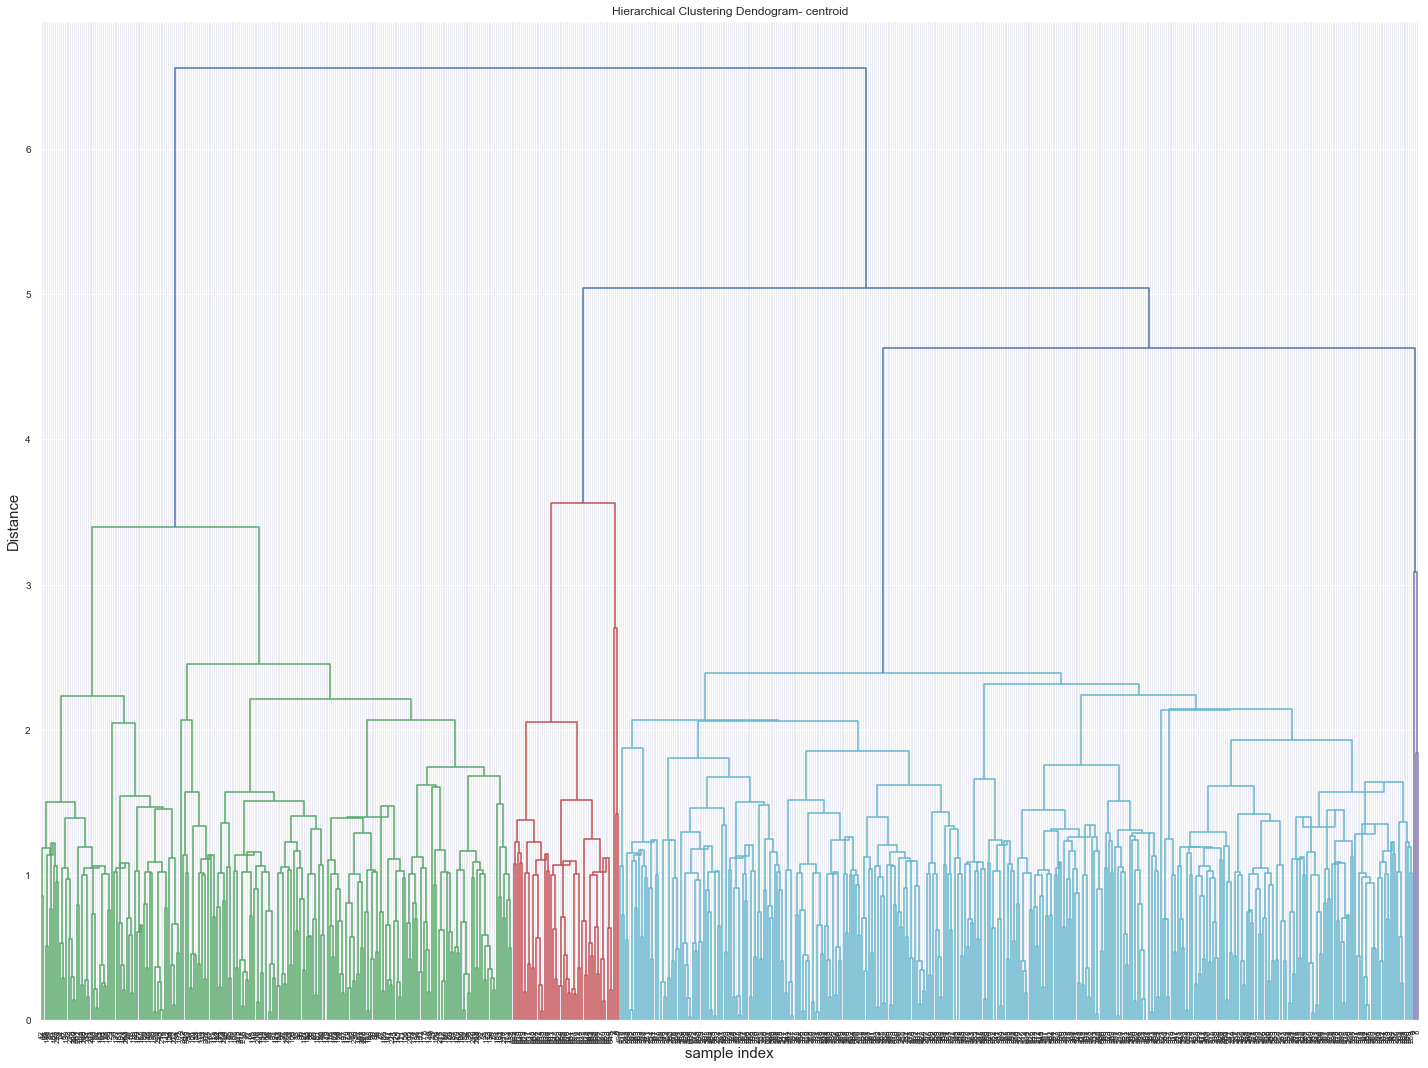

In [274]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- centroid')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_centroid, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [50.0, 50.0, 72.5, 72.5],
  [30.0, 30.0, 61.25, 61.25],
  [10.0, 10.0, 45.625, 45.625],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [102.5, 102.5, 134.375, 134.375],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [293.75, 293.75, 330.0, 330.0],
  [253.75, 253.75, 311.875, 311.875],
  [211.25, 211.25, 282.8125, 282.8125],
  [180.0, 180.0, 247.03125, 247.03125]

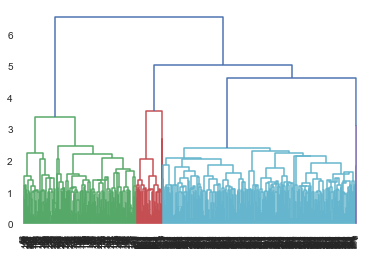

In [275]:
# Print the result Dict values
dgram_centroid = dendrogram(Z_centroid, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_centroid

In [276]:
# Print the list of labels 
labels_dgram_centroid = dgram_centroid['ivl']
labels_dgram_centroid

['12',
 '61',
 '68',
 '148',
 '25',
 '91',
 '104',
 '27',
 '223',
 '78',
 '24',
 '57',
 '139',
 '32',
 '213',
 '160',
 '220',
 '201',
 '202',
 '105',
 '146',
 '208',
 '54',
 '111',
 '209',
 '165',
 '50',
 '64',
 '168',
 '101',
 '98',
 '138',
 '88',
 '123',
 '1',
 '36',
 '133',
 '181',
 '190',
 '121',
 '163',
 '200',
 '26',
 '53',
 '119',
 '39',
 '150',
 '127',
 '158',
 '109',
 '89',
 '144',
 '40',
 '199',
 '59',
 '126',
 '224',
 '45',
 '214',
 '19',
 '142',
 '154',
 '38',
 '112',
 '222',
 '34',
 '102',
 '3',
 '242',
 '288',
 '343',
 '84',
 '161',
 '20',
 '189',
 '44',
 '110',
 '313',
 '42',
 '207',
 '225',
 '87',
 '113',
 '128',
 '122',
 '94',
 '179',
 '176',
 '204',
 '46',
 '55',
 '159',
 '51',
 '106',
 '125',
 '212',
 '211',
 '216',
 '30',
 '77',
 '81',
 '118',
 '143',
 '16',
 '206',
 '145',
 '185',
 '17',
 '162',
 '35',
 '43',
 '97',
 '194',
 '141',
 '188',
 '66',
 '37',
 '172',
 '205',
 '33',
 '100',
 '28',
 '13',
 '92',
 '99',
 '90',
 '191',
 '155',
 '82',
 '85',
 '23',
 '65',
 '1

In [277]:
colors_dgram_centroid = dgram_centroid['color_list']
colors_dgram_centroid
# print unique colors
x_centroid = np.array(colors_dgram_centroid)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_centroid), '\033[0m')

Cluster colors are : ['b' 'c' 'g' 'm' 'r'] 


#### Color code indicates 5 suggested clusters formed when using 'centroid' linkage method

#### Using Distance measure to truncate the clusters into managable numbers

In [278]:
max_d_centroid = 4

In [279]:
from scipy.cluster.hierarchy import fcluster
clusters_centroid_maxd = fcluster(Z_centroid, max_d_centroid, criterion='distance')
clusters_centroid_maxd

array([4, 1, 2, 1, 2, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

#### We get 4 clusters using the maxd distance threshold criteria of 4

In [280]:
len(clusters_complete_maxd)

660

#### Can also use number of clusters as criterion, with K = 4 clusters

In [281]:
k_centroid = 4
clusters_centroid_num_k = fcluster(Z_centroid, k_centroid, criterion='maxclust')
clusters_centroid_num_k

array([4, 1, 2, 1, 2, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [282]:
len(clusters_centroid_num_k)

660

In [283]:
CCdata_hc_centroid1 = CCdata_hc_centroid # copying DF to create one DF for analysing 
CCdata_hc_centroid1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [284]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k = 4 . Adding the 4 cluster labels to the CCdata_hc_centroid1  DF

In [285]:
#CCdata_hc_centroid1.drop(['Cluster_centroid'], axis=1, inplace=True)

In [286]:
CCdata_hc_centroid1['Cluster_centroid'] = clusters_centroid_num_k.tolist()
CCdata_hc_centroid1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_centroid  
0               0.693147                 0                 4  
1               2.397895                 9                 1  
2               1.386294                 4                 2  
3               0.693147                 4                 1  
4               2.564949                 3                 2  
..                   ...               ...               ...  
655             2.397895                 0                 2  
656             2.639057                 2                 2  
657             2.302585                 1                 2  
658             2.772589                 0                 2  
659             2.564949                 2                 2  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =centroid and choosing k=4 , giving 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249BD8FF308>,
      dtype=object)

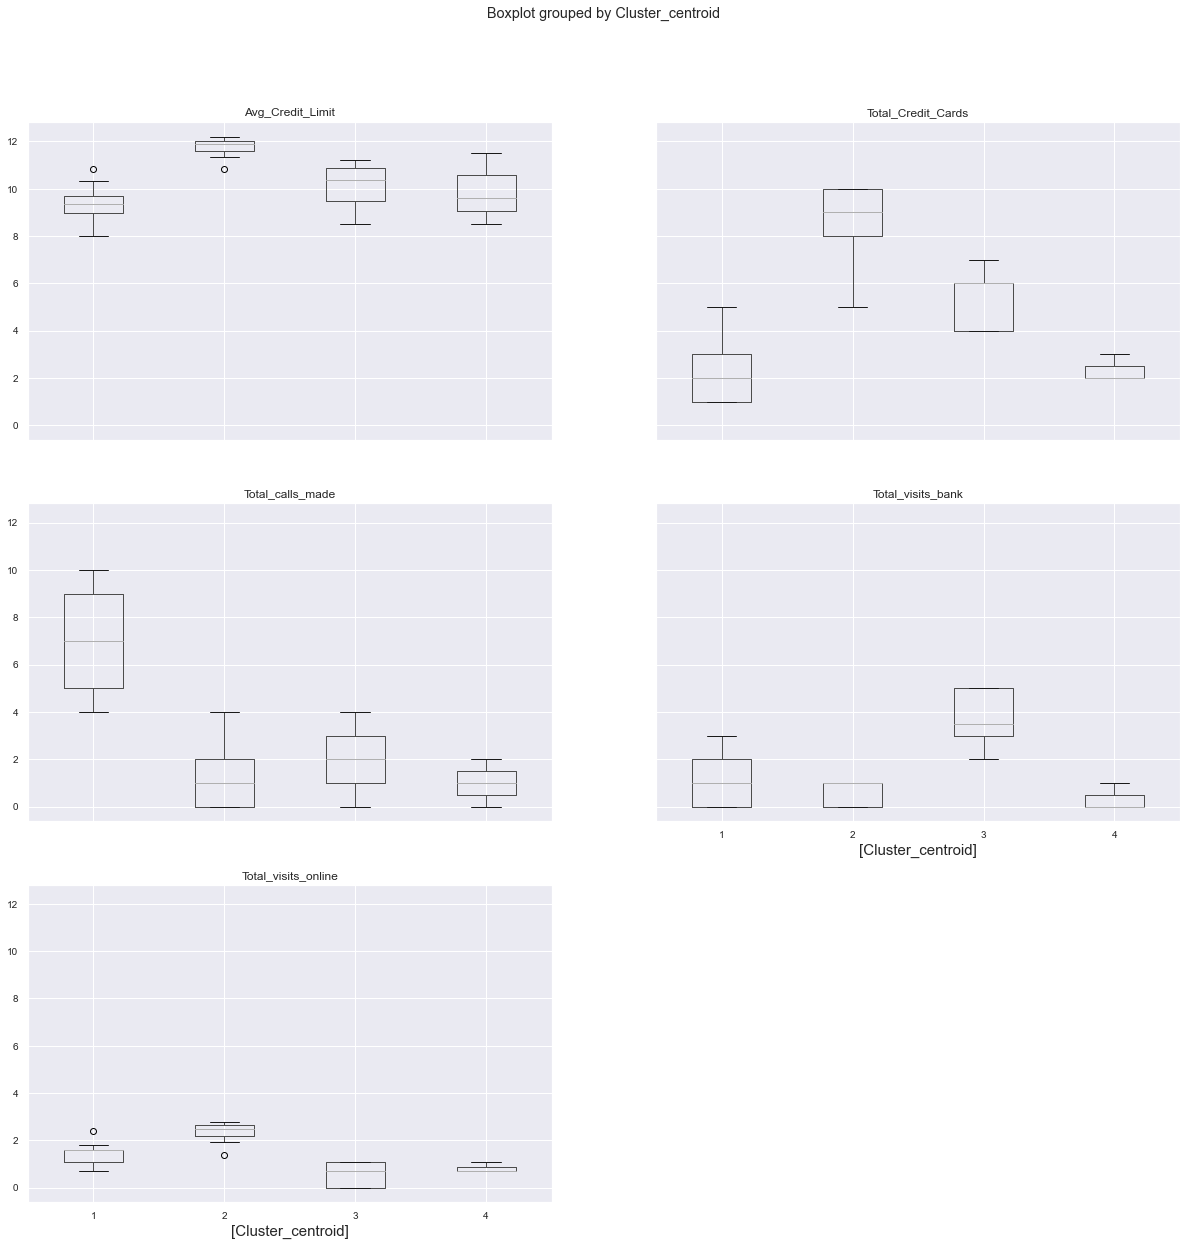

In [287]:
CCdata_hc_centroid1.boxplot(by = 'Cluster_centroid',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [288]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_centroid1 = CCdata_hc_centroid1.drop(['Cluster_centroid'], axis=1)
CCdata_sil_hc_centroid1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [289]:
silhouette_hc_centroid1 = silhouette_score(CCdata_sil_hc_centroid1 , clusters_centroid_num_k, metric = 'euclidean')
silhouette_hc_centroid1

0.39333412109007576

#### The Silhouette score with Heirarchical clustering , using method as 'centroid' , with 4 clusters selected using the k=4 , is 0.393334 . This is also a  low score , indicating poor Clustering 

In [290]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 4
Method = 'Centroid'
sil_score = silhouette_hc_centroid1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157
12  Heirarchical Clustering               4  Centroid         0.393334

### Try with 3 clusters uisng centroid method

#### Use number of clusters as criterion, with K = 3 clusters

In [291]:
k_centroid = 3
clusters_centroid_num_k1 = fcluster(Z_centroid, k_centroid, criterion='maxclust')
clusters_centroid_num_k1

array([3, 1, 2, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [292]:
len(clusters_centroid_num_k1)

660

In [293]:
CCdata_hc_centroid2 = CCdata_hc_centroid # copying DF to create one DF for analysing 
CCdata_hc_centroid2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_centroid  
0               0.693147                 0                 4  
1               2.397895                 9                 1  
2               1.386294                 4                 2  
3               0.693147                 4                 1  
4               2.564949                 3                 2  
..                   ...               ...               ...  
655             2.397895                 0                 2  
656             2.639057                 2                 2  
657             2.302585                 1                 2  
658             2.772589                 0                 2  
659             2.564949                 2                 2  

[660 rows x 6 columns]

In [294]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k = 3 . Adding the 3 cluster labels to the CCdata_hc_centroid2  DF

In [295]:
#CCdata_hc_centroid1.drop(['Cluster_centroid'], axis=1, inplace=True)

In [296]:
CCdata_hc_centroid2['Cluster_centroid'] = clusters_centroid_num_k1.tolist()
CCdata_hc_centroid2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_centroid  
0               0.693147                 0                 3  
1               2.397895                 9                 1  
2               1.386294                 4                 2  
3               0.693147                 4                 1  
4               2.564949                 3                 2  
..                   ...               ...               ...  
655             2.397895                 0                 2  
656             2.639057                 2                 2  
657             2.302585                 1                 2  
658             2.772589                 0                 2  
659             2.564949                 2                 2  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =centroid and choosing k=3 , giving 3 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B8F283C8>,
      dtype=object)

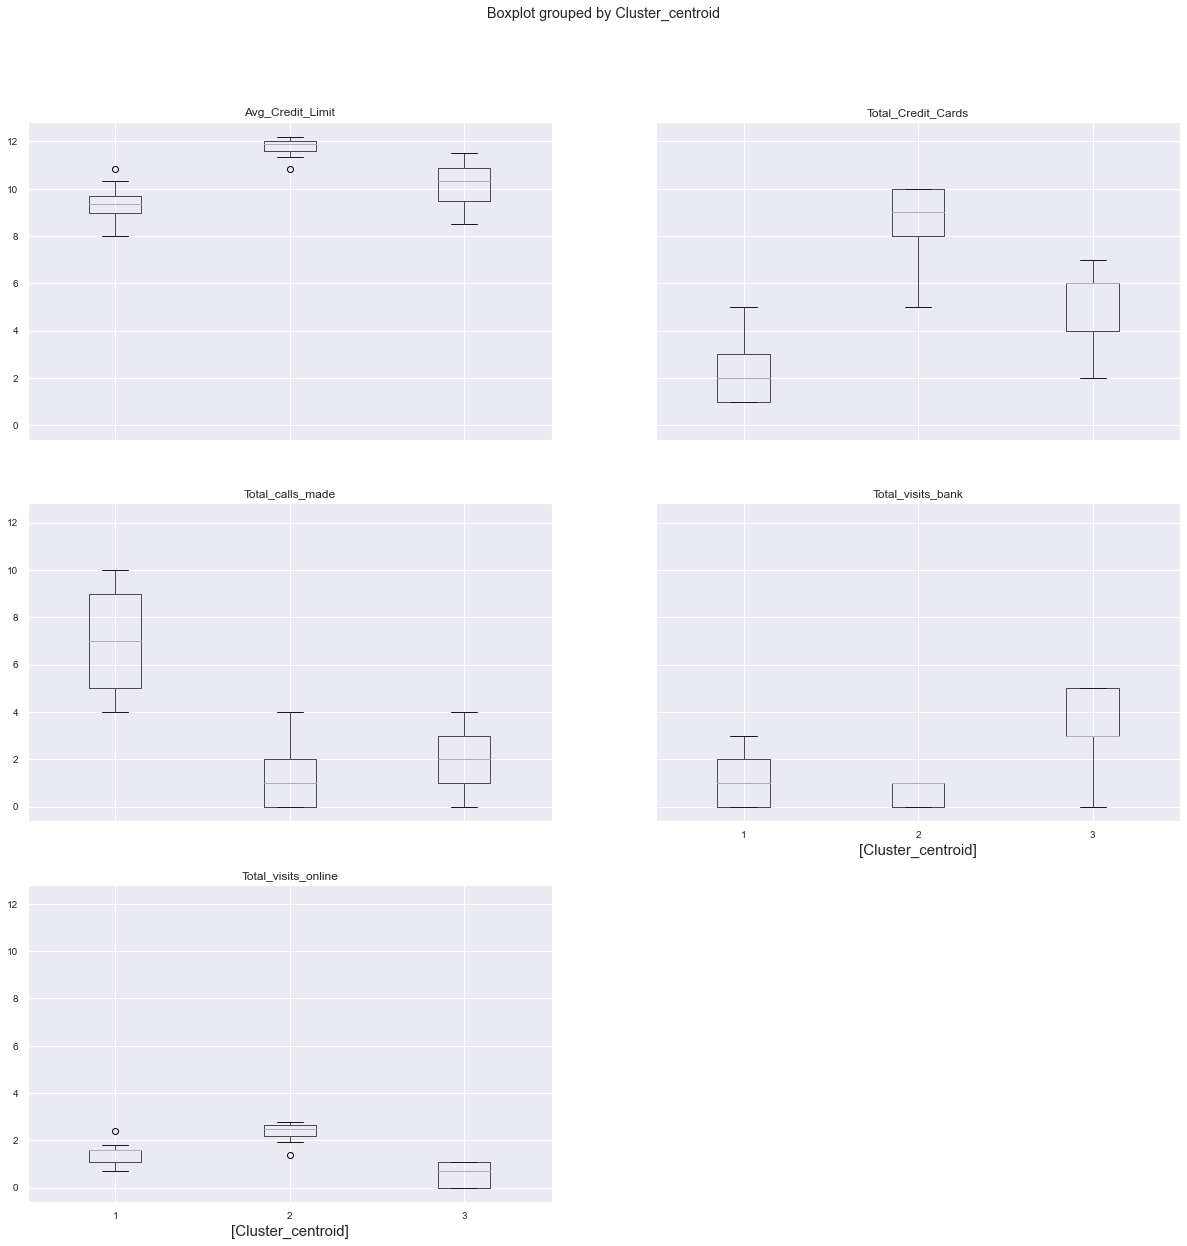

In [297]:
CCdata_hc_centroid2.boxplot(by = 'Cluster_centroid',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [298]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_centroid2 = CCdata_hc_centroid2.drop(['Cluster_centroid'], axis=1)
CCdata_sil_hc_centroid2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [299]:
silhouette_hc_centroid2 = silhouette_score(CCdata_sil_hc_centroid2 , clusters_centroid_num_k1, metric = 'euclidean')
silhouette_hc_centroid2

0.46092345337041546

#### The Silhouette score with Heirarchical clustering , using method as 'centroid' , with 3 clusters selected using the k=3 , is 0.46092345 . 

In [300]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 3
Method = 'Centroid'
sil_score = silhouette_hc_centroid2

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157
12  Heirarchical Clustering               4  Centroid         0.393334
13  Heirarchical Clustering               3  Centroid         0.460923

#### 4.6 Using method =  median

In [301]:
CCdata_hc_median= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_median # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [302]:
Z_median = linkage(CCdata_hc_median, metric='euclidean', method='median')
c_median, coph_dists_median = cophenet(Z_median , pdist(CCdata_hc_median))

c_median

0.7881518224979137

In [303]:
# Print just the cophenetic coorelation distances
coph_dists_median = cophenet(Z_median )
coph_dists_median

array([6.68973758, 4.54732699, 6.68973758, ..., 2.07038387, 2.07038387,
       1.52405018])

In [304]:
# Print the cophenetic correlation coefficient , plus the distances 
c_median1 =  cophenet(Z_median, pdist(CCdata_hc_median))
c_median1

(0.7881518224979137,
 array([6.68973758, 4.54732699, 6.68973758, ..., 2.07038387, 2.07038387,
        1.52405018]))

#### The cophenetic corrleation coefficient is 0.7881518 , which is a better score 

#### Drawing Dendrogram

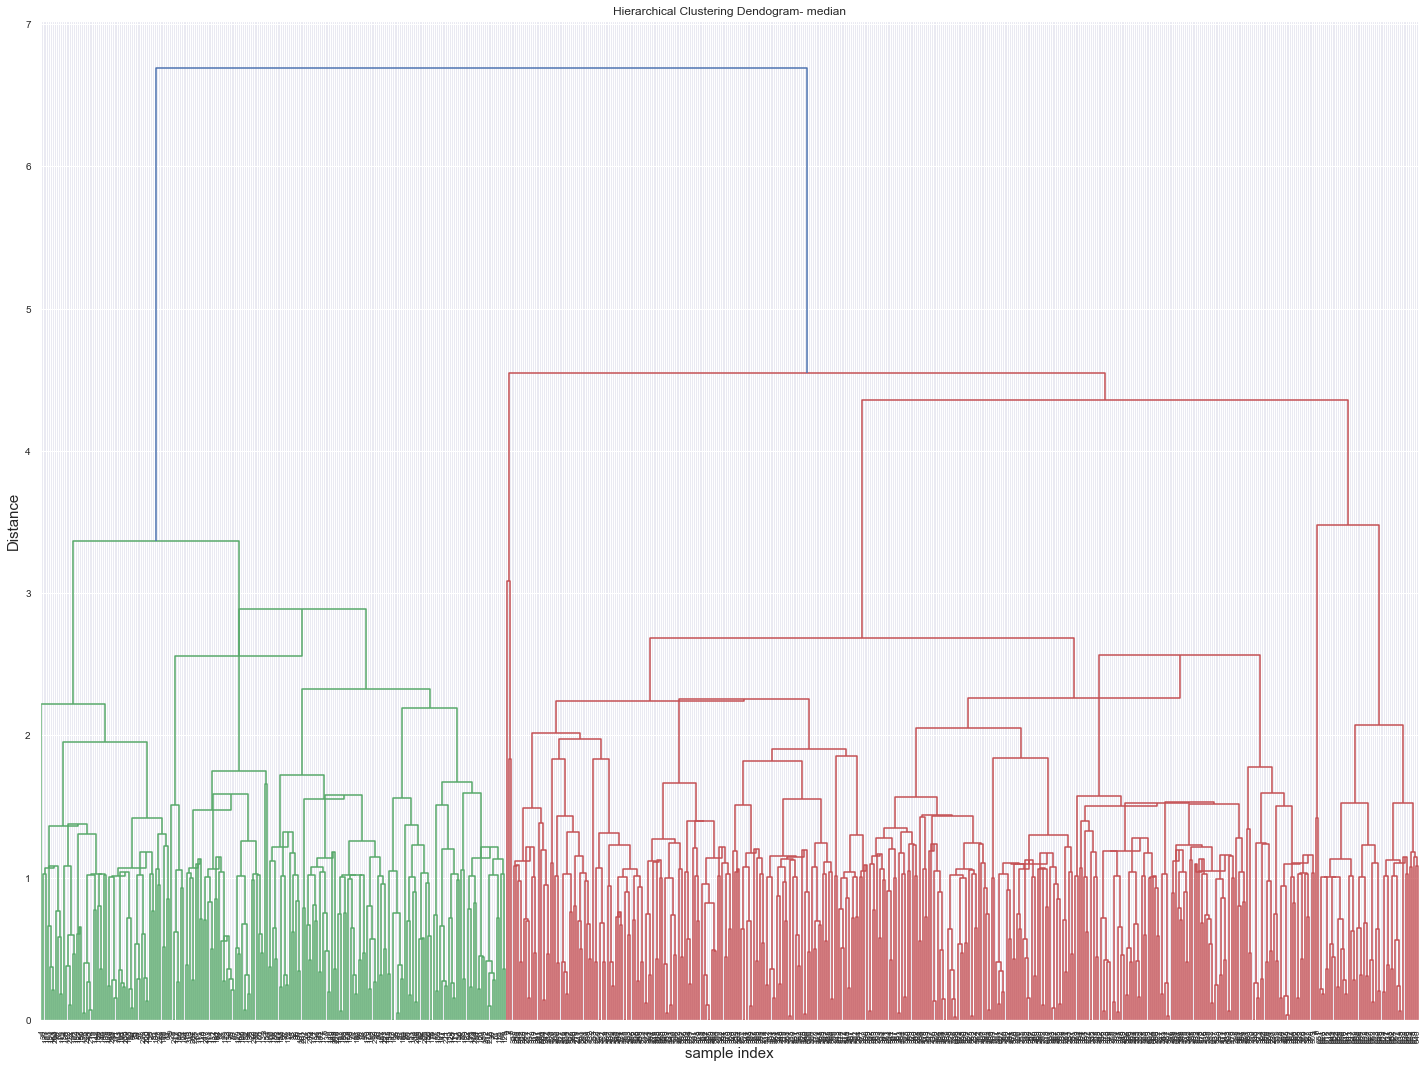

In [305]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- median')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_median, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [43.75, 43.75, 83.75, 83.75],
  [20.0, 20.0, 63.75, 63.75],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [115.0, 115.0, 146.25, 146.25],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [221.25, 221.25, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [282.5, 282.5, 310.0, 310.0],
  [240.625, 240.625, 296.25, 296.25],
  [182.5, 182.5, 268.4375, 268.4375],
  [130.625, 130.625, 225.46875, 225.46875],
  [41.875, 41.875, 178.046875, 178.046875],
  [325.0, 325.0,

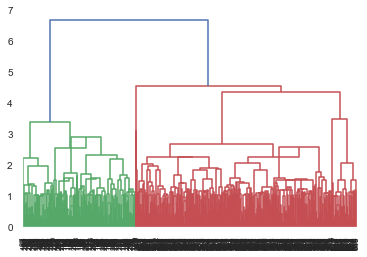

In [306]:
# Print the result Dict values
dgram_median = dendrogram(Z_median, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_median

In [307]:
# Print the list of labels 
labels_dgram_median = dgram_median['ivl']
labels_dgram_median

['1',
 '36',
 '133',
 '181',
 '190',
 '121',
 '163',
 '200',
 '26',
 '53',
 '119',
 '154',
 '38',
 '112',
 '222',
 '34',
 '102',
 '150',
 '127',
 '158',
 '59',
 '126',
 '224',
 '45',
 '214',
 '19',
 '142',
 '109',
 '89',
 '144',
 '40',
 '199',
 '105',
 '146',
 '208',
 '54',
 '111',
 '168',
 '101',
 '98',
 '138',
 '209',
 '165',
 '50',
 '64',
 '78',
 '24',
 '57',
 '32',
 '213',
 '160',
 '220',
 '139',
 '25',
 '91',
 '104',
 '27',
 '223',
 '68',
 '148',
 '12',
 '61',
 '9',
 '29',
 '215',
 '117',
 '166',
 '48',
 '164',
 '44',
 '110',
 '313',
 '42',
 '207',
 '225',
 '87',
 '113',
 '128',
 '10',
 '217',
 '153',
 '114',
 '132',
 '131',
 '192',
 '63',
 '72',
 '31',
 '129',
 '73',
 '130',
 '75',
 '83',
 '67',
 '120',
 '167',
 '108',
 '49',
 '152',
 '96',
 '135',
 '22',
 '210',
 '86',
 '174',
 '60',
 '134',
 '3',
 '184',
 '33',
 '100',
 '116',
 '58',
 '103',
 '141',
 '188',
 '66',
 '37',
 '172',
 '28',
 '13',
 '92',
 '99',
 '90',
 '191',
 '201',
 '202',
 '21',
 '15',
 '203',
 '74',
 '137',
 '19

In [308]:
colors_dgram_median = dgram_median['color_list']
colors_dgram_median
# print unique colors
x_median = np.array(colors_dgram_median)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_median), '\033[0m')

Cluster colors are : ['b' 'g' 'r'] 


#### Color code indicates 3 suggested clusters formed when using 'median' linkage method

#### Using Cophenetic Distance measure to truncate the clusters into managable numbers

In [309]:
max_d_median = 4

In [310]:
from scipy.cluster.hierarchy import fcluster
clusters_median_maxd = fcluster(Z_median, max_d_median, criterion='distance')
clusters_median_maxd

array([2, 1, 3, 1, 4, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

#### We get 4 clusters using the maxd distance threshold criteria of 4

In [311]:
len(clusters_median_maxd)

660

#### Can also use number of clusters as criterion, with K = 4 clusters

In [312]:
k_median = 4
clusters_median_num_k = fcluster(Z_median, k_median, criterion='maxclust')
clusters_median_num_k

array([2, 1, 3, 1, 4, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [313]:
len(clusters_median_num_k)

660

In [314]:
CCdata_hc_median1 = CCdata_hc_median # copying DF to create one DF for analysing 
CCdata_hc_median1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [315]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on maxd = 4 . Adding the 4 cluster labels to the CCdata_hc_median1  DF

In [316]:
#CCdata_hc_centroid1.drop(['Cluster_centroid'], axis=1, inplace=True)

In [317]:
CCdata_hc_median1['Cluster_median'] = clusters_median_maxd.tolist()
CCdata_hc_median1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_median  
0               0.693147                 0               2  
1               2.397895                 9               1  
2               1.386294                 4               3  
3               0.693147                 4               1  
4               2.564949                 3               4  
..                   ...               ...             ...  
655             2.397895                 0               4  
656             2.639057                 2               4  
657             2.302585                 1               4  
658             2.772589                 0               4  
659             2.564949                 2               4  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =centroid and choosing k=4 , giving 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249BDB0D948>,
      dtype=object)

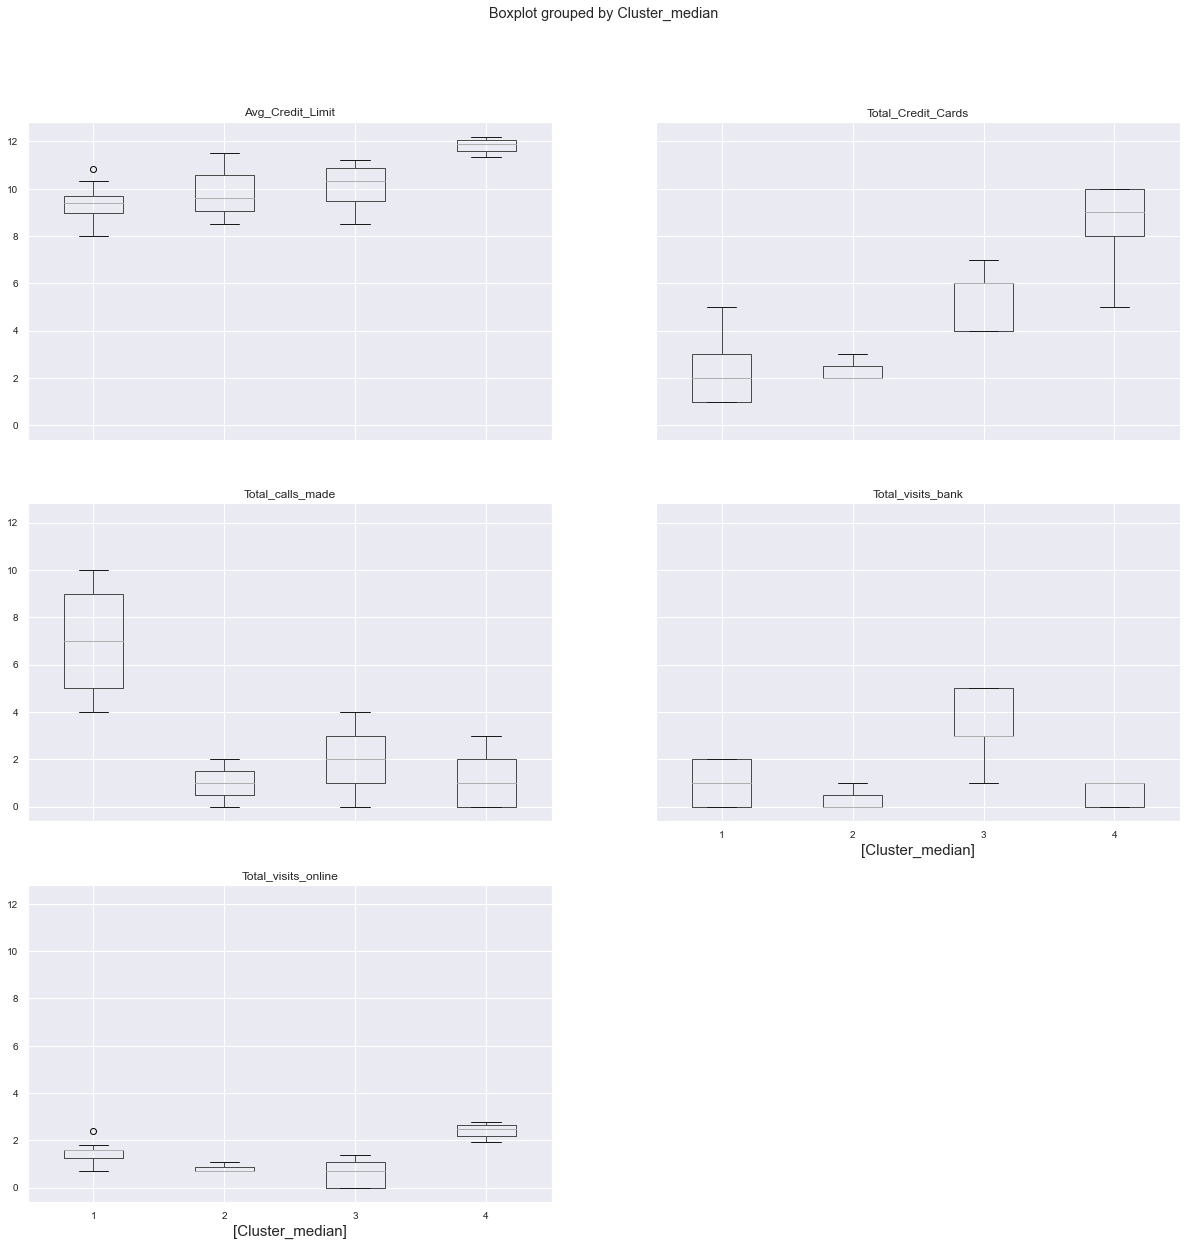

In [318]:
CCdata_hc_median1.boxplot(by = 'Cluster_median',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [319]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_median1 = CCdata_hc_median1.drop(['Cluster_median'], axis=1)
CCdata_sil_hc_median1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [320]:
silhouette_hc_median1 = silhouette_score(CCdata_sil_hc_median1 , clusters_median_maxd, metric = 'euclidean')
silhouette_hc_median1

0.39675064412087124

#### The Silhouette score with Heirarchical clustering , using method as 'median' , with 4 clusters selected using the maxd=4 , is 0.39675064 . This is also a  low score , indicating poor Clustering 

In [321]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 4
Method = 'Median'
sil_score = silhouette_hc_median1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157
12  Heirarchical Clustering               4  Centroid         0.393334
13  Heirarchical Clustering               3  Centroid         0.460923
14  Heirarchical Clustering               4    Median         0.396751

#### Test with 3 clusters using 'Median' method

#### Use number of clusters as criterion, with K = 3 clusters

In [322]:
k_median1 = 3
clusters_median_num_k1 = fcluster(Z_median, k_median1, criterion='maxclust')
clusters_median_num_k1

array([2, 1, 3, 1, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [323]:
len(clusters_median_num_k1)

660

In [324]:
CCdata_hc_median2 = CCdata_hc_median1 # copying DF to create one DF for analysing 
CCdata_hc_median2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_median  
0               0.693147                 0               2  
1               2.397895                 9               1  
2               1.386294                 4               3  
3               0.693147                 4               1  
4               2.564949                 3               4  
..                   ...               ...             ...  
655             2.397895                 0               4  
656             2.639057                 2               4  
657             2.302585                 1               4  
658             2.772589                 0               4  
659             2.564949                 2               4  

[660 rows x 6 columns]

In [325]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on k = 3. Adding the 3 cluster labels to the CCdata_hc_median2  DF

In [326]:
#CCdata_hc_centroid1.drop(['Cluster_centroid'], axis=1, inplace=True)

In [327]:
CCdata_hc_median2['Cluster_median'] = clusters_median_num_k1.tolist()
CCdata_hc_median2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_median  
0               0.693147                 0               2  
1               2.397895                 9               1  
2               1.386294                 4               3  
3               0.693147                 4               1  
4               2.564949                 3               3  
..                   ...               ...             ...  
655             2.397895                 0               3  
656             2.639057                 2               3  
657             2.302585                 1               3  
658             2.772589                 0               3  
659             2.564949                 2               3  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method =centroid and choosing k=3 , giving 3 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249BE1DABC8>,
      dtype=object)

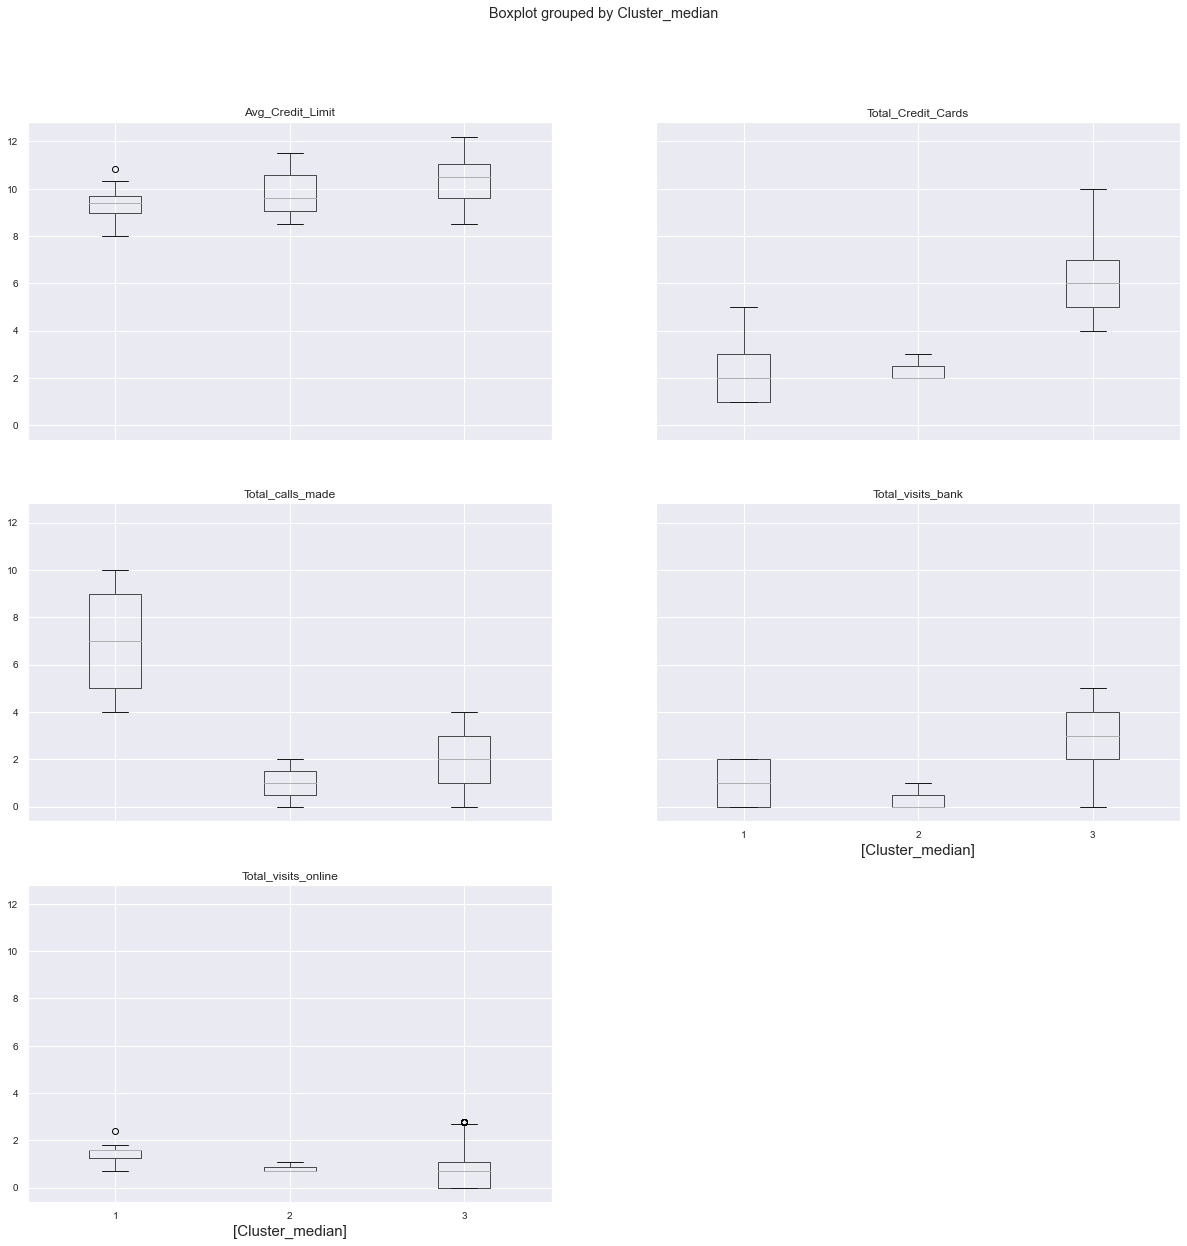

In [328]:
CCdata_hc_median2.boxplot(by = 'Cluster_median',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [329]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_median2 = CCdata_hc_median2.drop(['Cluster_median'], axis=1)
CCdata_sil_hc_median2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [330]:
silhouette_hc_median2 = silhouette_score(CCdata_sil_hc_median2 , clusters_median_num_k1, metric = 'euclidean')
silhouette_hc_median2

0.3625352530824794

#### The Silhouette score with Heirarchical clustering , using method as 'median' , with 3 clusters selected using the k=3 , is 0.3625352 . 

In [331]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 3
Method = 'Median'
sil_score = silhouette_hc_median2

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157
12  Heirarchical Clustering               4  Centroid         0.393334
13  Heirarchical Clustering               3  Centroid         0.460923
14  Heirarchical Clustering               4    Median         0.396751
15  Heirarchical Clustering               3    Median         0.362535

#### 4.7 Using method =  ward

In [332]:
CCdata_hc_ward= CCdata4.drop(['Cluster'], axis =1)
CCdata_hc_ward # The normalized data

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [333]:
Z_ward = linkage(CCdata_hc_ward, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(CCdata_hc_ward))

c_ward

0.7789902844518645

In [334]:
# Print just the cophenetic correlation distances
coph_dists_ward = cophenet(Z_ward )
coph_dists_ward

array([113.26066612,  33.57634437,  33.57634437, ...,  11.01266655,
        11.01266655,   5.85528701])

In [335]:
# Print the cophenetic correlation coefficient , plus the distances 
c_ward1 =  cophenet(Z_ward, pdist(CCdata_hc_ward)) #pdist = pairwise distance between observations
c_ward1

(0.7789902844518645,
 array([113.26066612,  33.57634437,  33.57634437, ...,  11.01266655,
         11.01266655,   5.85528701]))

#### The cophenetic corrleation coefficient is 0.77899 , which is a better score 

#### Drawing Dendrogram

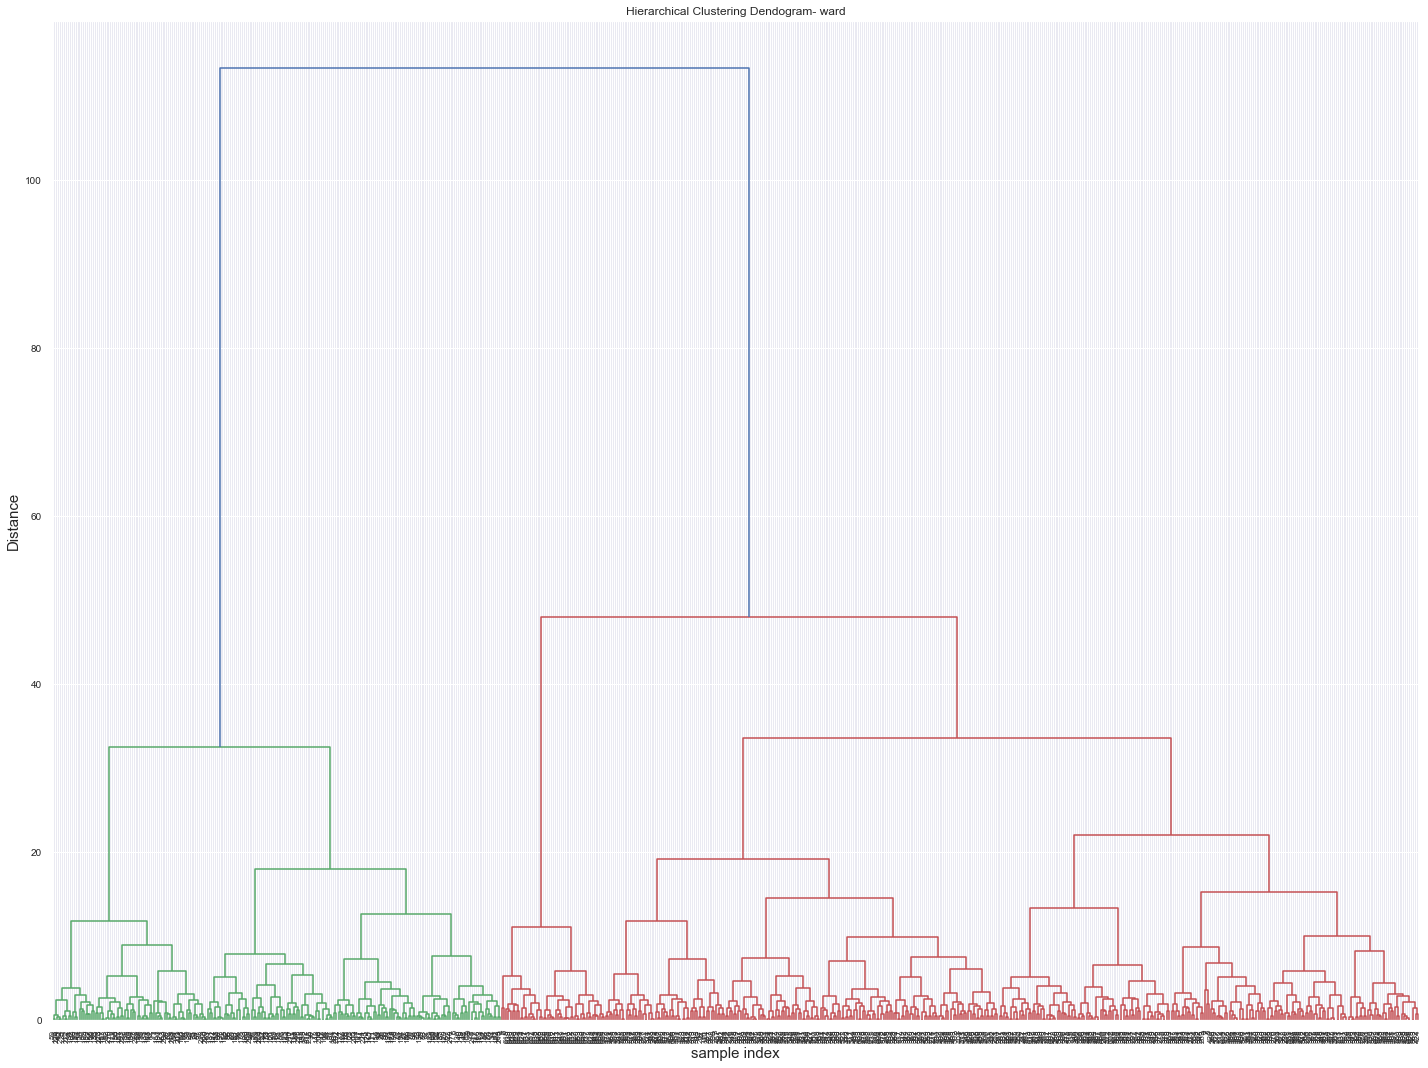

In [336]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendogram- ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
#dendrogram(Z_avg, leaf_rotation=90.,color_threshold = 40, show_leaf_counts= True, leaf_font_size=8. )
dendrogram(Z_ward, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
plt.tight_layout()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [21.25, 21.25, 76.25, 76.25],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [172.5, 172.5, 200.0, 200.0],
  [142.5, 142.5, 186.25, 186.25],
  [112.5, 112.5, 164.375, 164.375],
  [48.75, 48.75, 138.4375, 138.4375],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [281.25, 281.25, 3

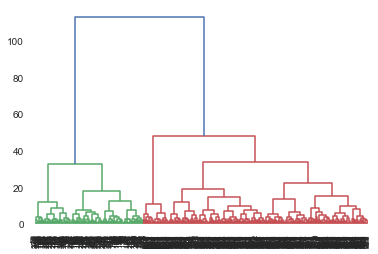

In [337]:
# Print the result Dict values of computed dendrogram
dgram_ward = dendrogram(Z_ward, leaf_rotation=90., show_leaf_counts= True, leaf_font_size=8. )
dgram_ward

In [338]:
# Print the list of labels 
labels_dgram_ward = dgram_ward['ivl']
labels_dgram_ward

['59',
 '126',
 '224',
 '45',
 '214',
 '38',
 '112',
 '222',
 '34',
 '102',
 '109',
 '89',
 '144',
 '154',
 '40',
 '199',
 '150',
 '127',
 '158',
 '36',
 '133',
 '88',
 '123',
 '226',
 '157',
 '183',
 '52',
 '219',
 '170',
 '173',
 '195',
 '80',
 '187',
 '193',
 '227',
 '39',
 '105',
 '146',
 '104',
 '27',
 '223',
 '68',
 '148',
 '98',
 '138',
 '101',
 '168',
 '12',
 '61',
 '1',
 '181',
 '190',
 '121',
 '163',
 '200',
 '26',
 '53',
 '119',
 '208',
 '54',
 '111',
 '209',
 '165',
 '50',
 '64',
 '139',
 '25',
 '91',
 '78',
 '24',
 '57',
 '32',
 '213',
 '160',
 '220',
 '63',
 '131',
 '192',
 '141',
 '188',
 '66',
 '37',
 '172',
 '155',
 '82',
 '85',
 '23',
 '65',
 '151',
 '62',
 '56',
 '175',
 '33',
 '100',
 '180',
 '205',
 '46',
 '55',
 '159',
 '176',
 '204',
 '122',
 '94',
 '179',
 '84',
 '161',
 '20',
 '189',
 '81',
 '118',
 '51',
 '106',
 '125',
 '184',
 '10',
 '217',
 '113',
 '128',
 '87',
 '225',
 '145',
 '185',
 '212',
 '211',
 '216',
 '30',
 '77',
 '143',
 '16',
 '206',
 '17',
 '16

In [339]:
colors_dgram_ward = dgram_ward['color_list']
colors_dgram_ward

['g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g'

In [340]:
# print unique colors
x_ward = np.array(colors_dgram_ward)
print('Cluster colors are :\033[1m\033[91m', np.unique(x_ward), '\033[0m')

Cluster colors are : ['b' 'g' 'r'] 


#### Color code indicates 3 suggested clusters formed when using 'ward' linkage method

#### Using Cophenetic Distance measure to truncate the clusters into managable numbers

In [341]:
max_d_ward = 33

In [342]:
from scipy.cluster.hierarchy import fcluster
clusters_ward_maxd = fcluster(Z_ward, max_d_ward, criterion='distance')
clusters_ward_maxd

array([4, 1, 3, 3, 2, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3,
       3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3,
       4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4,

#### We get 4 clusters using the maxd distance threshold criteria of 33

In [343]:
len(clusters_median_maxd)

660

#### Can also use number of clusters as criterion, with K = 4 clusters

In [344]:
k_ward = 4
clusters_ward_num_k = fcluster(Z_ward, k_ward, criterion='maxclust')
clusters_ward_num_k

array([4, 1, 3, 3, 2, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3,
       3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3,
       4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4,

In [345]:
len(clusters_ward_num_k)

660

In [346]:
CCdata_hc_ward1 = CCdata_hc_ward # copying DF to create one DF for analysing 
CCdata_hc_ward1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [347]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on maxd = 33 . Adding the 4 cluster labels to the CCdata_hc_ward1  DF

In [348]:
# CCdata_hc_ward1.drop(['Cluster_median'], axis=1, inplace=True)

In [349]:
CCdata_hc_ward1['Cluster_ward'] = clusters_ward_maxd.tolist()
CCdata_hc_ward1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_ward  
0               0.693147                 0             4  
1               2.397895                 9             1  
2               1.386294                 4             3  
3               0.693147                 4             3  
4               2.564949                 3             2  
..                   ...               ...           ...  
655             2.397895                 0             2  
656             2.639057                 2             2  
657             2.302585                 1             2  
658             2.772589                 0             2  
659             2.564949                 2             2  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method = ward and choosing maxd= 33 , giving 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249C0002EC8>,
      dtype=object)

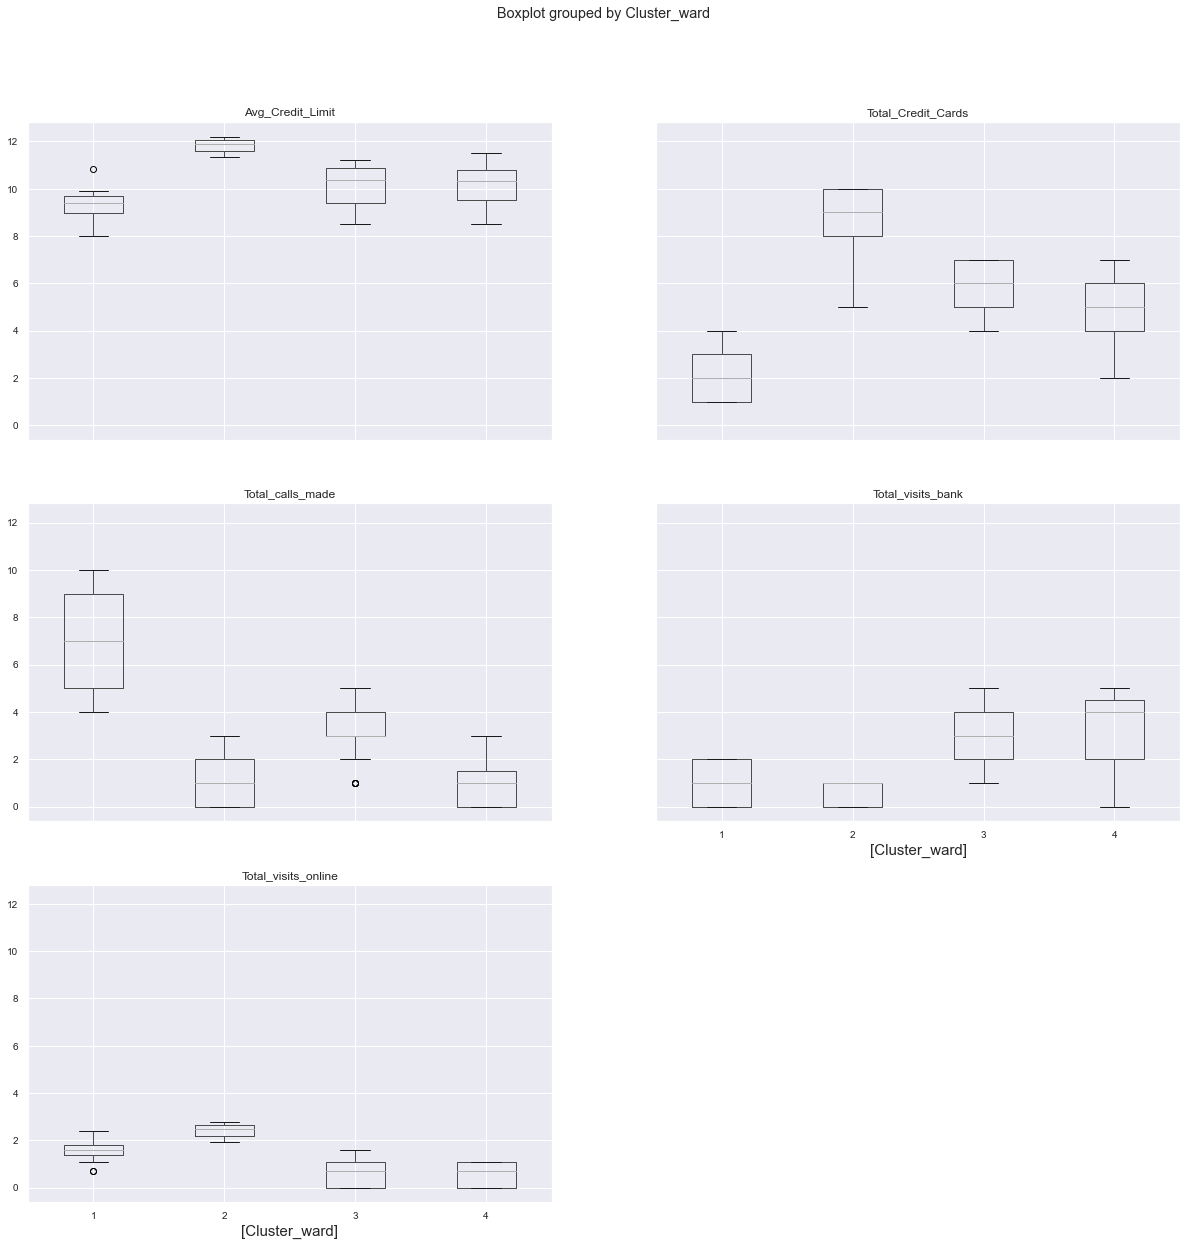

In [350]:
CCdata_hc_ward1.boxplot(by = 'Cluster_ward',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [351]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_ward1 = CCdata_hc_ward1.drop(['Cluster_ward'], axis=1)
CCdata_sil_hc_ward1

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [352]:
silhouette_hc_ward1 = silhouette_score(CCdata_sil_hc_ward1 , clusters_ward_maxd, metric = 'euclidean')
silhouette_hc_ward1

0.33927617555915734

#### The Silhouette score with Heirarchical clustering , using method as 'ward' , with 4 clusters selected using the maxd=33 , is 0.339276176 . This is also a  low score , indicating poor Clustering 

In [353]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 4
Method = 'Ward'
sil_score = silhouette_hc_ward1

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157
12  Heirarchical Clustering               4  Centroid         0.393334
13  Heirarchical Clustering               3  Centroid         0.460923
14  Heirarchical Clustering               4    Median         0.396751
15  Heirarchical Clustering               3    Median         0.362535
16  Heirarchical Clustering               4      Ward         0.339276

### Test with 3 clusters , using 'ward' method

#### Use number of clusters as criterion, with K = 3 clusters

In [354]:
k_ward1 = 3
clusters_ward_num_k1 = fcluster(Z_ward, k_ward1, criterion='maxclust')
clusters_ward_num_k1

array([3, 1, 3, 3, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [355]:
len(clusters_ward_num_k1)

660

In [356]:
CCdata_hc_ward2 = CCdata_hc_ward1 # copying DF to create one DF for analysing 
CCdata_hc_ward2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_ward  
0               0.693147                 0             4  
1               2.397895                 9             1  
2               1.386294                 4             3  
3               0.693147                 4             3  
4               2.564949                 3             2  
..                   ...               ...           ...  
655             2.397895                 0             2  
656             2.639057                 2             2  
657             2.302585                 1             2  
658             2.772589                 0             2  
659             2.564949                 2             2  

[660 rows x 6 columns]

In [357]:
# CCdata1_avg.drop(['labels_avg'], axis=1, inplace=True)
# CCdata1_avg

### Choosing to use the clustering based on maxd = 33 . Adding the 4 cluster labels to the CCdata_hc_ward1  DF

In [358]:
# CCdata_hc_ward1.drop(['Cluster_median'], axis=1, inplace=True)

In [359]:
CCdata_hc_ward2['Cluster_ward'] = clusters_ward_num_k1.tolist()
CCdata_hc_ward2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster_ward  
0               0.693147                 0             3  
1               2.397895                 9             1  
2               1.386294                 4             3  
3               0.693147                 4             3  
4               2.564949                 3             2  
..                   ...               ...           ...  
655             2.397895                 0             2  
656             2.639057                 2             2  
657             2.302585                 1             2  
658             2.772589                 0             2  
659             2.564949                 2             2  

[660 rows x 6 columns]

#### Box plot of clusters for Hierarchical clustering with method = ward and choosing maxd= 33 , giving 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249BF0FBF48>,
      dtype=object)

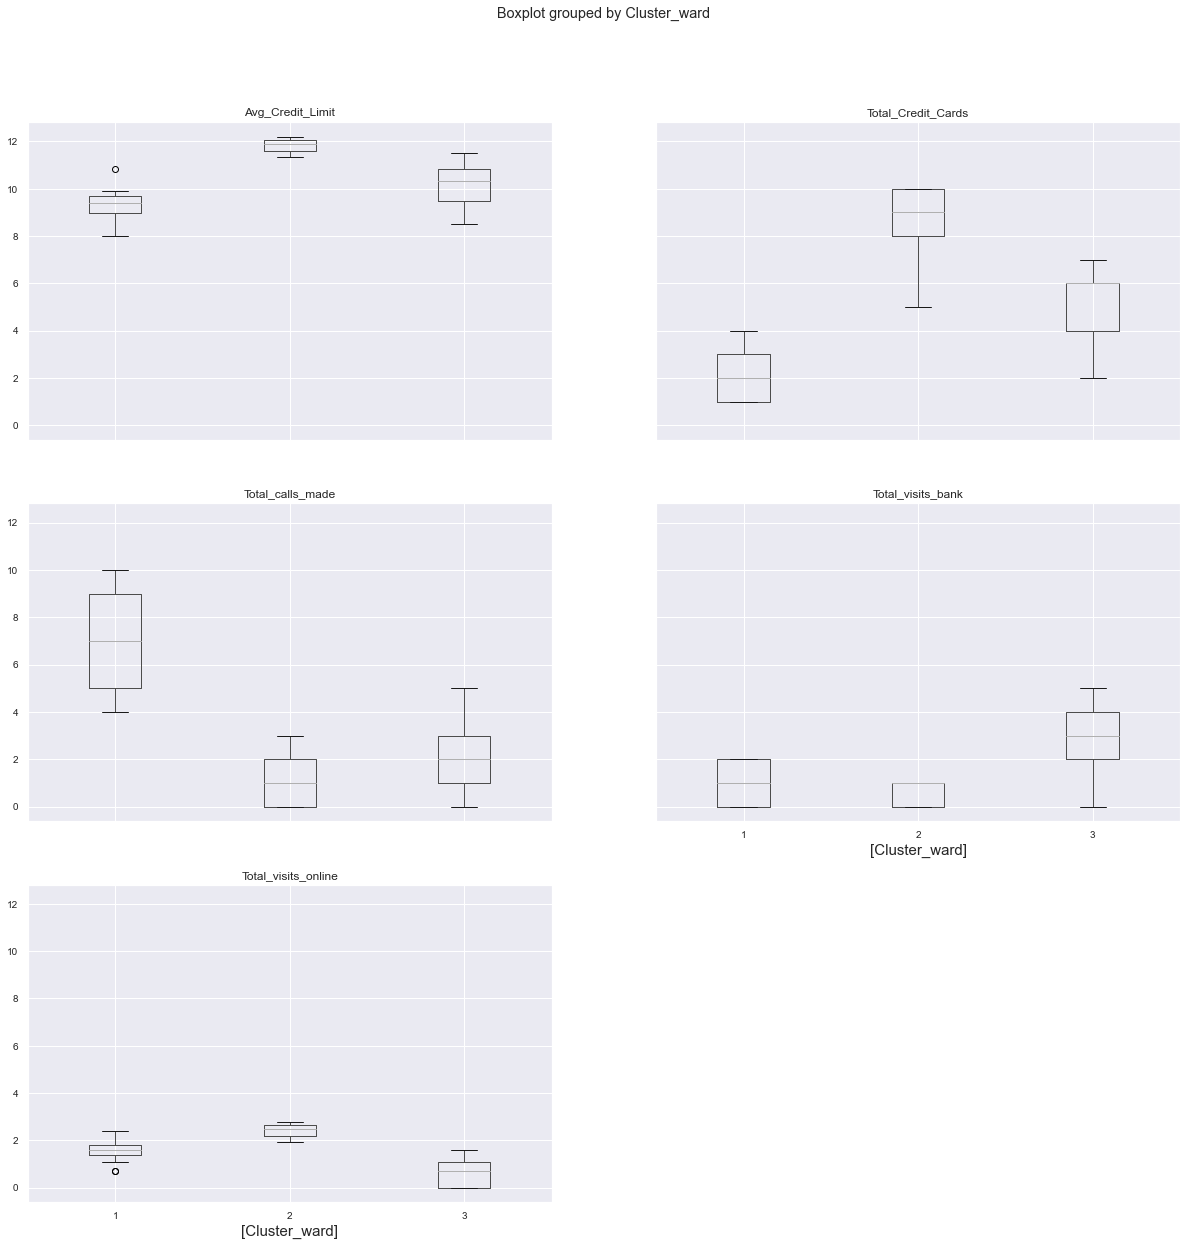

In [360]:
CCdata_hc_ward2.boxplot(by = 'Cluster_ward',  layout=(3,2),  figsize=(20, 20))

### Silhouette score 

In [361]:
# Drop the 'CLuster' predicted labels from the CCdata 
CCdata_sil_hc_ward2 = CCdata_hc_ward2.drop(['Cluster_ward'], axis=1)
CCdata_sil_hc_ward2

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  
0               0.693147                 0  
1               2.397895                 9  
2               1.386294                 4  
3               0.693147                 4  
4               2.564949                 3  
..                   ...               ...  
655             2.397895                 0  
656             2.639057                 2  
657             2.302585                 1  
658             2.772589                 0  
659             2.564949                 2  

[660 rows x 5 columns]

In [362]:
silhouette_hc_ward2 = silhouette_score(CCdata_sil_hc_ward2 , clusters_ward_num_k1, metric = 'euclidean')
silhouette_hc_ward2

0.46364571766283885

#### The Silhouette score with Heirarchical clustering , using method as 'ward' , with 3 clusters selected using the k=3 , is 0.46364572 .  

In [363]:
row_index = row_index + 1
Algo = 'Heirarchical Clustering'
clusters = 3
Method = 'Ward'
sil_score = silhouette_hc_ward2

scores_data = [ Algo,clusters,Method,sil_score]
# print(scores_data)
# print(row_index)
scores.loc[row_index] = scores_data
# scores.drop(0, inplace= True)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157
12  Heirarchical Clustering               4  Centroid         0.393334
13  Heirarchical Clustering               3  Centroid         0.460923
14  Heirarchical Clustering               4    Median         0.396751
15  Heirarchical Clustering               3    Median         0.362535
16  Heirarchical Clustering               4      Ward         0.339276
17  Heirarchical Clustering               3      Ward         0.463646

##  5.0 Average silhouette scores have been calculated and captured in the scores dataframe , reproduced below

In [364]:
scores

Algorithm  No of Clusters    Method  Silhoutte Score
1                  K Means                5       N/A         0.315121
2                  K Means                4       N/A         0.382751
3                  K Means                3       N/A         0.466021
4   Heirarchical Clustering               4   Average         0.397246
5   Heirarchical Clustering               3   Average         0.465171
6   Heirarchical Clustering               3    Single         0.029622
7   Heirarchical Clustering               4    Single         0.071227
8   Heirarchical Clustering               3  Complete         0.455229
9   Heirarchical Clustering               4  Complete         0.378996
10  Heirarchical Clustering               4  Weighted         0.354661
11  Heirarchical Clustering               3  Weighted         0.324157
12  Heirarchical Clustering               4  Centroid         0.393334
13  Heirarchical Clustering               3  Centroid         0.460923
14  Heirarchical Clustering               4    Median         0.396751
15  Heirarchical Clustering               3    Median         0.362535
16  Heirarchical Clustering               4      Ward         0.339276
17  Heirarchical Clustering               3      Ward         0.463646

### 6.0 Comparing K-means Clustering with Hierarchical clustering based on average Silhouette scores. Sort the scores DF by max silouette scores

In [365]:
scores = scores.sort_values(by = ['Silhoutte Score'], ascending= False)
scores

Algorithm  No of Clusters    Method  Silhoutte Score
3                  K Means                3       N/A         0.466021
5   Heirarchical Clustering               3   Average         0.465171
17  Heirarchical Clustering               3      Ward         0.463646
13  Heirarchical Clustering               3  Centroid         0.460923
8   Heirarchical Clustering               3  Complete         0.455229
4   Heirarchical Clustering               4   Average         0.397246
14  Heirarchical Clustering               4    Median         0.396751
12  Heirarchical Clustering               4  Centroid         0.393334
2                  K Means                4       N/A         0.382751
9   Heirarchical Clustering               4  Complete         0.378996
15  Heirarchical Clustering               3    Median         0.362535
10  Heirarchical Clustering               4  Weighted         0.354661
16  Heirarchical Clustering               4      Ward         0.339276
11  Heirarchical Clustering               3  Weighted         0.324157
1                  K Means                5       N/A         0.315121
7   Heirarchical Clustering               4    Single         0.071227
6   Heirarchical Clustering               3    Single         0.029622

### 6.1 Comparison of K-Means and Hierarchical clustering results :
    1> It is seen that best Clustering result is using K-Means , based on average Silhouette score. 
    2> However , the score difference is only around 0.1823% . 
    3> The best scores for both K-Means and Hierarchical clustering is obtained with 3 clusters. 
    4> Among Hierarchical clustering , the best score is obtained with 'Average' method.
    5> The top three results using Hierarchical clustering differ by only slightly from each other , based on the 
        average Silhouette scores    

### 6.2 Comparison of K-Means and Hierarchical clustering results by comparing box plots.

#### 6.2.1 Box-plot for Heirarchical clusters with 3 clusters and 'Average' method , which is the best score for Hierarchical clustering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249B9E99548>,
      dtype=object)

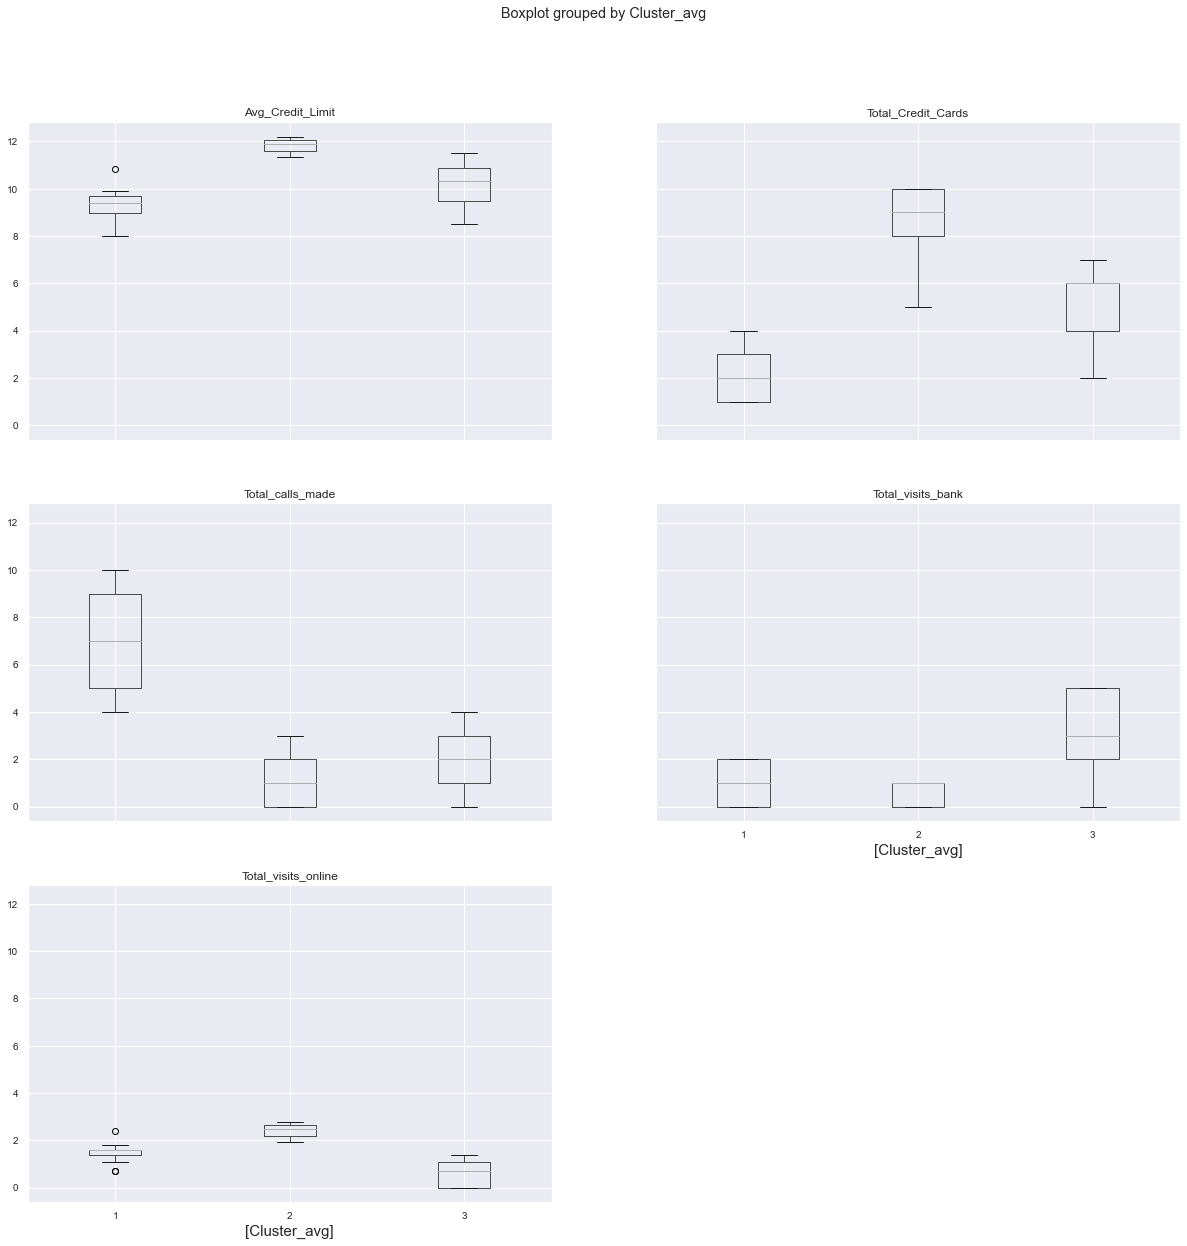

In [369]:
CCdata_hc_avg2.boxplot(by = 'Cluster_avg',  layout=(3,2),  figsize=(20, 20))

#### 6.2.2 Box-plot for K Means clusters with 3 clusters , which is the best score for K Means clustering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249C2826B08>,
      dtype=object)

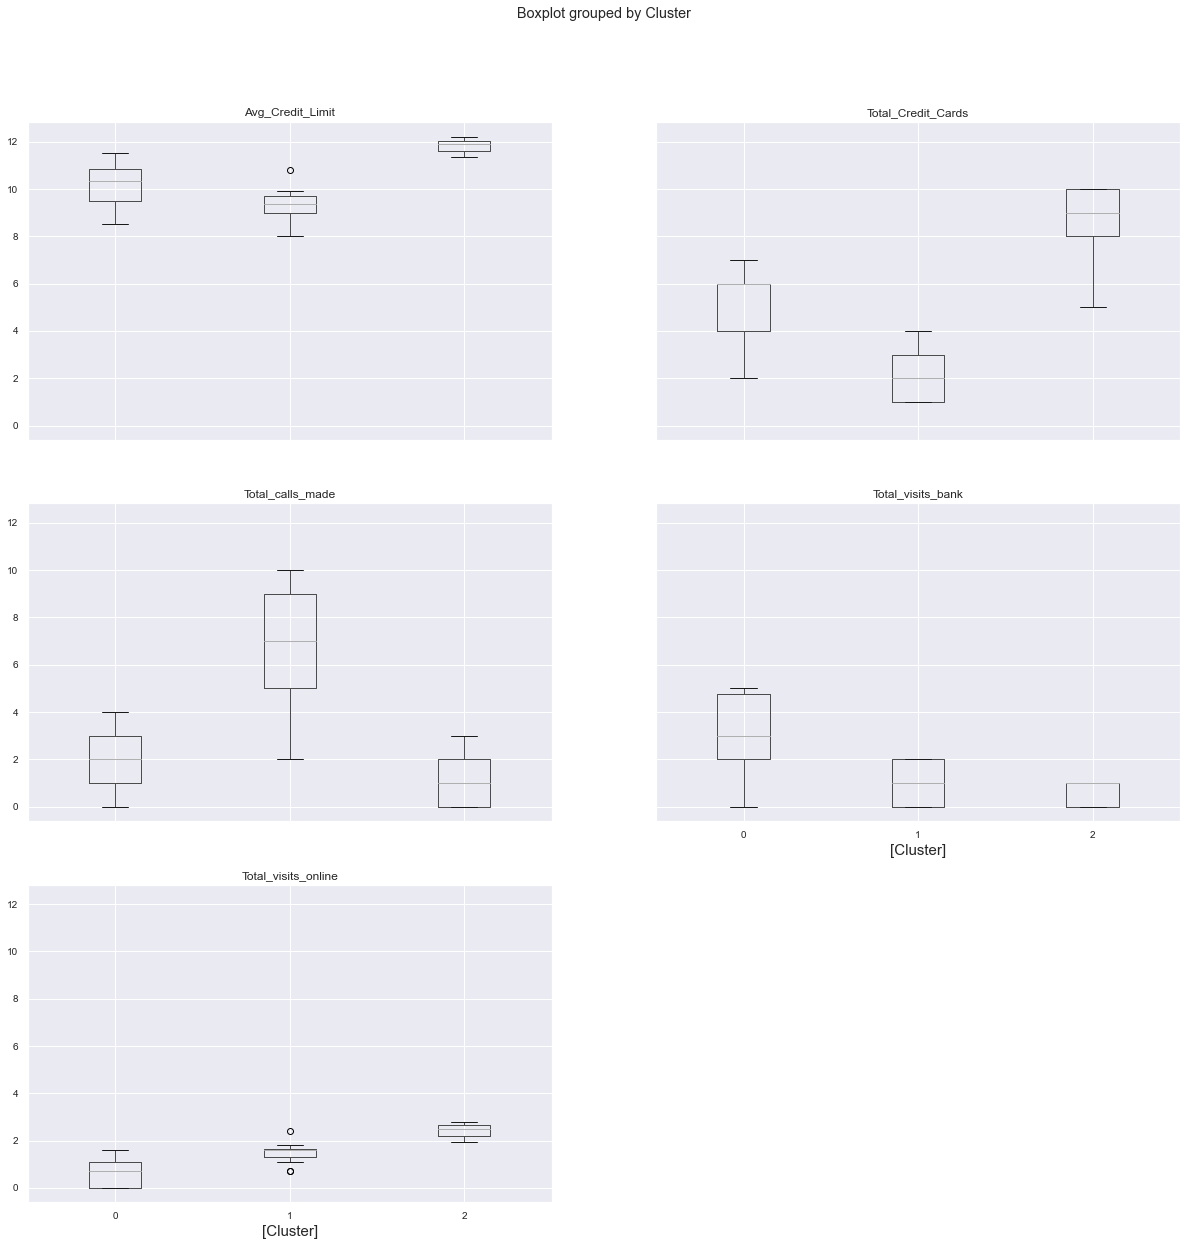

In [380]:
CCdata5.boxplot(by = 'Cluster',  layout=(3,2),  figsize=(20, 20))

### 6.2.4 Comparing the above two  box plots - Heirarchical clustering vs K Means clustering , both with 3 clusters.
    1> Third cluster in K Means  as well as second cluster Hierarchical clustering are comparable
        a) Third cluster in K Means  as well as second cluster Hierarchical clustering, both have max Avg_Credit_Limit 
            and Total_Credit_cards. 
        b) Also , Total_calls_made and Total_visits_bank are lowest . 
        c) Additionally, in both cases ,  Total_visits_online are highest.
        
    2> First cluster in K Means  as well as Third cluster Hierarchical clustering are comparable
        a) First cluster in K Means has second highest data set for Avg_Credit_Limit and second highest 
            Total_Credit_Cards. Same is observerd with the third cluster in hierarchical clustering box plot. 
        b) First cluster in K Means has lowest data set for Total_visits_online , which is similar to the third 
            cluster in hierarchical clustering. 
        c) First cluster in K Means has second highest data set for Total_calls_made , which is similar to the 
            third cluster in hierarchical clustering.
        d) Total_visits_bank also has similar dispersion /median etc , for both First cluster in K Means and 
            Third cluster in hierarchical clustering. However the top whisker is missing in case of the Third 
            cluster in hierarchical clustering , indicating that no data was included at more that 75% , as compared 
            to data included in First cluster in K Means. 
            
    3> Second cluster in K Means  as well as First cluster Hierarchical clustering are comparable
        a)  Second cluster in K Means ,as well as First cluster Hierarchical clustering, has similar 
            range / dispersion of  data set for Avg_Credit_Limit and Total_Credit_Cards. Outlier datas is also similar.
        b) Second cluster in K Means has highest range/dispersion data set for Total_calls_made  , which is similar 
            to the First cluster in hierarchical clustering. 
        c) Second cluster in K Means has highest range/dispersion data set for Total_visits_online , which is similar 
            to the First cluster in hierarchical clustering. Both show similar outliers on low and high side.
        d) Total_visits_bank also has similar dispersion /median etc , for both Second cluster in K Means and 
            First cluster in hierarchical clustering. 
            
 ### It is seen that for k=3 with K Means clustering , and with the three clusters selected in Hierarchical clustering with 'Average' method , we get very similar clustering results for the custimer data. Also noted that the average Silhouette scores are very close in both these cases. K Means 	-	0.466021 and Heirarchical Clustering -	0.465171


## 7 Analysis of clusters. Selected the clusters with best silhouette score , obtained using K Means algortithm , with k=3 clusters

### Reproducing code from earlier , for K means with 3 clusters 

In [132]:
CCdata_Cluster3 = CCdata5.groupby(['Cluster'])
pd.set_option('display.max_columns', None)
CCdata_Cluster3.describe()

Avg_Credit_Limit                                             \
                   count       mean       std        min        25%   
Cluster                                                               
0                  390.0  10.145889  0.800426   8.517193   9.472705   
1                  220.0   9.314834  0.430155   8.006368   8.987197   
2                   50.0  11.825513  0.257247  11.338572  11.596736   

                                         Total_Credit_Cards            \
               50%        75%        max              count      mean   
Cluster                                                                 
0        10.341742  10.854144  11.512925              390.0  5.497436   
1         9.349156   9.680344  10.819778              220.0  2.386364   
2        11.887925  12.043501  12.206073               50.0  8.740000   

                                             Total_visits_bank            \
              std  min  25%  50%   75%   max             count      mean   
Cluster                                                                    
0        1.148932  2.0  4.0  6.0   6.0   7.0             390.0  3.469231   
1        1.094109  1.0  1.0  2.0   3.0   4.0             220.0  0.922727   
2        1.274715  5.0  8.0  9.0  10.0  10.0              50.0  0.600000   

                                            Total_visits_online            \
              std  min  25%  50%   75%  max               count      mean   
Cluster                                                                     
0        1.150758  0.0  2.0  3.0  4.75  5.0               390.0  0.584513   
1        0.798647  0.0  0.0  1.0  2.00  2.0               220.0  1.483781   
2        0.494872  0.0  0.0  1.0  1.00  1.0                50.0  2.446572   

                                                                     \
              std       min       25%       50%       75%       max   
Cluster                                                               
0        0.477628  0.000000  0.000000  0.693147  1.098612  1.609438   
1        0.274847  0.693147  1.314374  1.609438  1.655018  2.397895   
2        0.250302  1.945910  2.197225  2.484907  2.639057  2.772589   

        Total_calls_made                                                
                   count      mean       std  min  25%  50%  75%   max  
Cluster                                                                 
0                  390.0  2.012821  1.434908  0.0  1.0  2.0  3.0   4.0  
1                  220.0  6.936364  1.938682  2.0  5.0  7.0  9.0  10.0  
2                   50.0  1.080000  0.876915  0.0  0.0  1.0  2.0   3.0

### Box plots

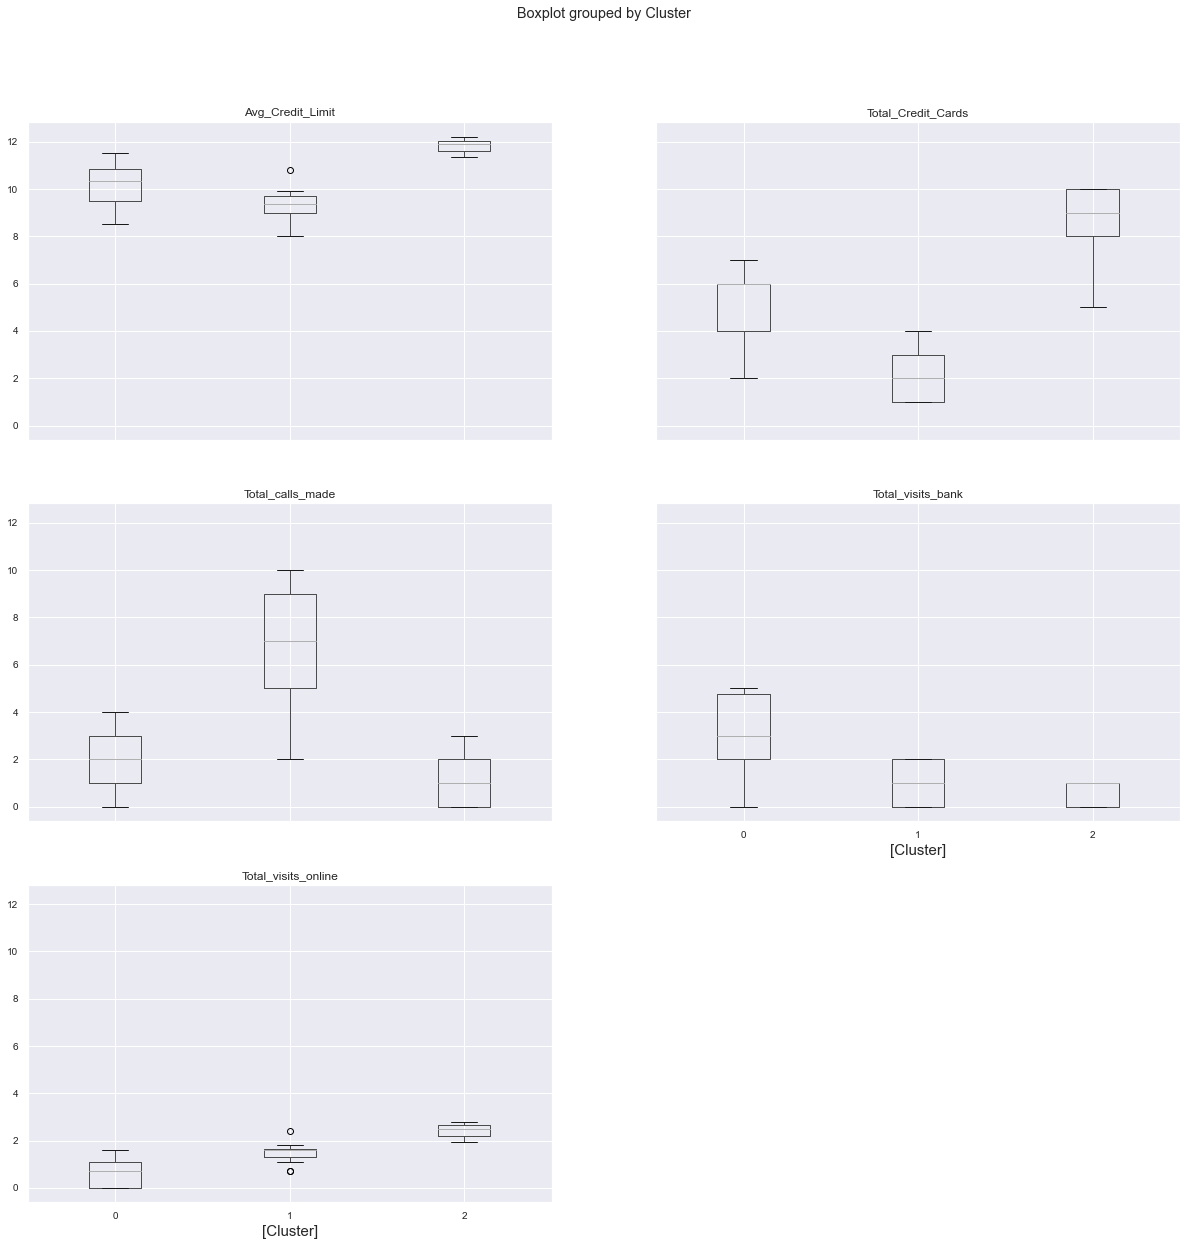

In [133]:
CCdata5.boxplot(by = 'Cluster',  layout=(3,2),  figsize=(20, 20))
#plt.savefig('kmeans_3_Clusters_BoxP')

### It can be seen from the box plots that :
    1) Cluster 0 ( first cluster) has lowest 'Total_visits-online' , highest 'Total_visits_bank' , second 
        highest 'Avg_Credit_Limit' , second highest 'Total_Credit_cards' and second lowest range of 'Total_calls_made'.
    2) Cluster 1 ( second cluster) has lowest 'Avg_Credit_Limit' range and 'Total_Credit_cards'. The 
        'Total_visits-online' is second higests and in a narrower range than other Clusters 0 & 2. This cluster has 
        the second lowest range of 'Total_visits_bank'. The  'Total_calls_made' are much higher that other clusters and 
        has the max range.
    3) Cluster 2 (third cluster) has highest 'Avg_Credit_Limit' range and 'Total_Credit_cards'. 'Total_calls_made' 
        and 'Total_vistis_bank' are the lowest in this cluster. However , Cluster 2 has the highest 'Total_visits_online' .
        
 #### Key questions answered :
    
    a)  How many different segments of customers are there? - Based on the best Silhouette scores , we find that we 
        can cluster the customers into three segments.
        
    b) How are these segments different from each other? - Explained in 1,2 and 3 above.
    
    c) What are your recommendations to the bank on how to better market to and service these customers?
    
        i) For Cluster 0 customers :
            1) This cluster customers are making the max visits to the bank and lowest visits online.One reason could 
                be that they lack online banking infrastructure like reliable connection and computers. Company can 
                find if this is the case. In case they lack proper infrastructure or are not comfortable using online
                banking, bank must pay more attention to in-person interactions for such customers so all queries are 
                answered. If bank finds that these customers do have the infrastructure , thne bank must find out reason 
                for these customers not using on-line banking. It may be that the on-line experience fir this group 
                of customers may not be satisfactory or the online banking site design is complicated and not easy to
                navigate. Bank can then make improvements to its onlne banking site and overall on-line banking 
                experience by adopting new technologies like chat bots , context based help etc. 
            2) Since the customers visist bank more often , the bankers interacting with such customers must be 
                instructed to get feed back from customers on ways to improve the customer experince. Bankers must 
                also be instructed to check if they can upsell other products , while interacting with the customers.
            
       ii) For Cluster 1 customers :
           1) Since the credit limit is lowest in this cluster , bank can put in efforts to see if the qualified 
               customers in this cluster can be persuaded to apply for more credit , which can then lead to more 
               transcations and income for the bank.
           2) Total calls made by this cluster are the highest. Hence the help desk team attending the calls must be 
               trained to answer all calls promptly and address all queries without cutomer neeing to call again. 
               Help desk to start monitoring how long each call lasts and how often a customer calls regarding 
               similar query.Use this to improve training for the help desk bankers , as well as get feedback from 
               customers to try and improve the banking process. Example - calls may be made to complain about 
               the problm with online web site, or call may be made to speak to a banker. Depending on such data 
               gathered , improve training and processes.
           3) Since customers in this cluster spend max time talking remotly with help desk team on calls , 
               instruct persons attending these calls to find out more from customer and try to upsell bank's 
               other products. Also instruct them to check with customers and try increase customers credit limits.
           
      iii) For Cluster 2 customers :
          1) Cluster 2 customers tend to have max credit cards and max credit limit. Hence this group is more likely to
              accept chances for additional credit cards or increse in credit limits. Bank to target these customers for
              upselling more such products, provided bank does the due diligence on these customers.
          2) Total calls to the bank and Total visits to the bank for this cluster are the mininum. However , Total 
              online visits are maximum. This indicates that this cluster customers are more comfortable with 
              online banking. Bank to try to get feedback from these customers and keep improving the onlien experience.
          3) The banking websites to be so set up that when cluster 2 customer is browsing , bank should be able to 
              offer other products and upsell such products. 
          4) Bank to use tracking technologies so that online behaviour for such customers can be better tracked and 
              bank can the fine tune the online expeience to better suite such customers. Example - if bank finds that 
              a particular feature is being used very often but it takes many menu clicks to get to that feature , the 
              site can be redesigned to get to that option in a fewer clicks.
    